In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_theme()
%matplotlib inline

In [2]:
df = pd.read_excel('C:/Users/ADMIN/Downloads/Bank_Marketing_Data_(2).xlsx')
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

## EDA - General

In [3]:
df.index

RangeIndex(start=0, stop=4521, step=1)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [11]:
df.shape

(4521, 17)

In [12]:
features_with_na = [i for i in df.columns if df[i].isnull().sum()>=1]
features_with_na

[]

In [13]:
df['y'].nunique()

2

In [14]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df["y"].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

## EDA - Univariate

In [16]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [17]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

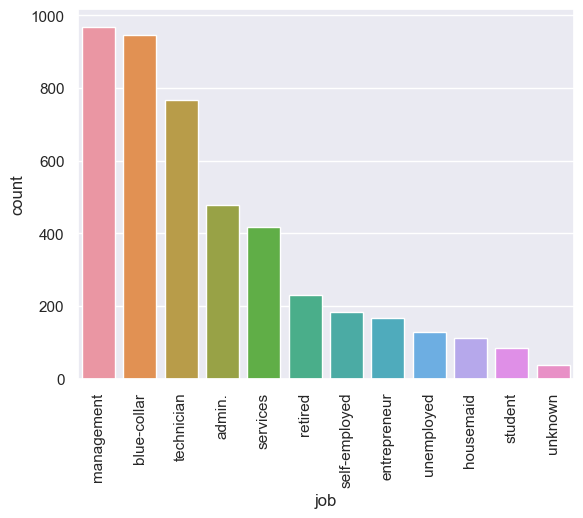

In [18]:
sns.countplot(x='job', data=df, order = df['job'].value_counts().index)
plt.xticks(rotation=90)

In [19]:
features_categorical = [i for i in df.columns if df[i].dtype=="object"]
features_categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

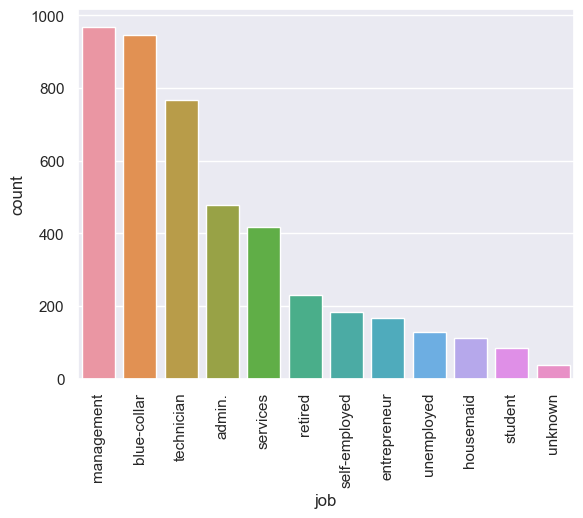

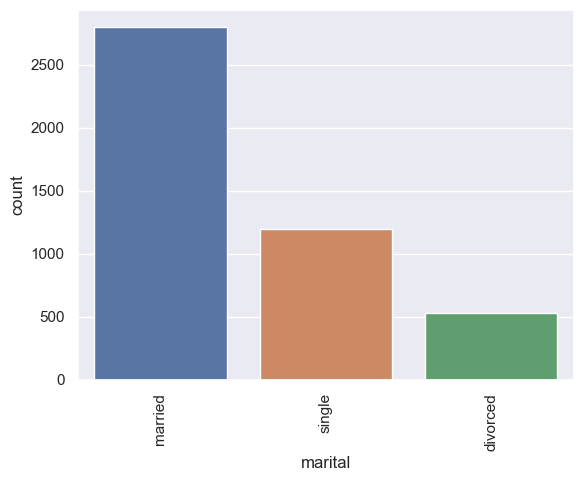

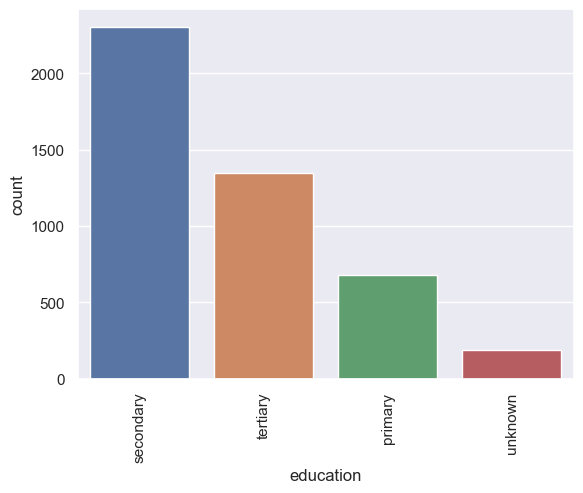

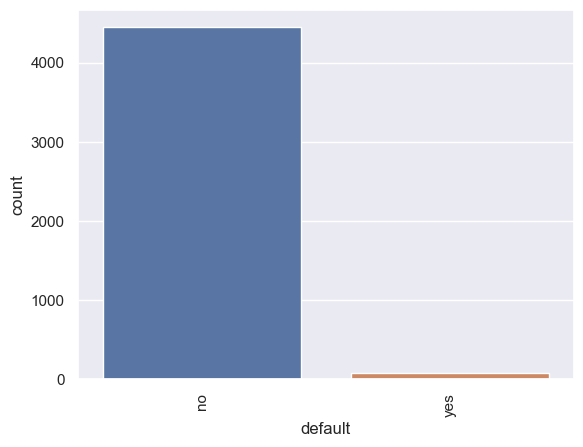

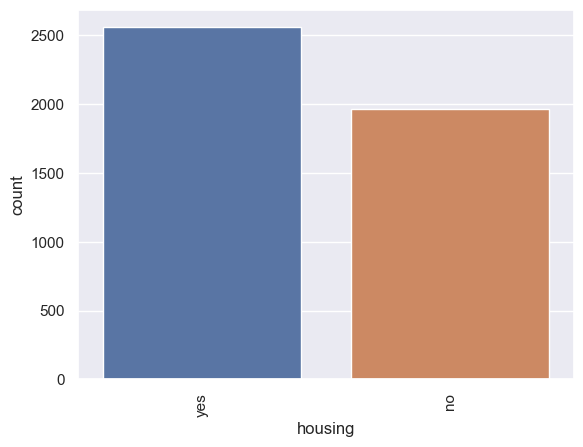

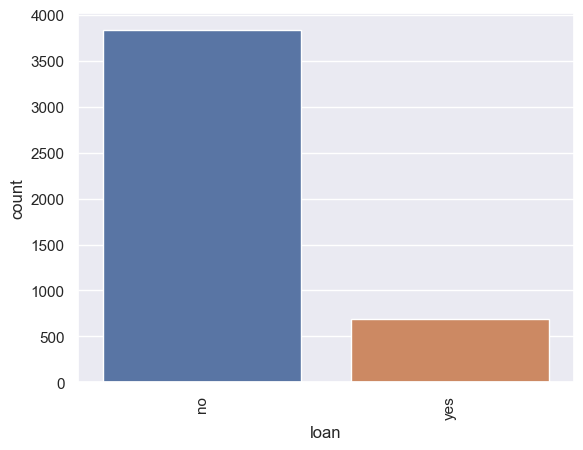

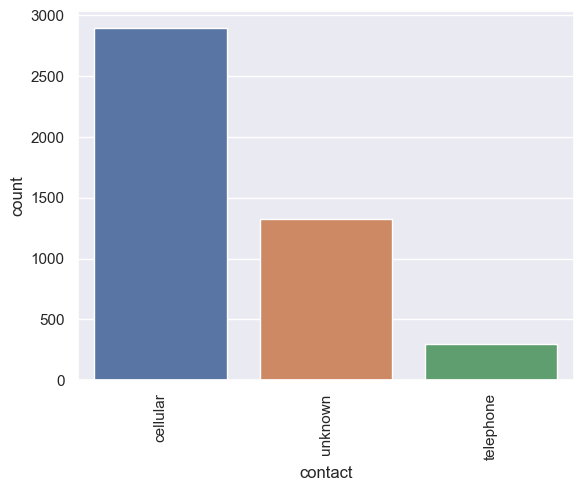

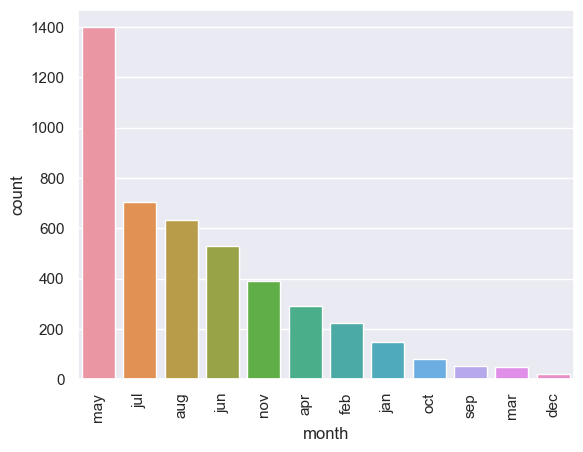

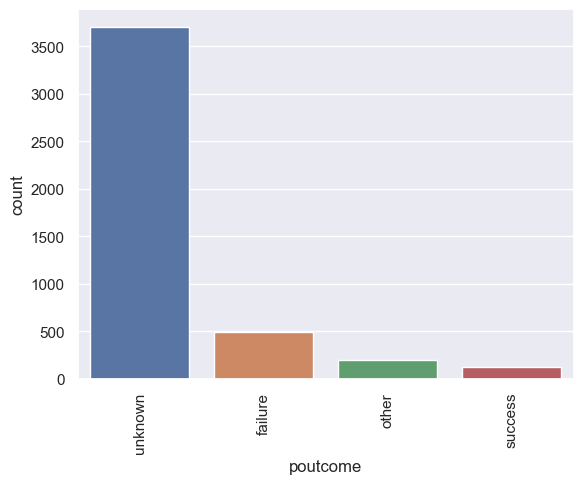

In [20]:
for i in features_categorical[0:-1]:
    sns.countplot(x=i, data=df, order = df[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

In [21]:
features_numerical = [i for i in df.columns if df[i].dtype=="int64"]
features_numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

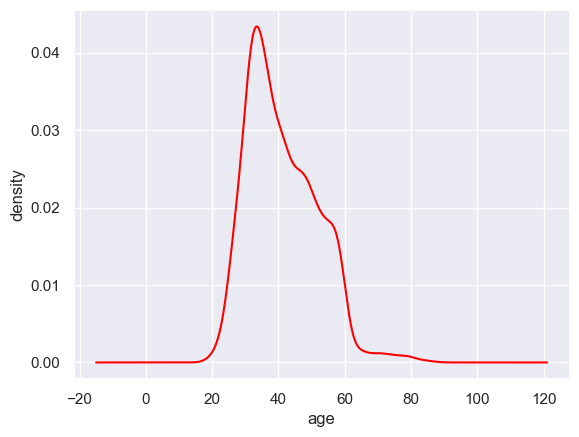

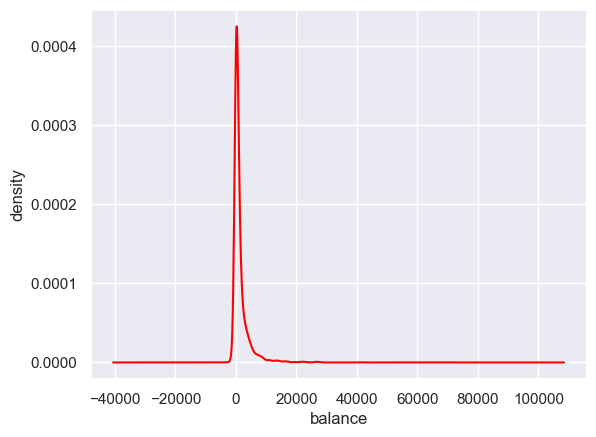

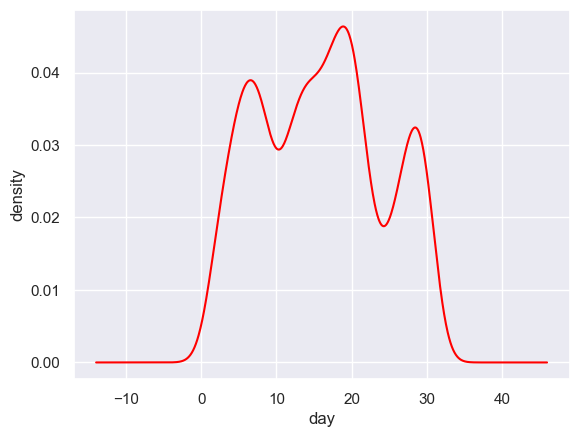

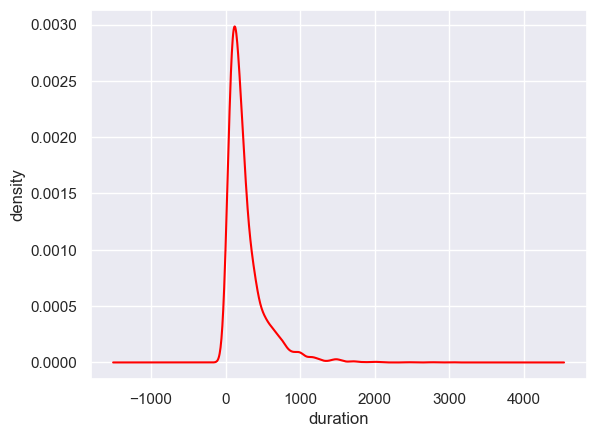

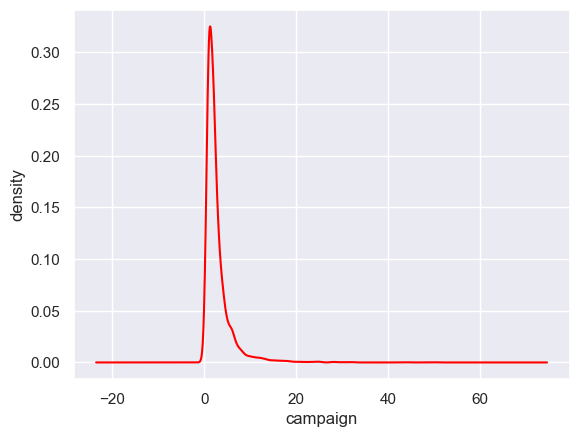

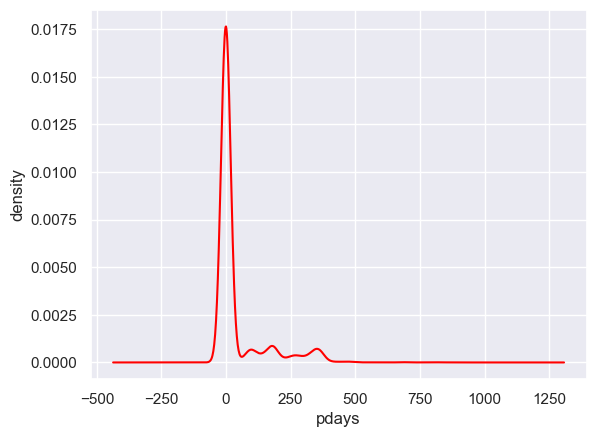

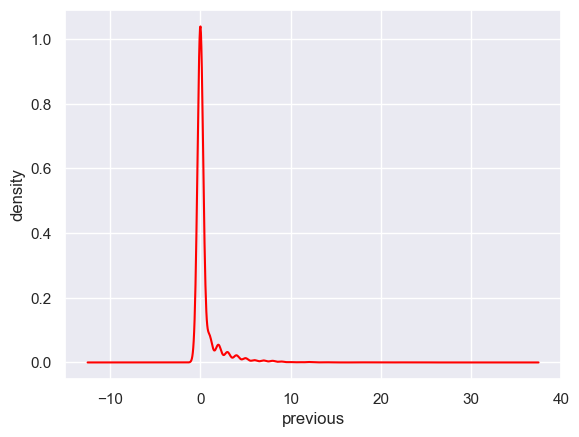

In [22]:
for i in features_numerical:
    df[i].plot.kde(color="red")
    plt.xlabel(i)
    plt.ylabel("density")
    plt.show()

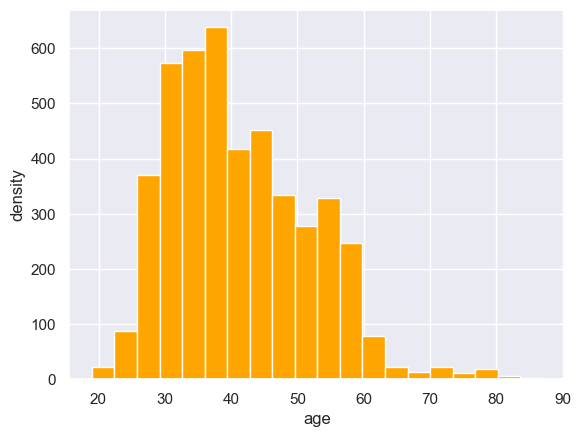

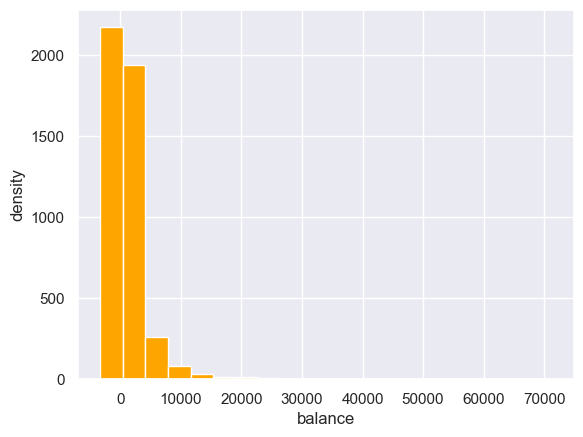

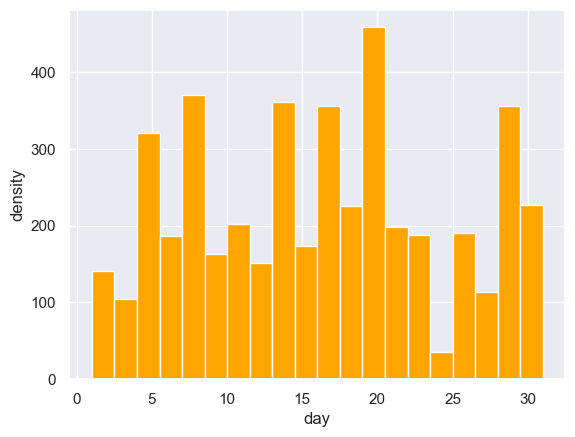

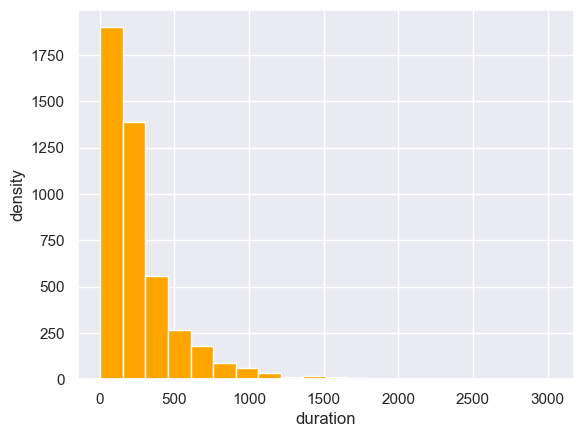

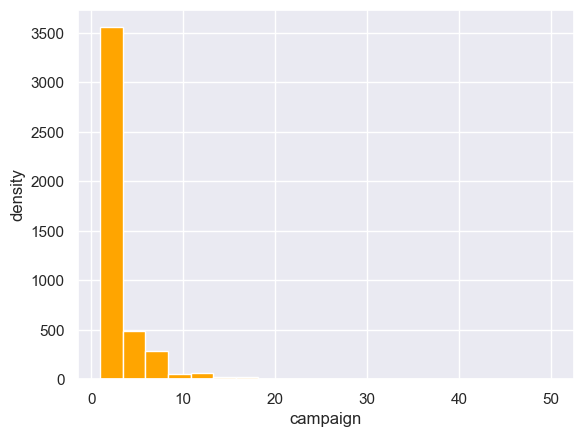

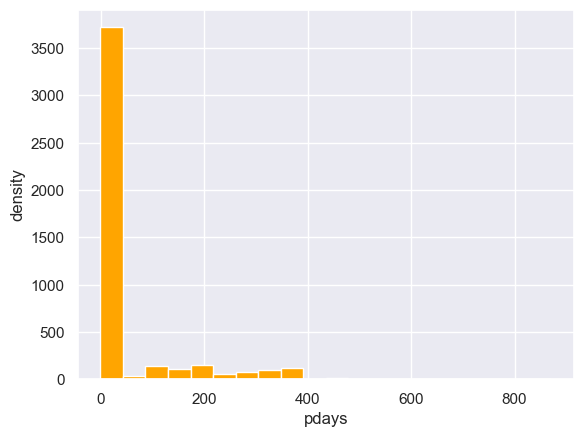

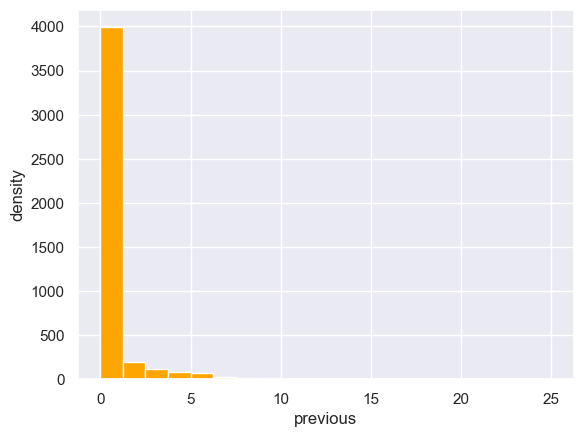

In [23]:
for i in features_numerical:
    df[i].plot.hist(bins=20, color="orange")
    plt.xlabel(i)
    plt.ylabel("density")
    plt.show()

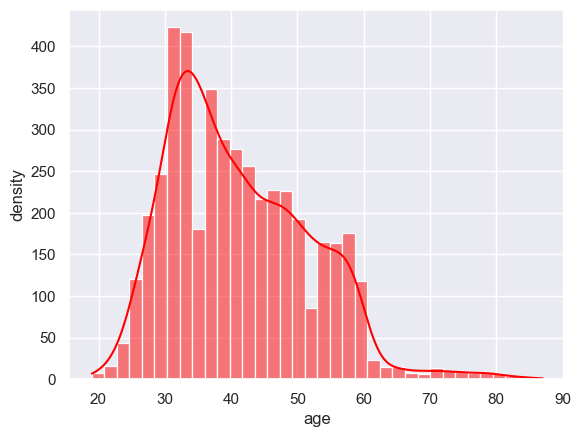

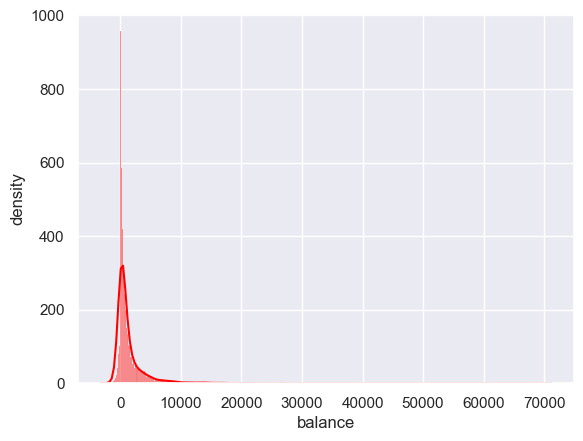

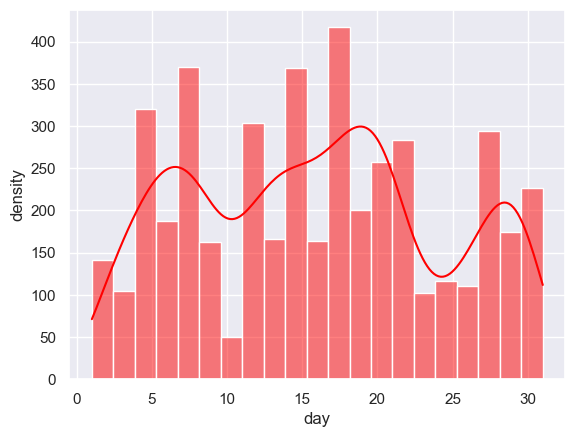

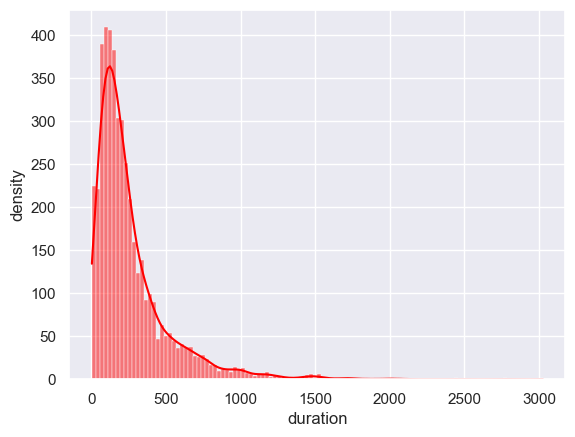

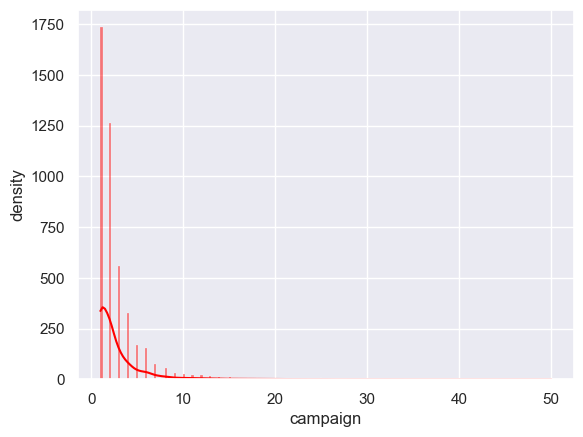

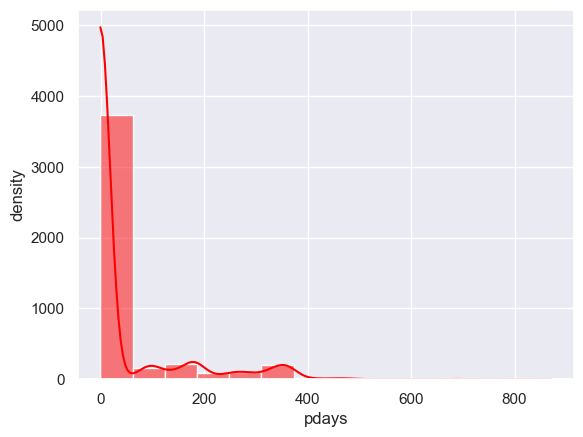

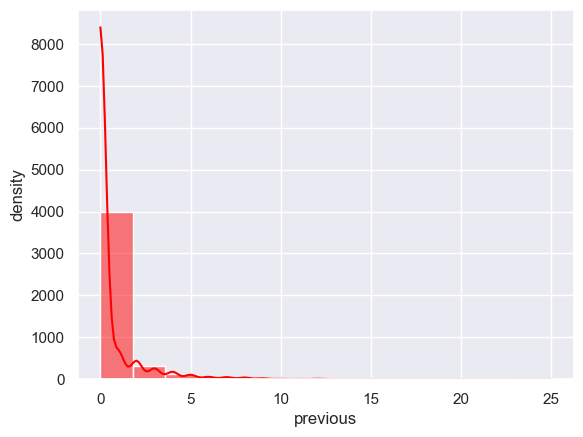

In [24]:
for i in features_numerical:
    sns.histplot(df[i], kde=True, color="red")
    plt.xlabel(i)
    plt.ylabel("density")
    plt.show()

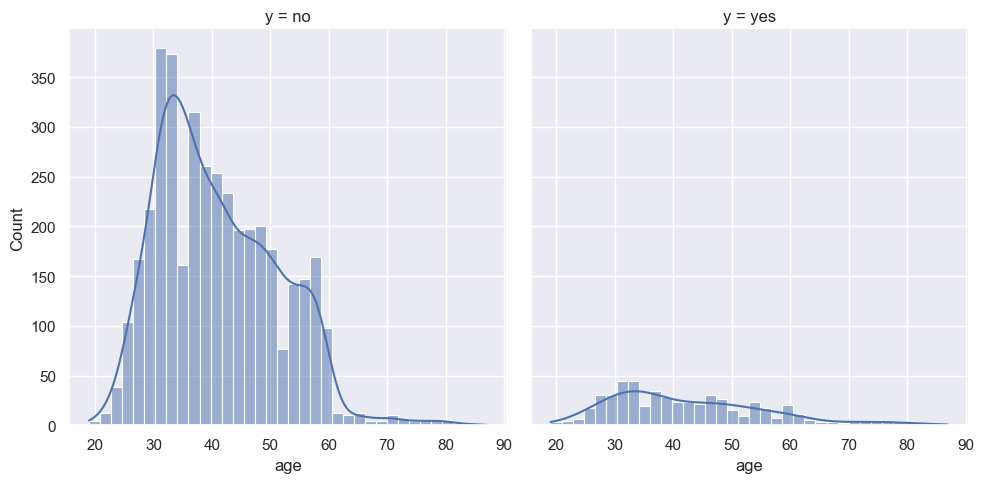

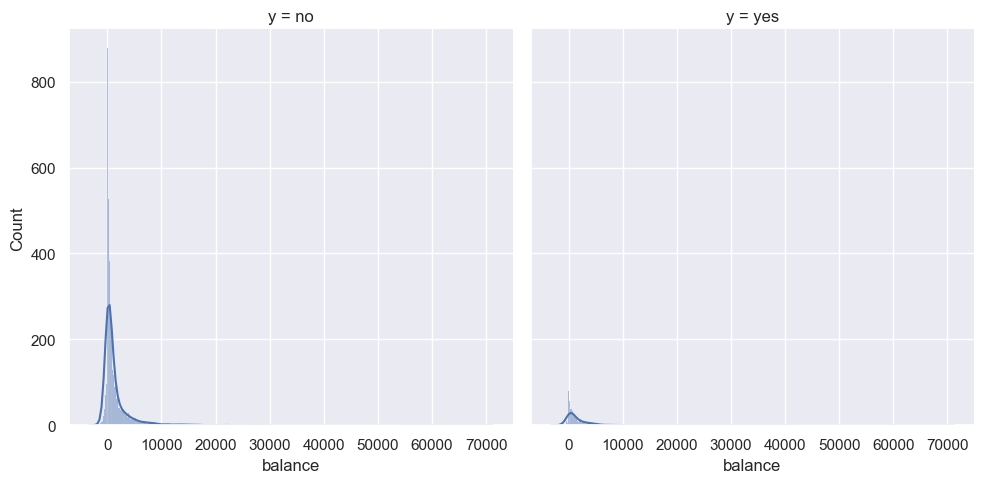

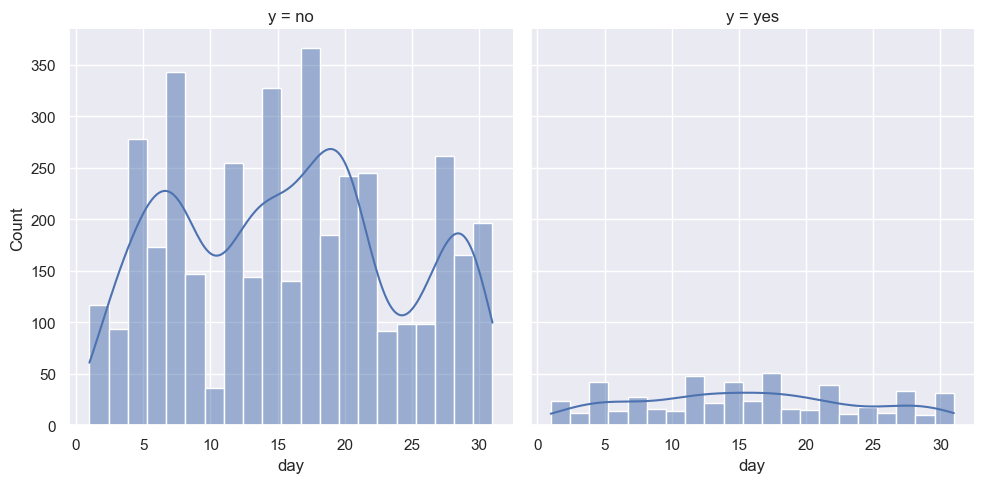

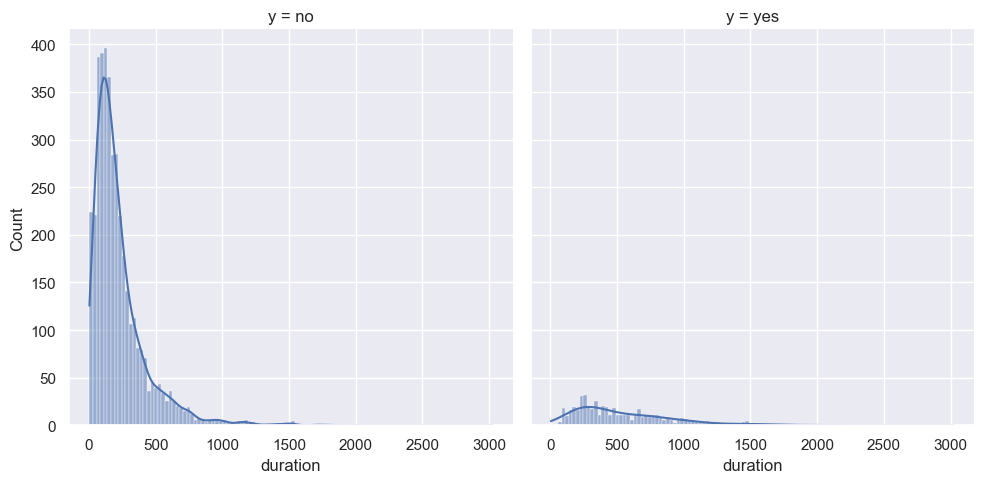

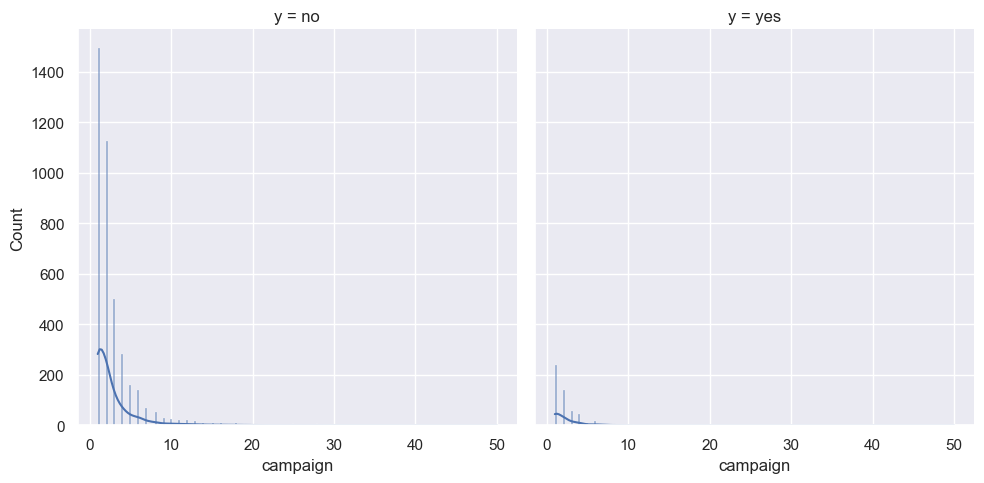

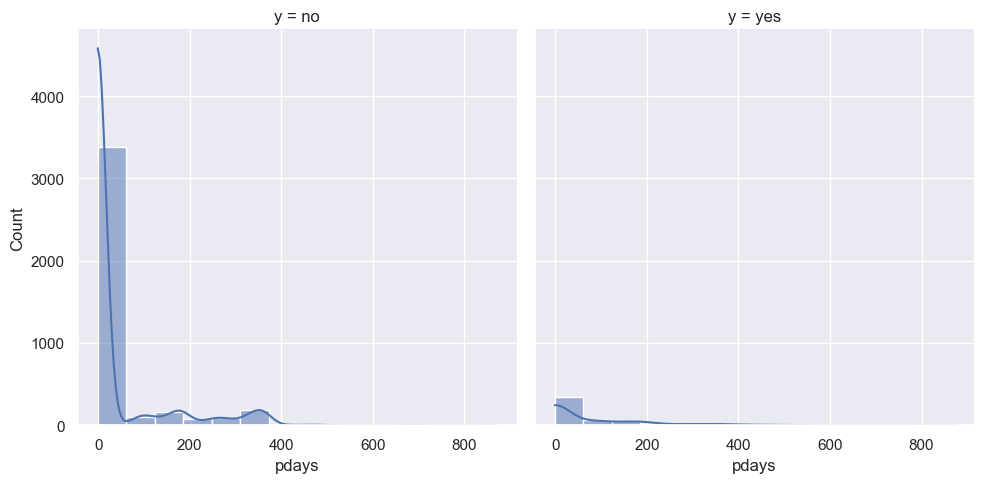

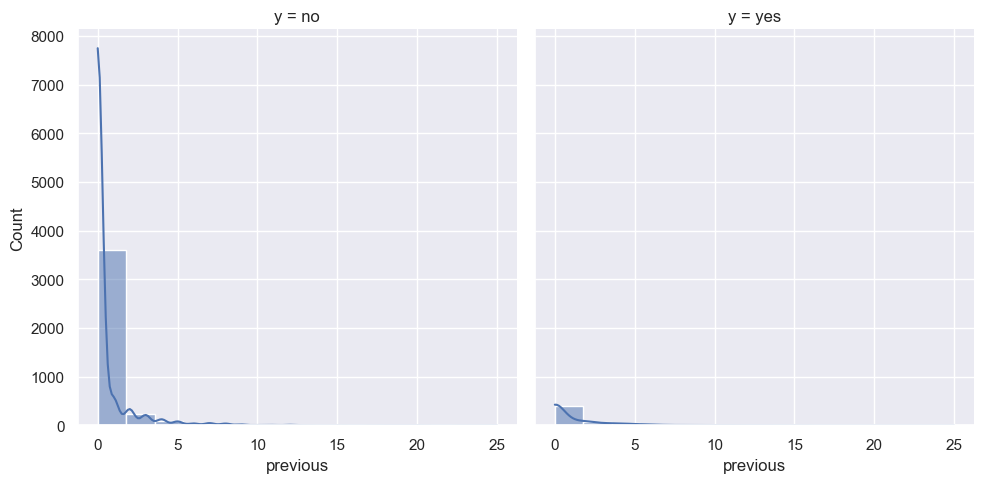

In [25]:
for i in features_numerical:
    sns.displot(data=df, x=i, col="y", kde=True)
    plt.xlabel(i)
    plt.show()

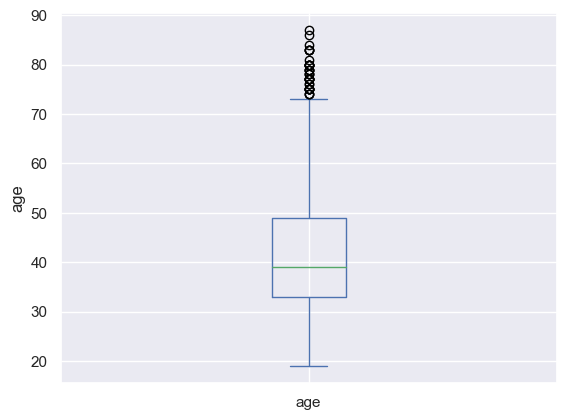

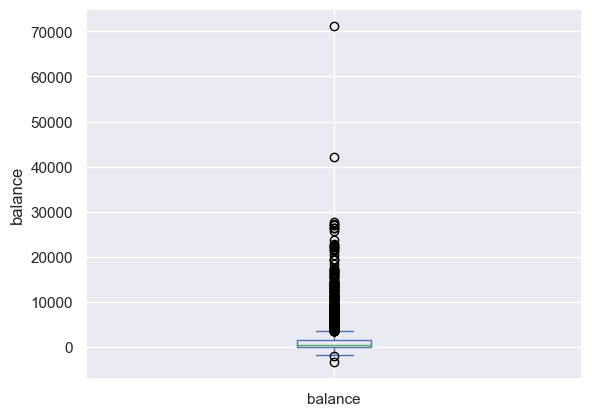

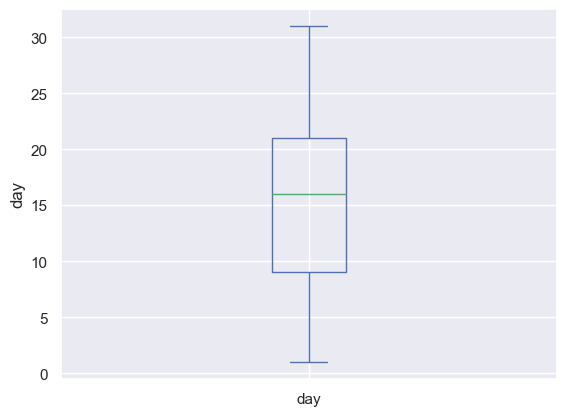

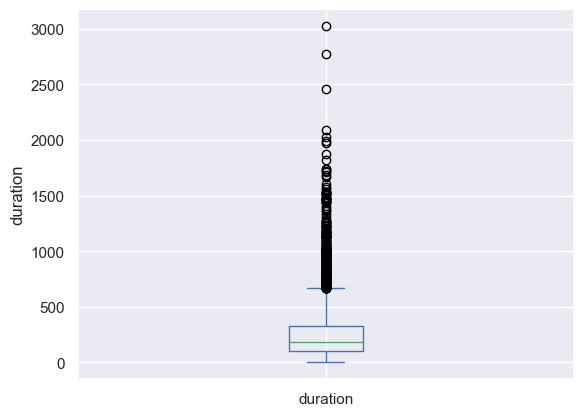

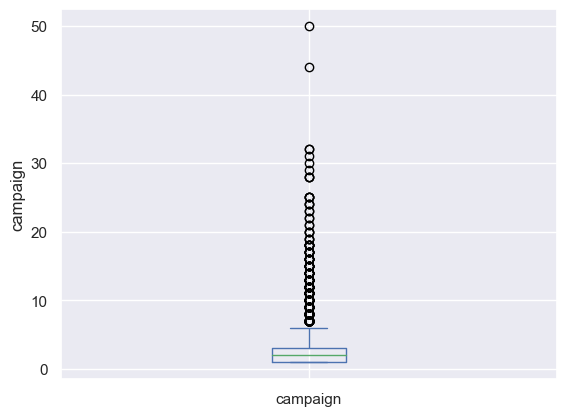

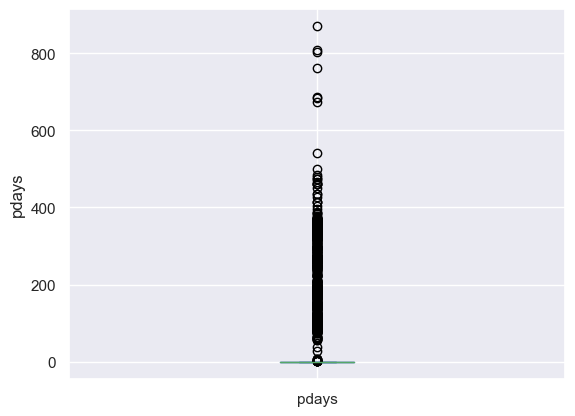

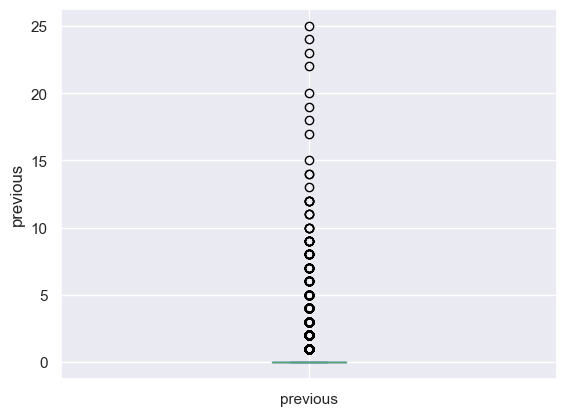

In [26]:
for i in features_numerical:
    df[i].plot.box()
    plt.ylabel(i)
    plt.show()

In [27]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<Axes: xlabel='y', ylabel='count'>

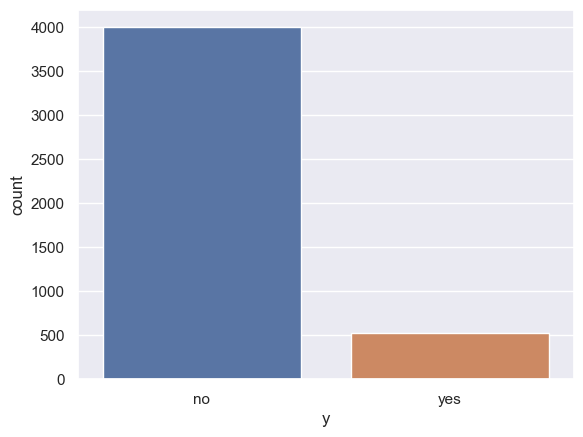

In [28]:
sns.countplot(x='y', data=df)

In [29]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [30]:
df[features_numerical].skew()

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

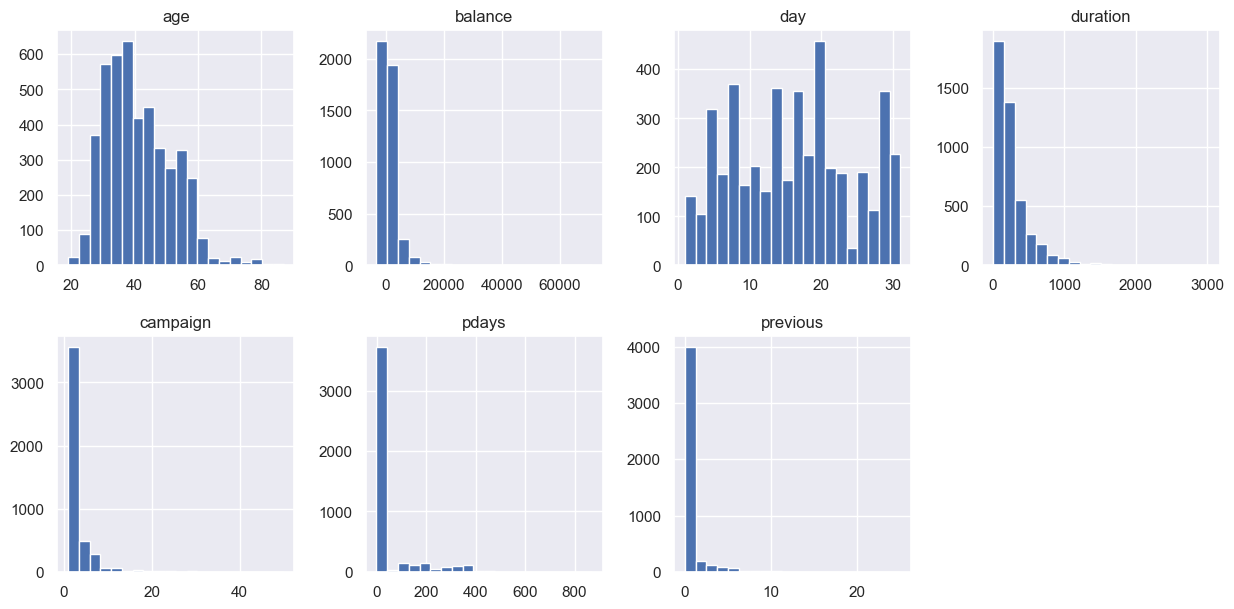

In [31]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)
plt.show()

## EDA - Bivariate

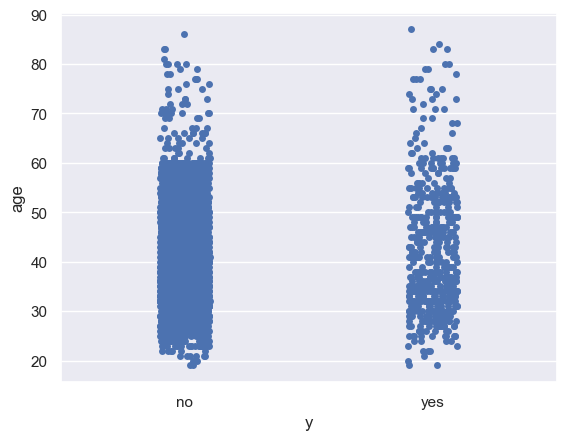

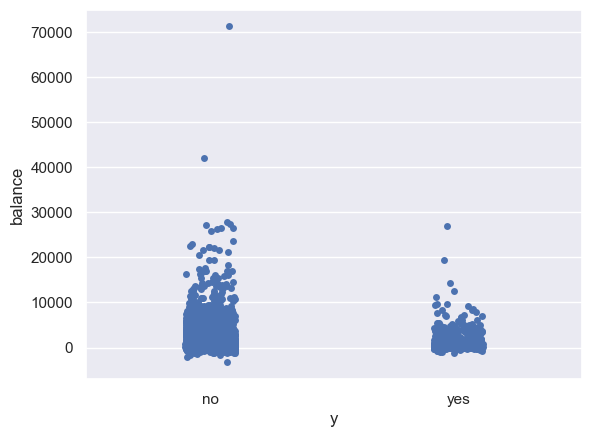

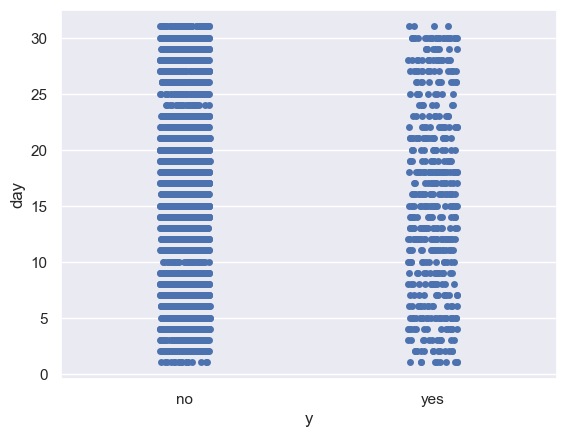

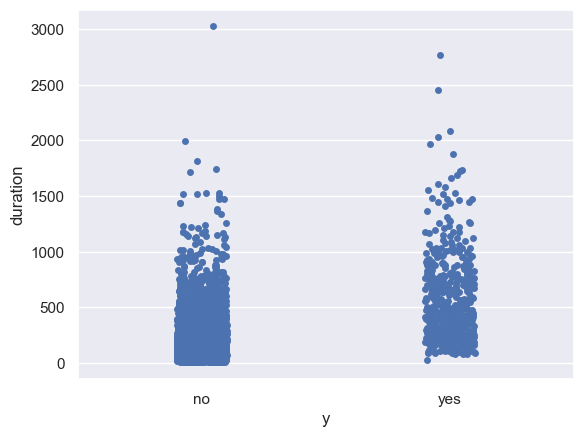

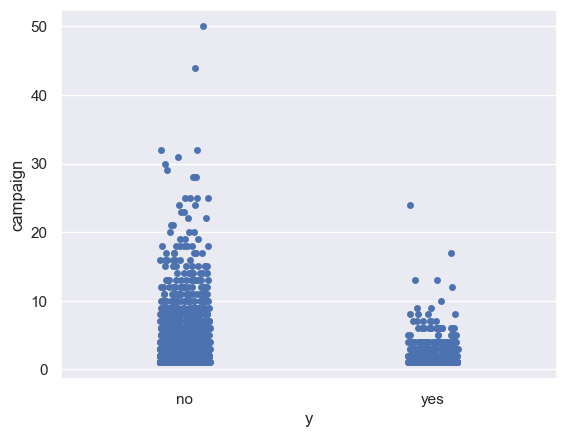

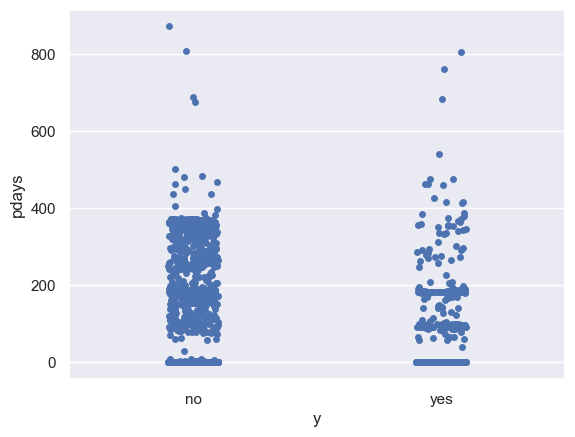

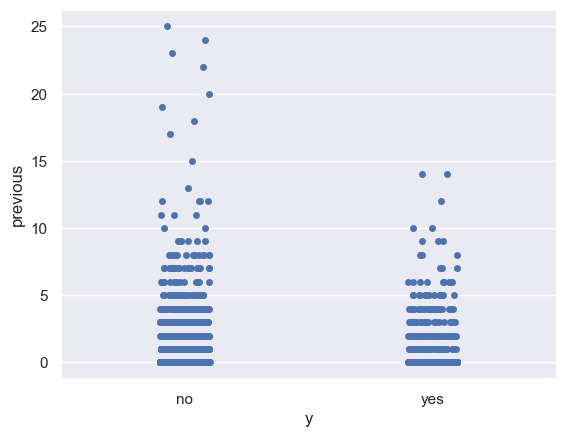

In [32]:
for i in features_numerical:
    sns.stripplot(x="y", y=i, data=df)
    plt.xlabel("y")
    plt.ylabel(i)
    plt.show()

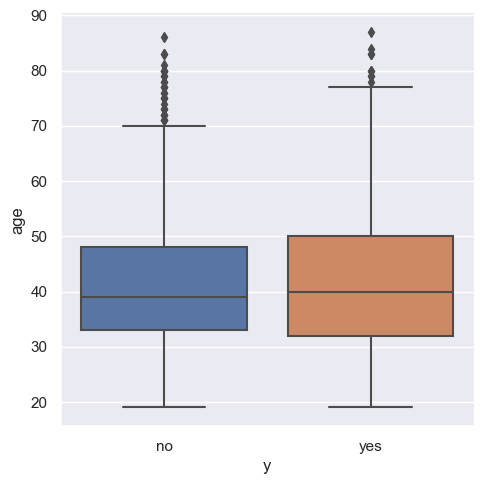

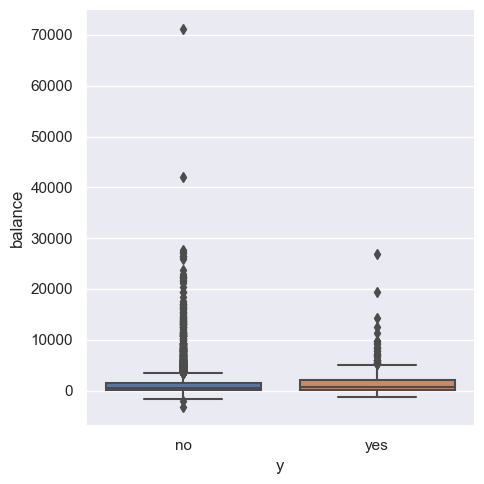

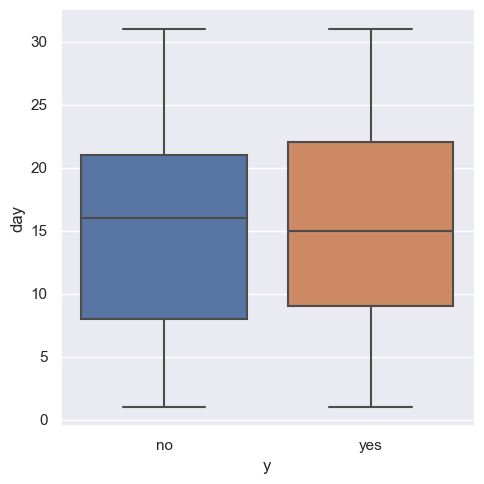

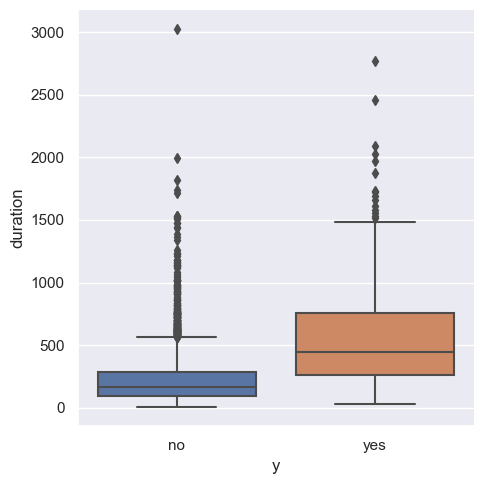

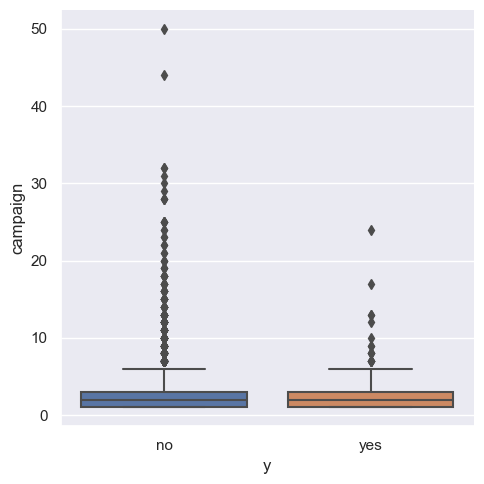

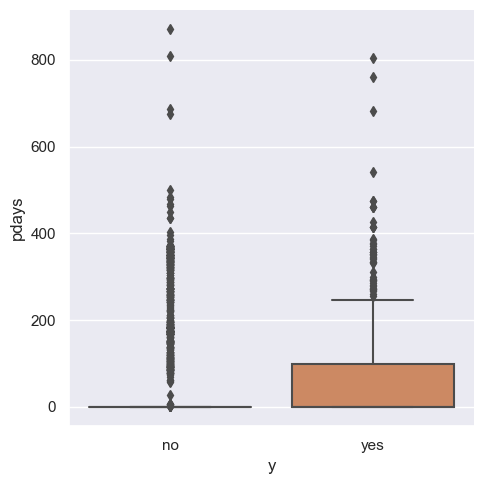

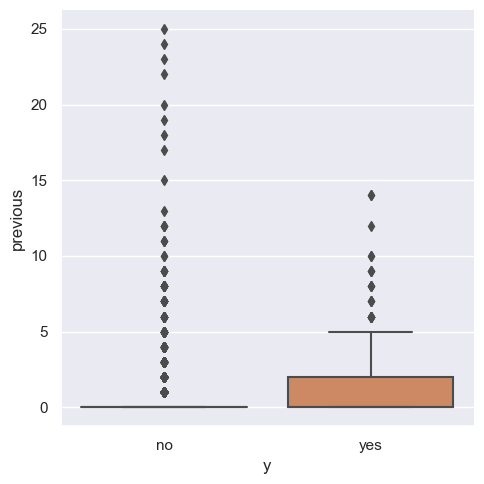

In [33]:
for i in features_numerical:
    sns.catplot(x="y", y=i, kind="box", data=df)
    plt.xlabel("y")
    plt.ylabel(i)
    plt.show()

<Figure size 1000x500 with 0 Axes>

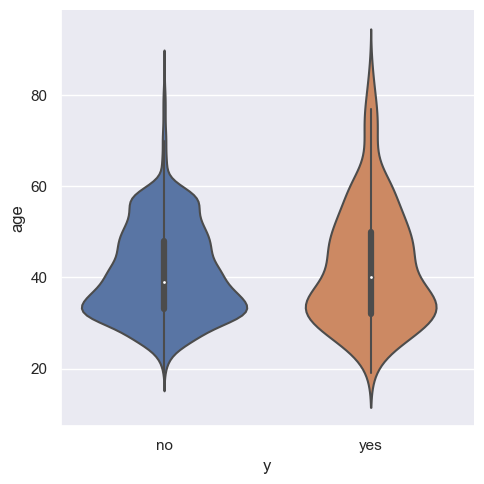

<Figure size 1000x500 with 0 Axes>

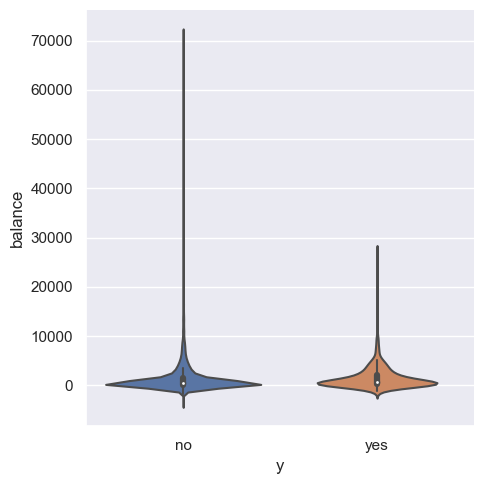

<Figure size 1000x500 with 0 Axes>

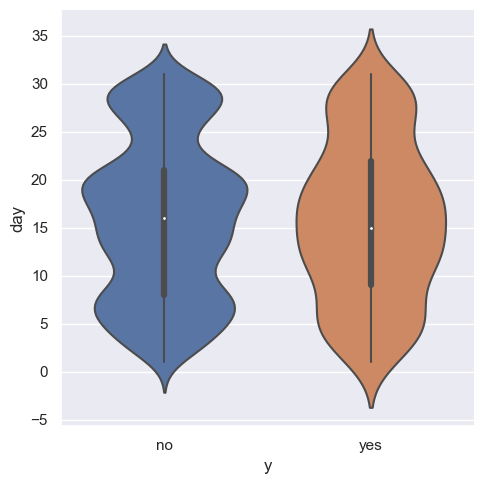

<Figure size 1000x500 with 0 Axes>

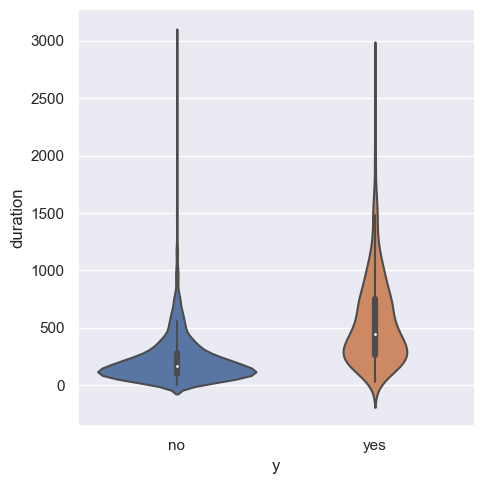

<Figure size 1000x500 with 0 Axes>

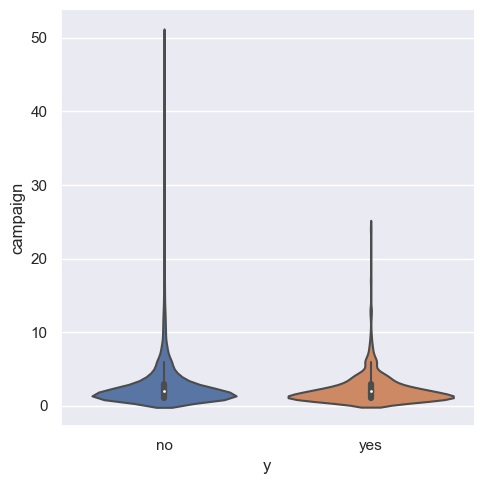

<Figure size 1000x500 with 0 Axes>

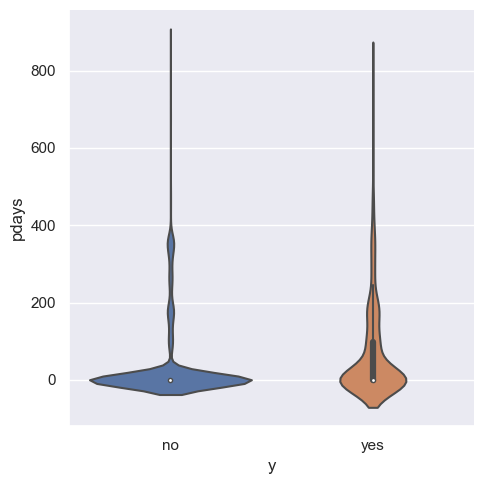

<Figure size 1000x500 with 0 Axes>

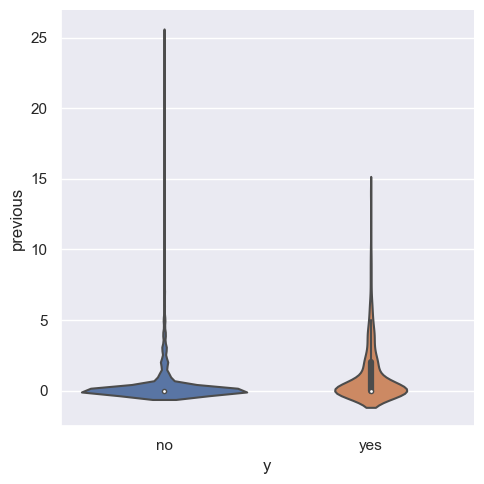

In [34]:
for i in features_numerical:
    plt.figure(figsize=(10,5))
    sns.catplot(x="y", y=i, kind="violin", data=df)
    plt.xlabel("y")
    plt.ylabel(i)
    plt.show()

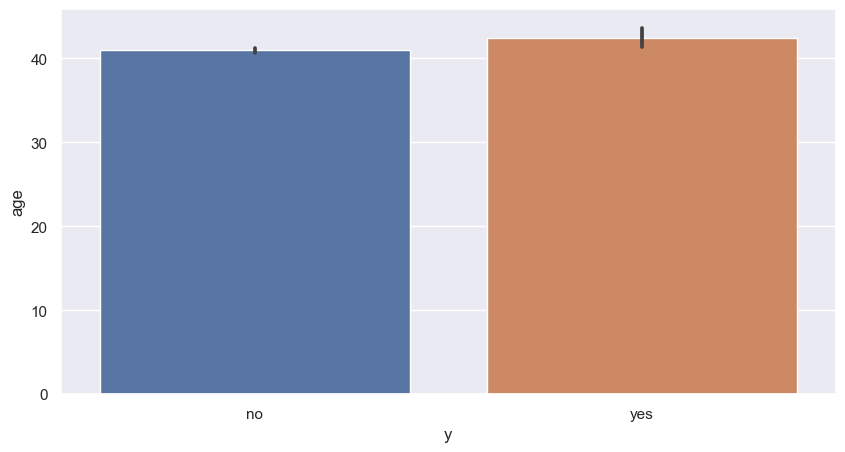

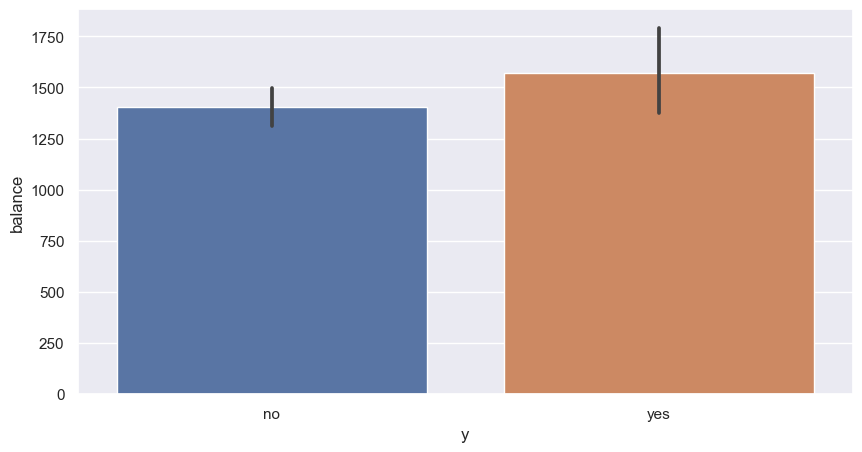

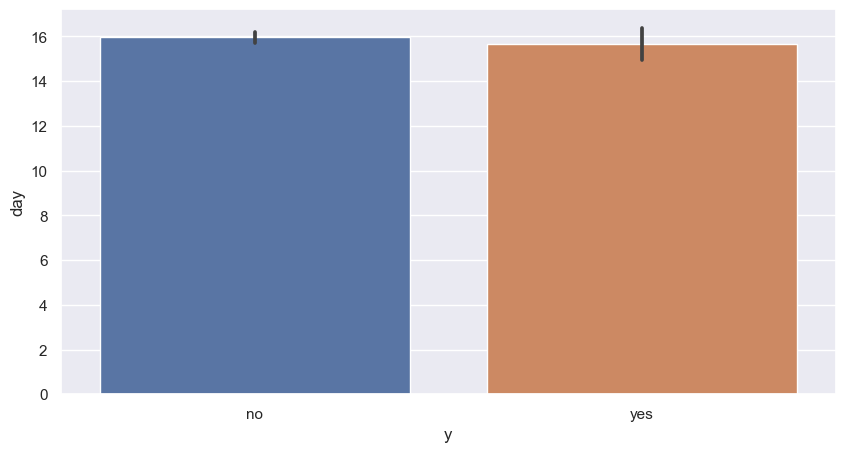

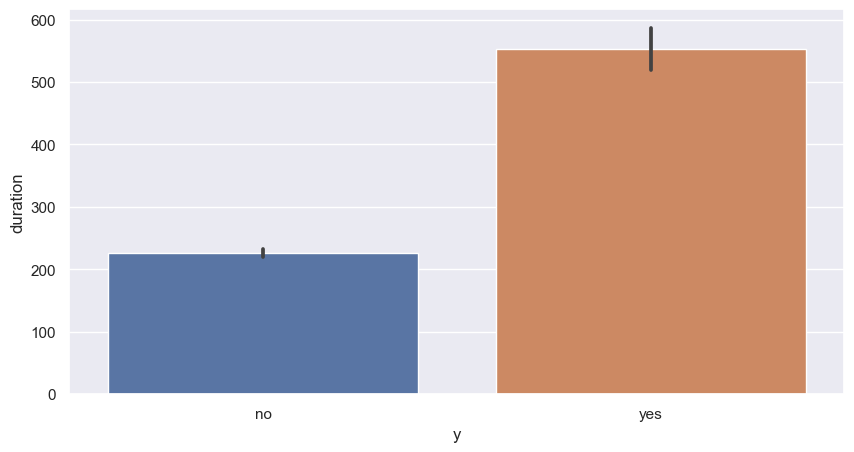

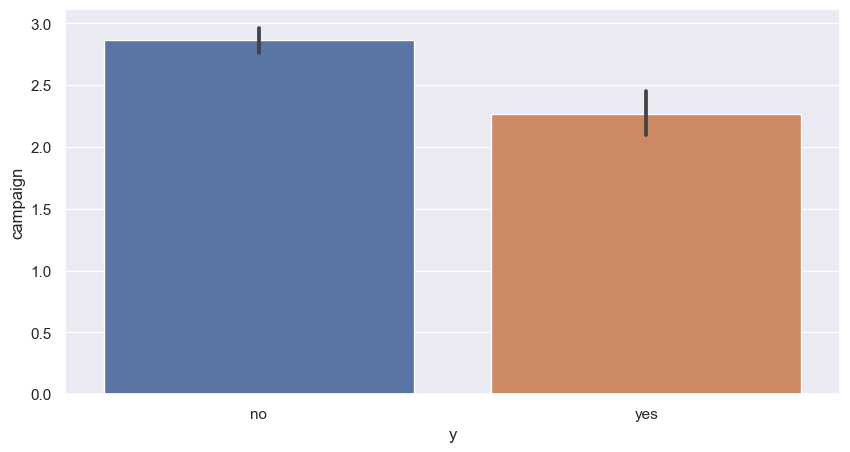

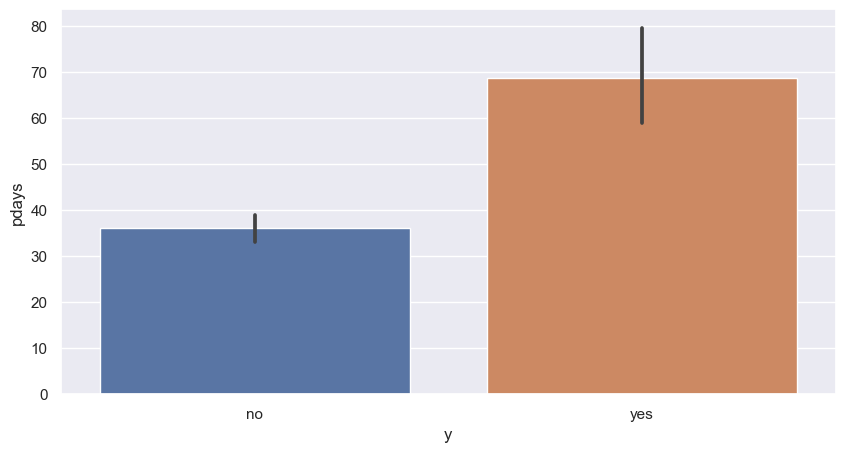

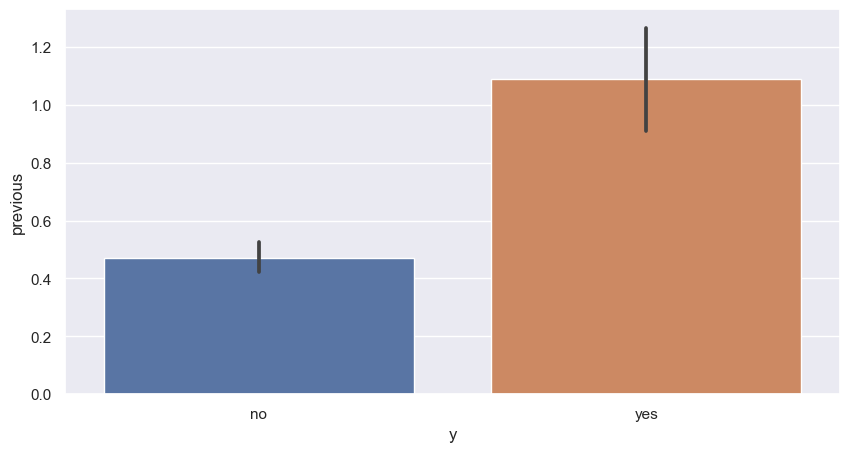

In [35]:
for i in features_numerical:
    plt.figure(figsize=(10,5))
    sns.barplot(x="y", y=i, data=df)
    plt.xlabel("y")
    plt.ylabel(i)
    plt.show()

## EDA - Multivariate

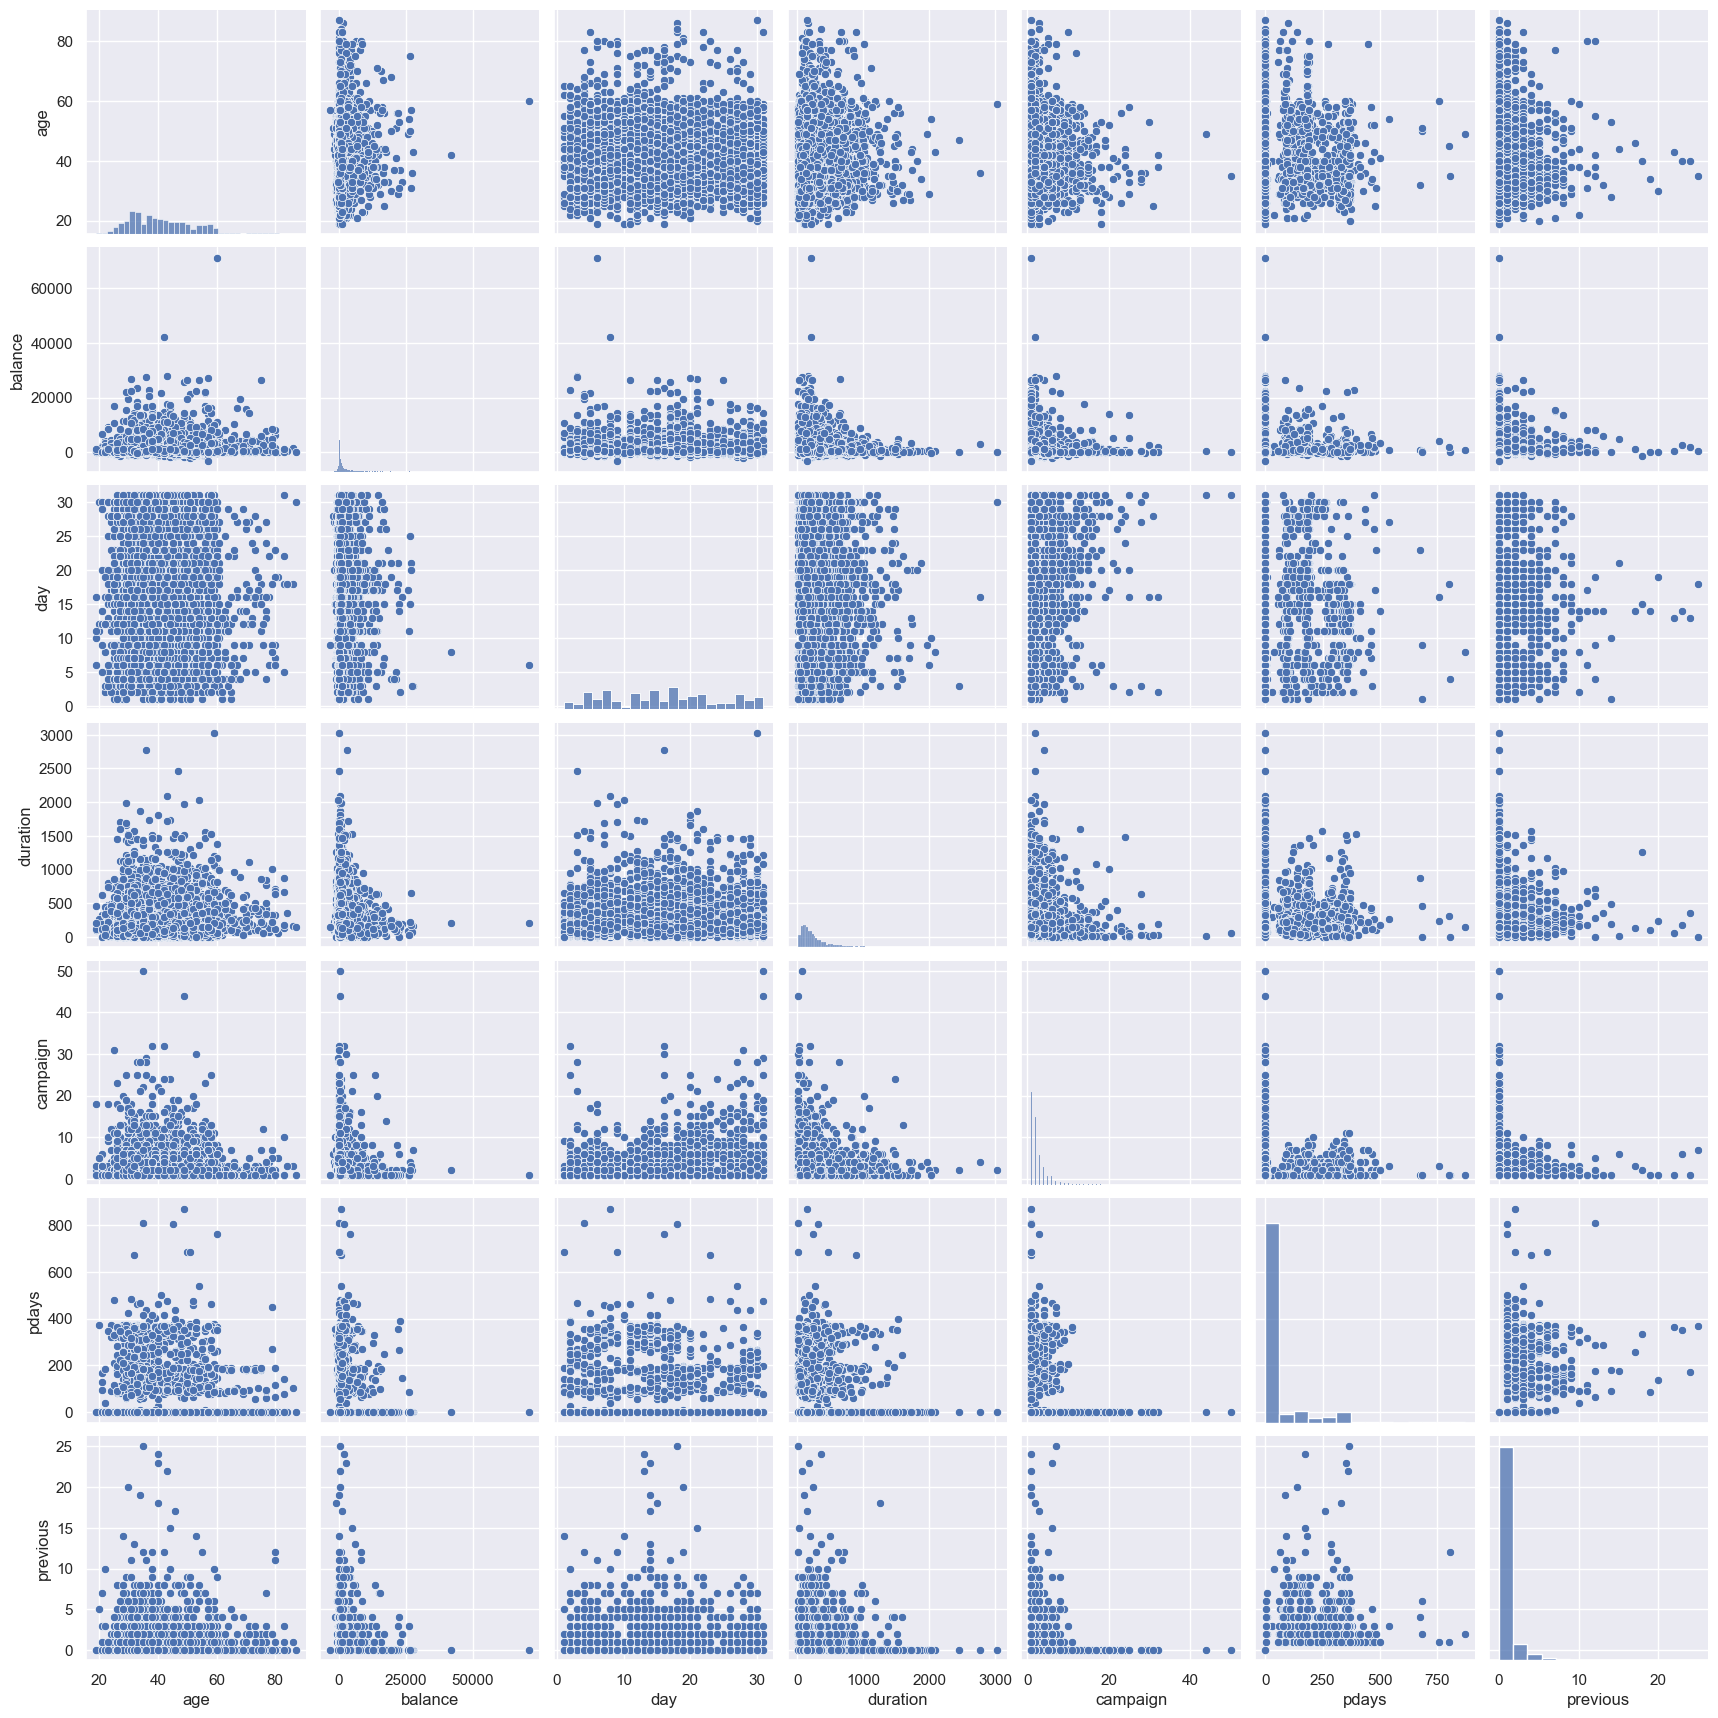

In [36]:
sns.pairplot(data=df)

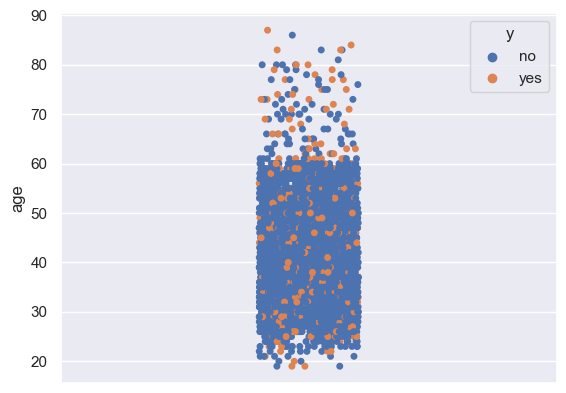

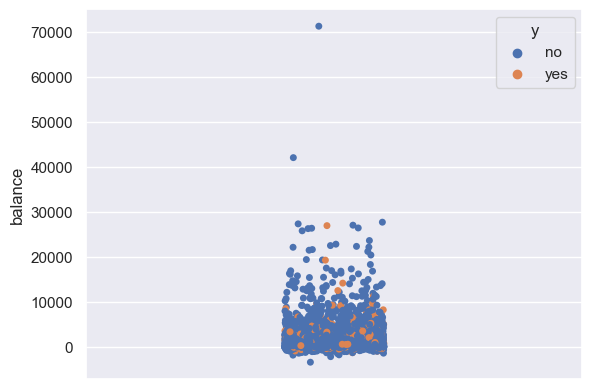

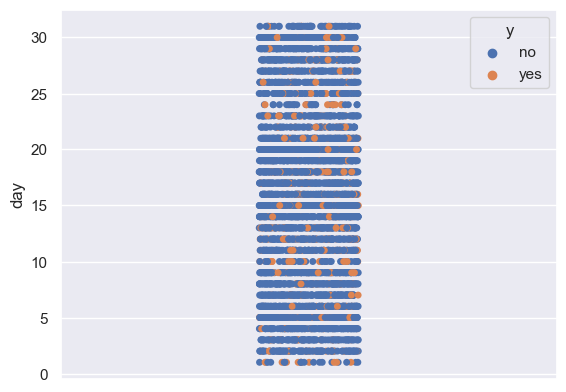

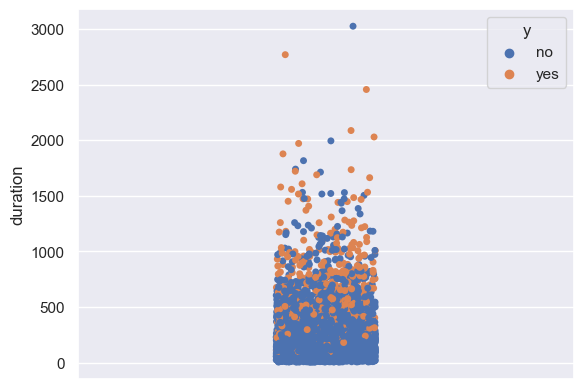

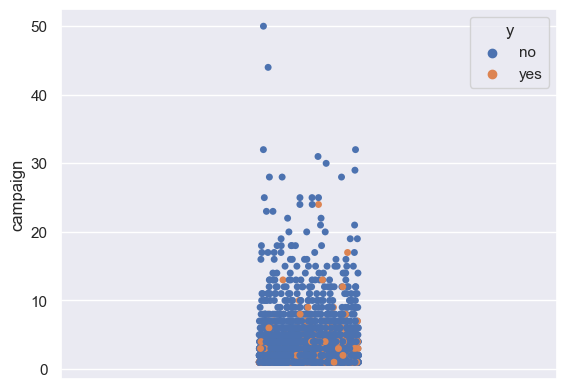

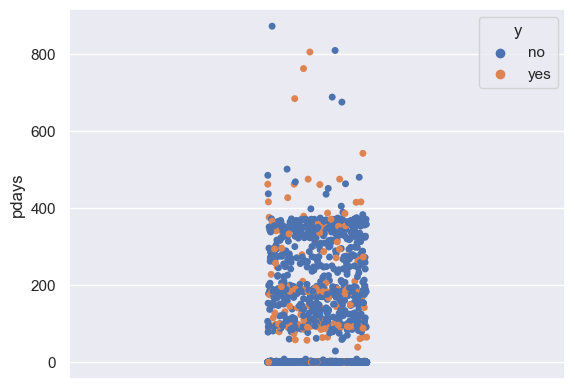

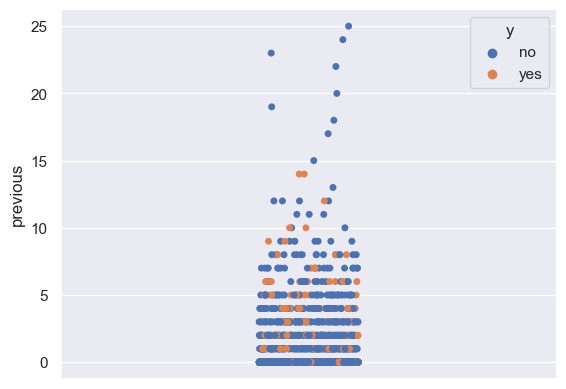

In [37]:
for i in features_numerical:
    sns.stripplot(y=i, hue='y', data=df)
    #plt.xlabel("y")
    plt.ylabel(i)
    plt.show()

In [38]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [39]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

<Axes: >

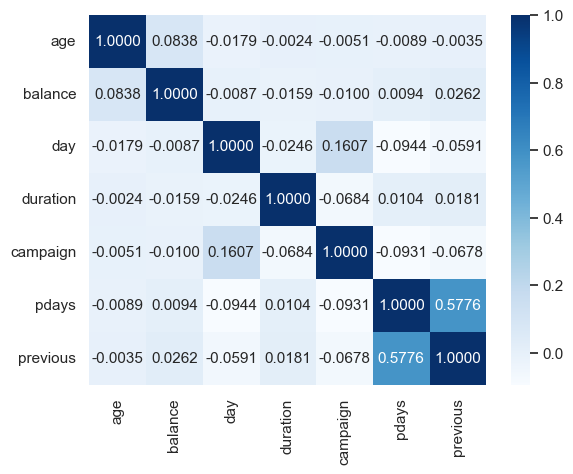

In [40]:
#plt.figure(figsize=(12,8))
sns.heatmap(df[features_numerical].corr(), cbar=True, fmt="0.4f", annot=True, annot_kws={'size': 11}, cmap="Blues")

# Data Preprocessing

## Duplicate records check

In [41]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [42]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

## Outlier treatment

### Checking if features are normally distributed or not

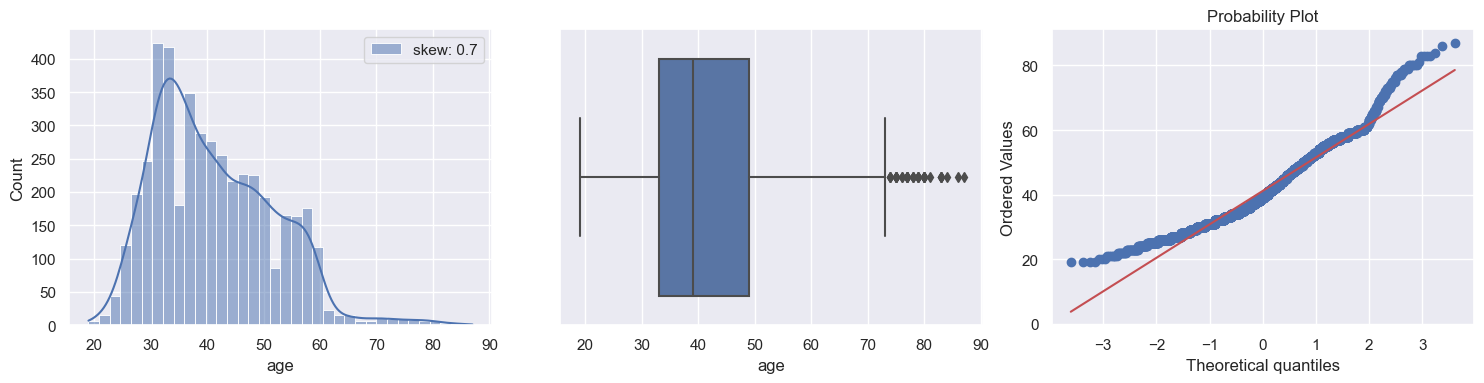

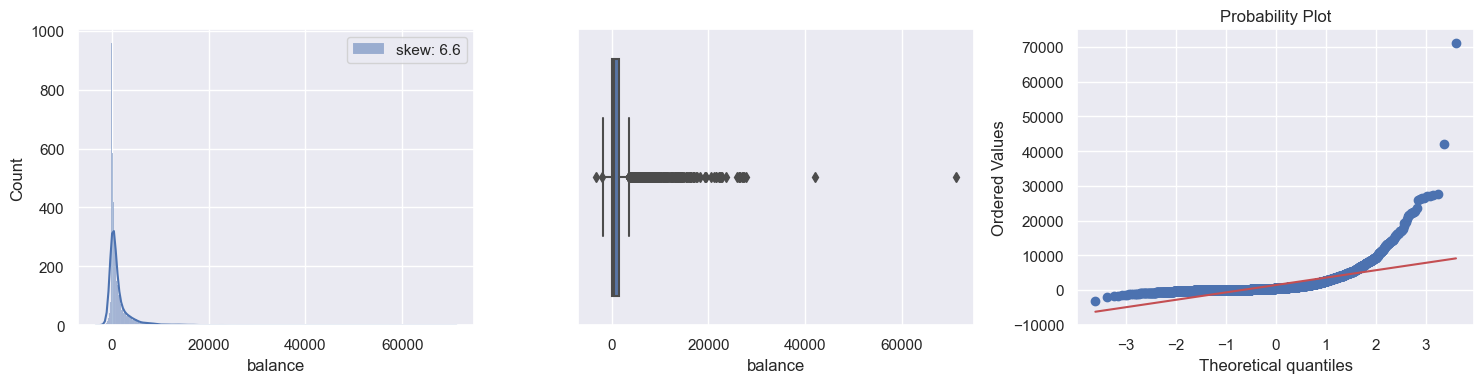

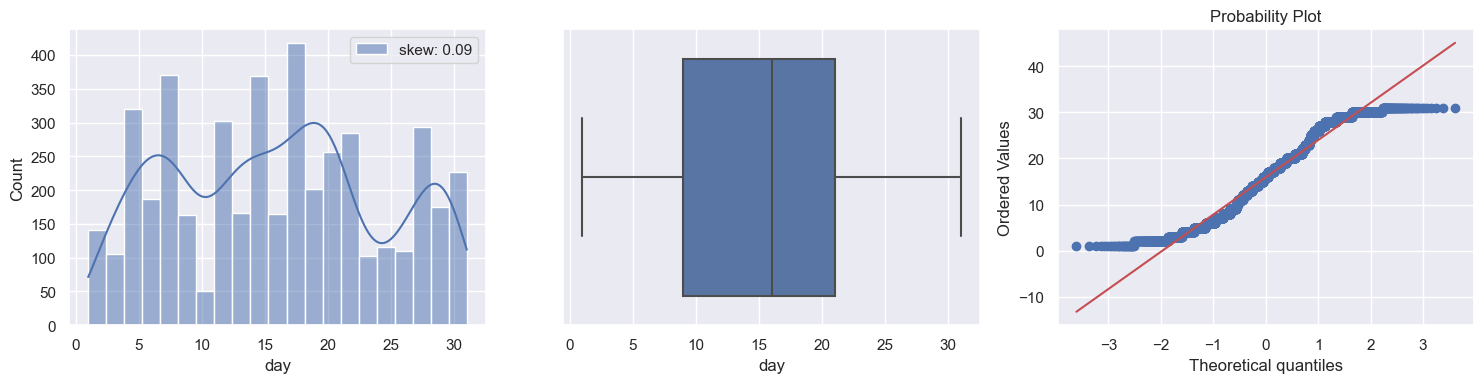

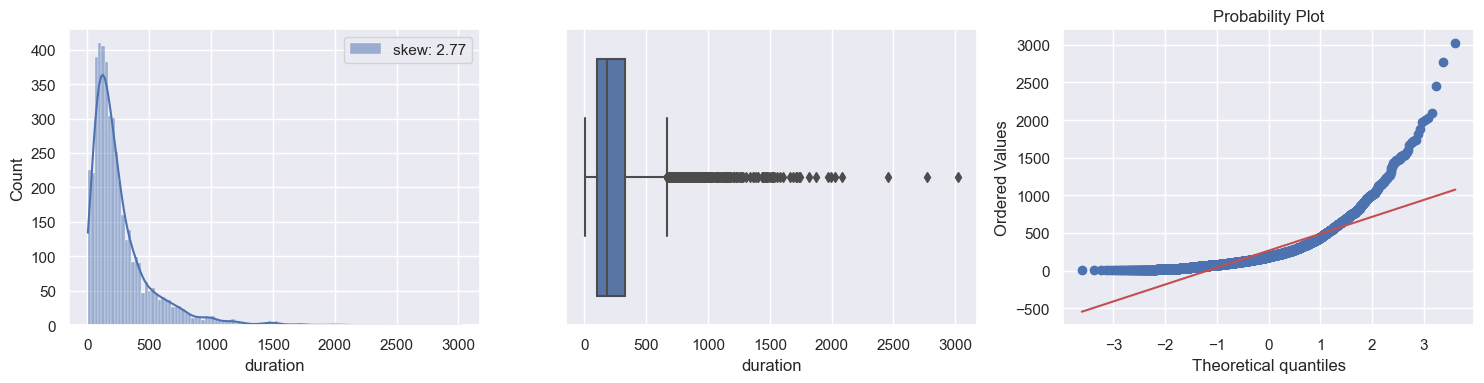

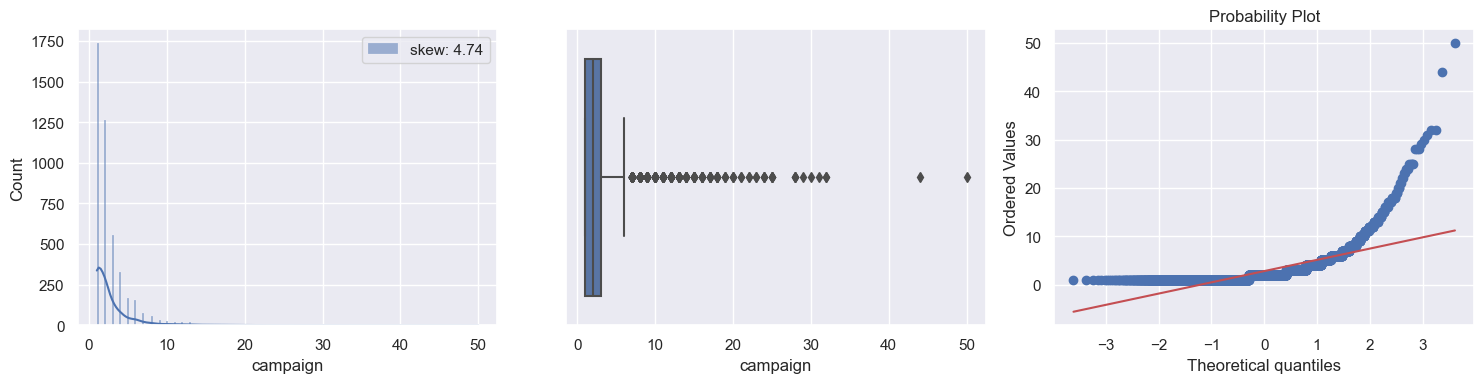

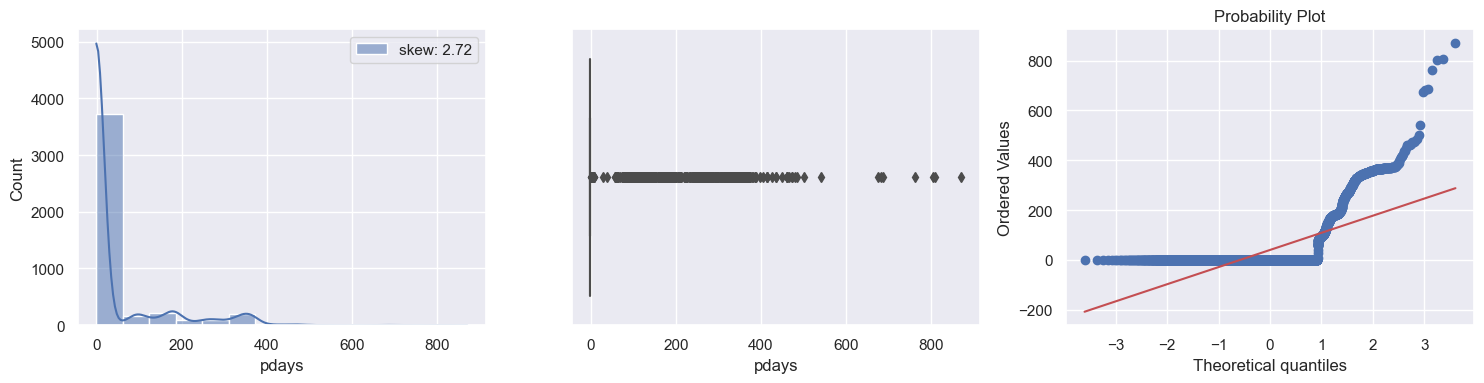

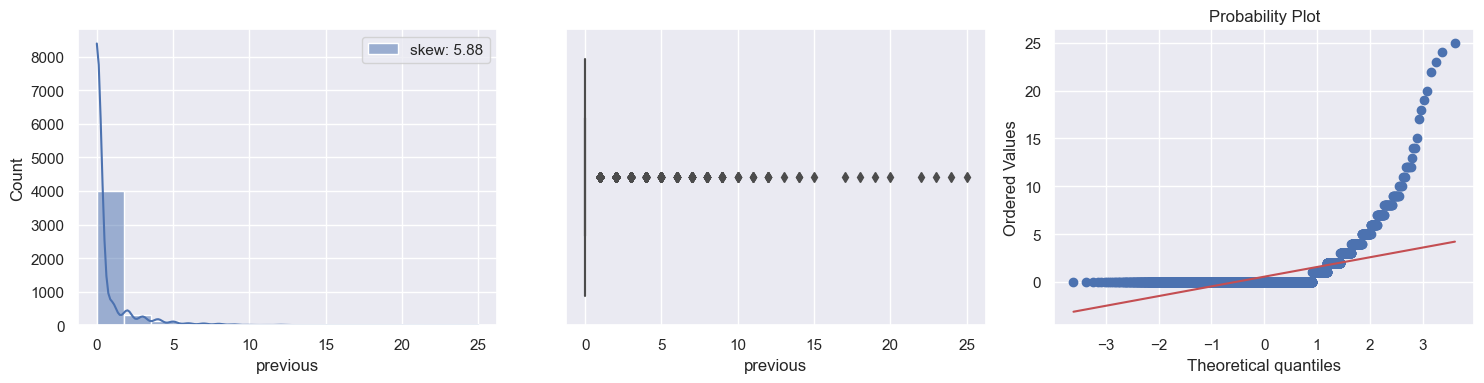

In [43]:
import scipy.stats as stats

for i in features_numerical:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[i], kde=True, label="skew: " + str(np.round(df[i].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=df[i])
    plt.subplot(133)
    stats.probplot(df[i], plot=plt, fit=True)
    plt.tight_layout()
    plt.show()

#### Z-Score capping

In [44]:
dfNew = df.copy()

In [45]:
def zscore_capping(df, cols, thr):

    for col in cols:

        mean = df[col].mean()
        std = df[col].std()

        upper_bound = mean + thr*std
        lower_bound = mean - thr*std

        df[col] = np.where(df[col]>upper_bound, upper_bound,
                 np.where(df[col]<lower_bound, lower_bound, df[col]))

In [46]:
features_numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [47]:
df['pdays'].value_counts()

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: count, Length: 292, dtype: int64

In [48]:
df['previous'].value_counts()

previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: count, dtype: int64

In [49]:
zscore_capping(dfNew, features_numerical[:-2], 3)

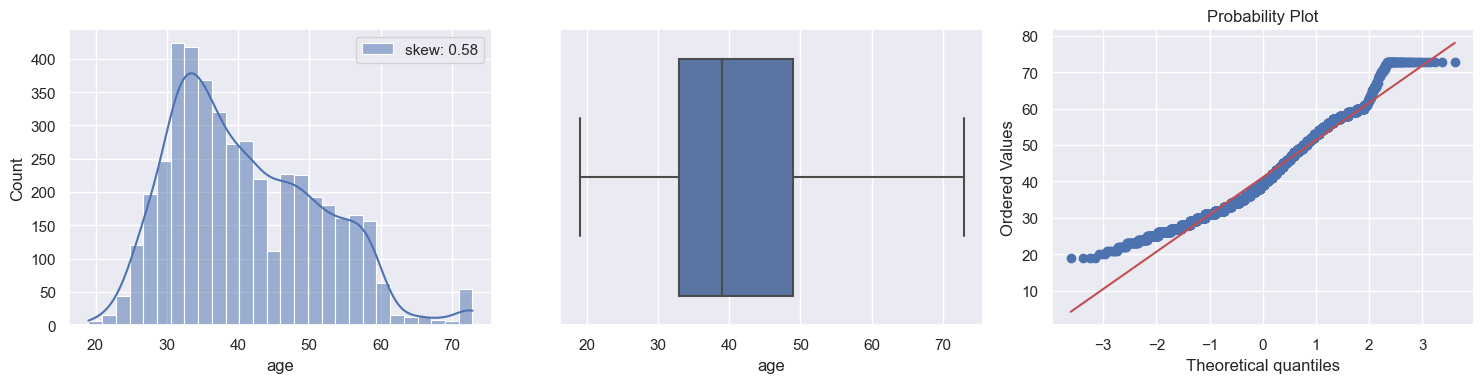

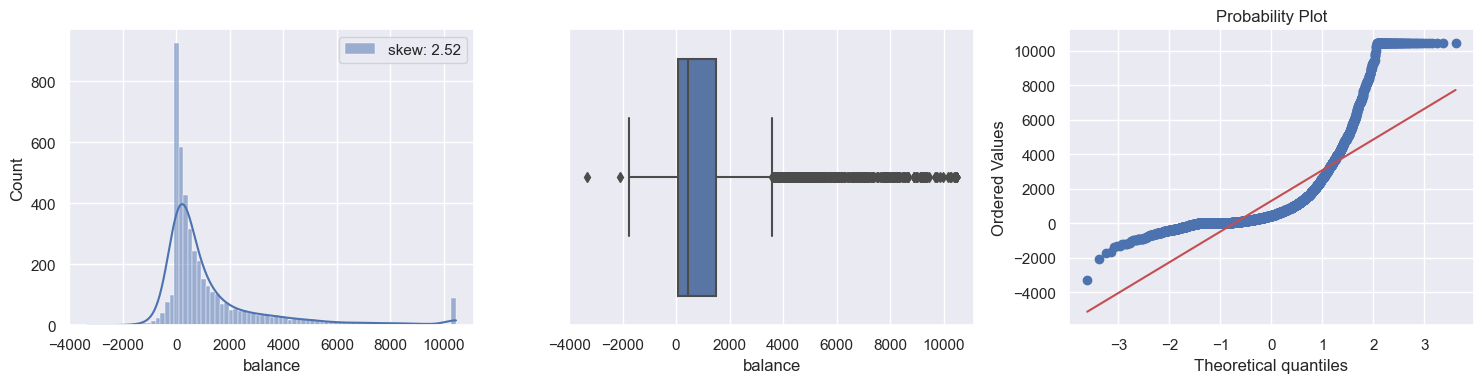

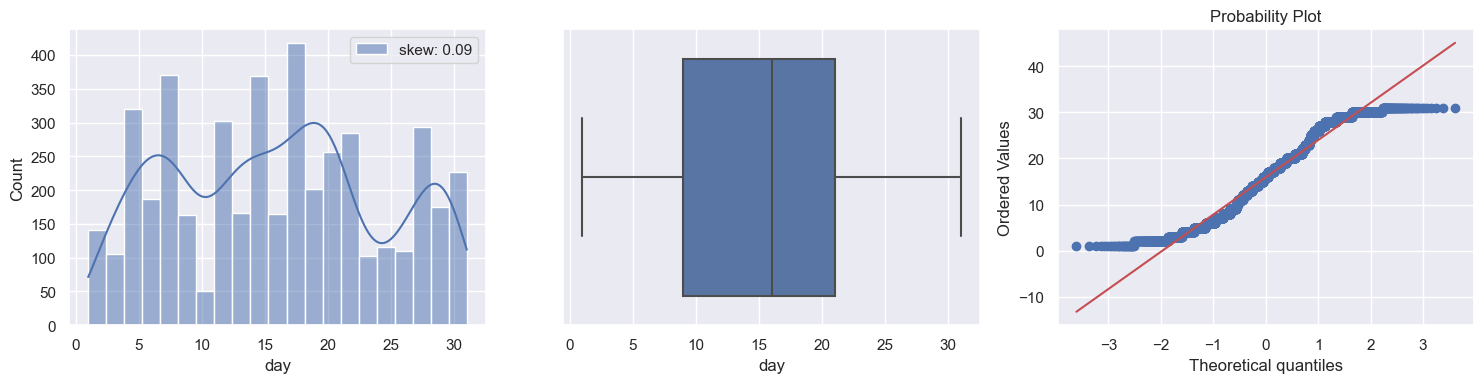

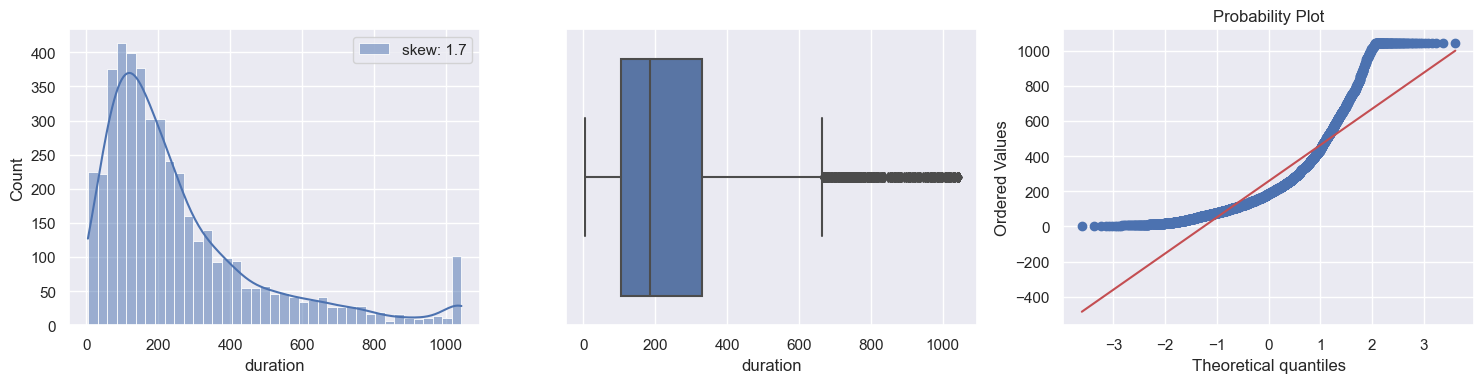

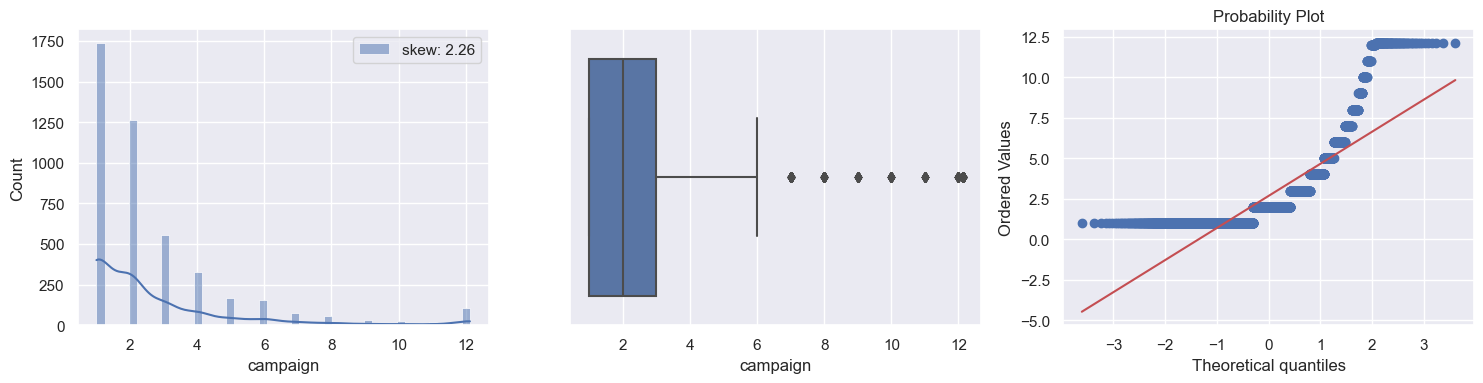

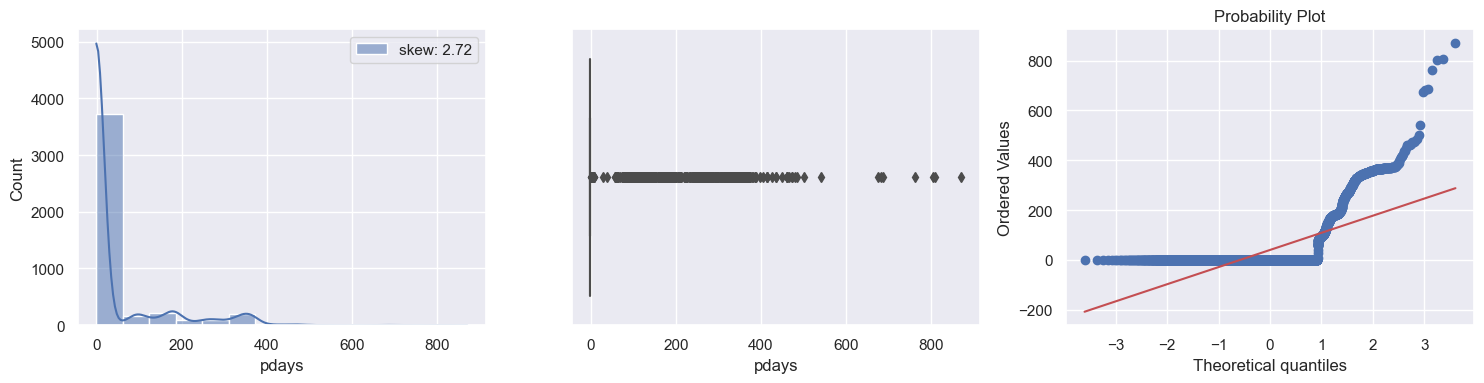

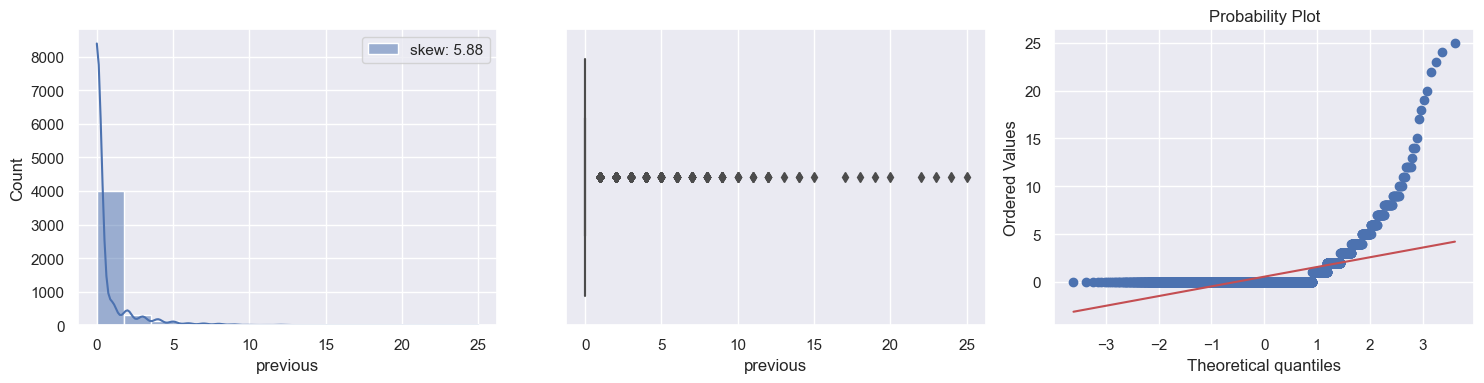

In [50]:
import scipy.stats as stats

for i in features_numerical:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(dfNew[i], kde=True, label="skew: " + str(np.round(dfNew[i].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=dfNew[i])
    plt.subplot(133)
    stats.probplot(dfNew[i], plot=plt, fit=True)
    plt.tight_layout()
    plt.show()

#### IQR capping

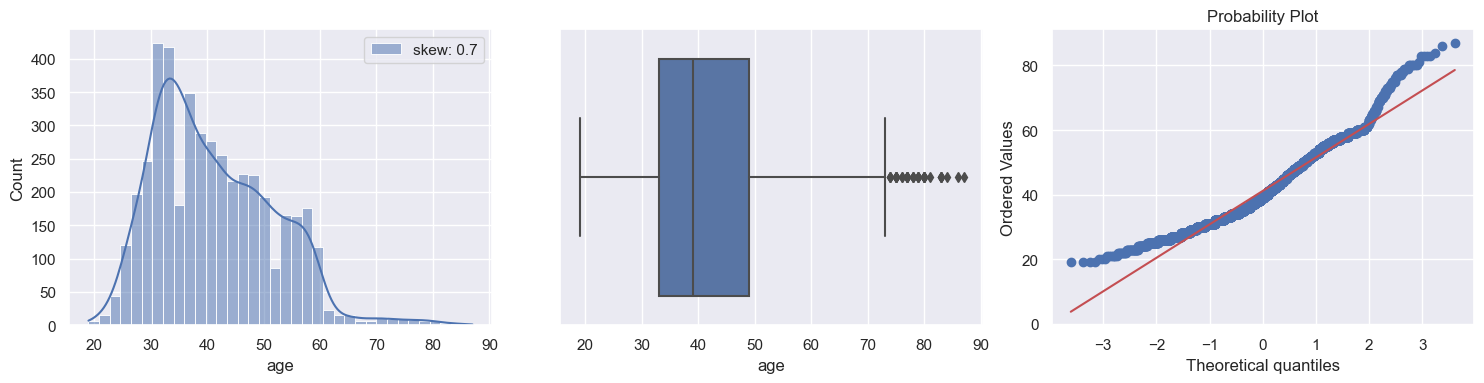

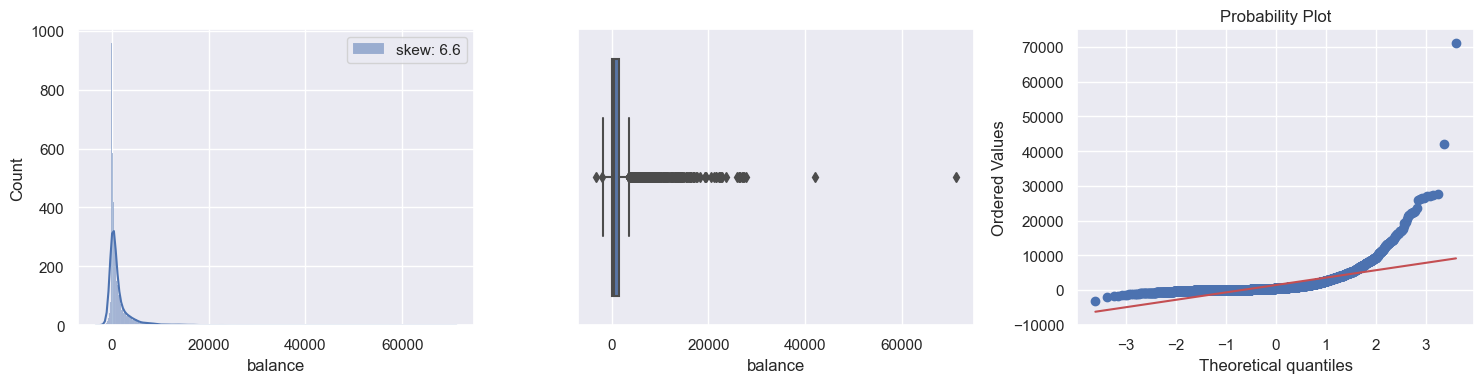

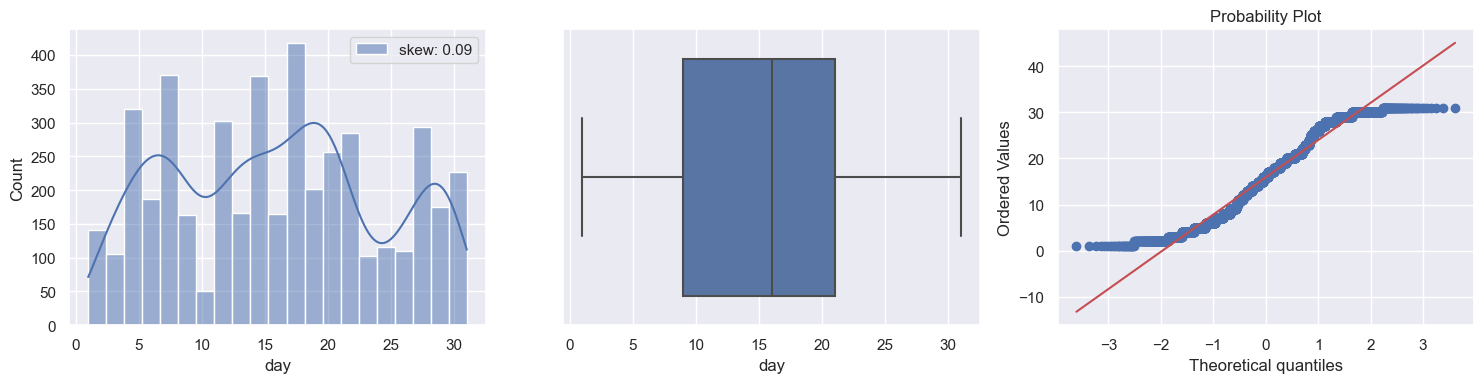

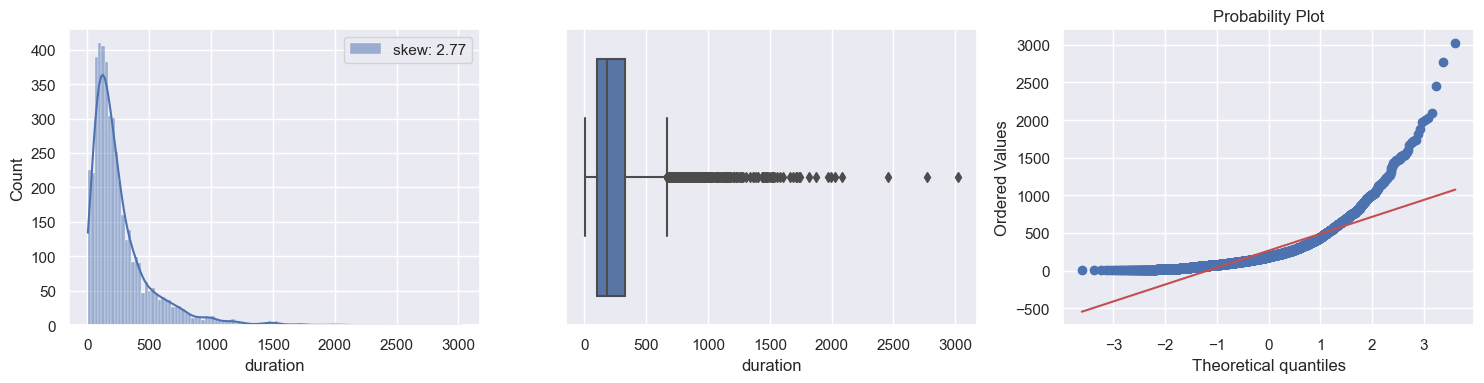

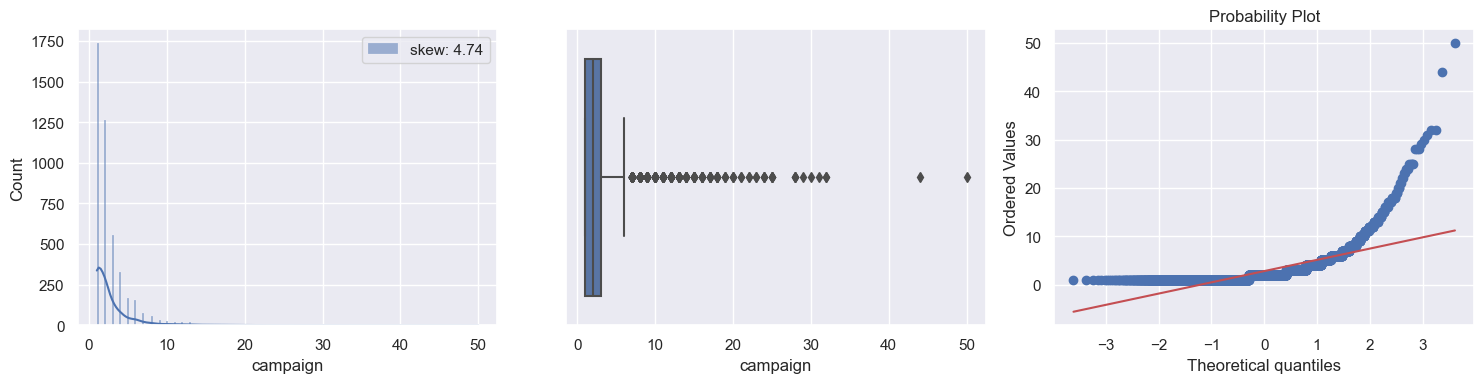

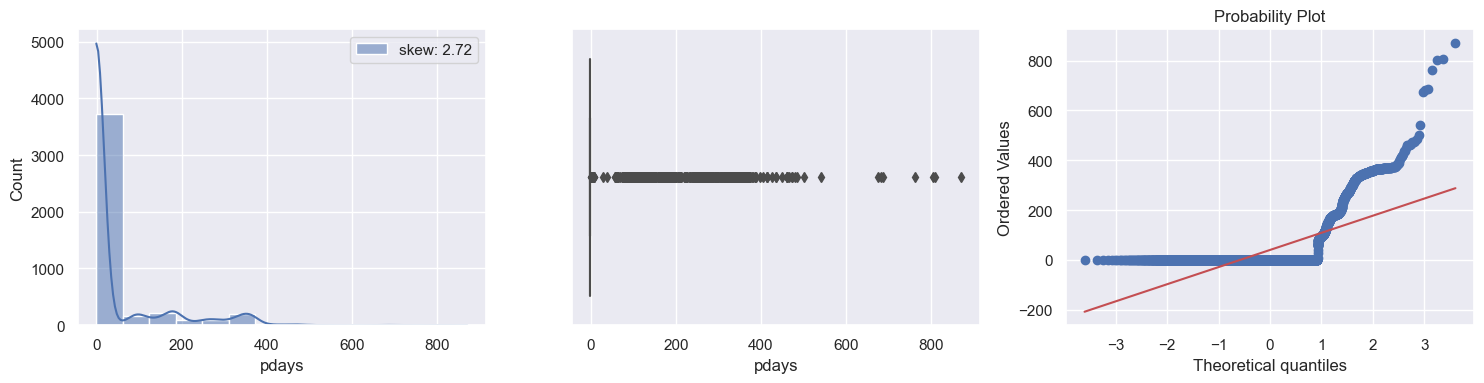

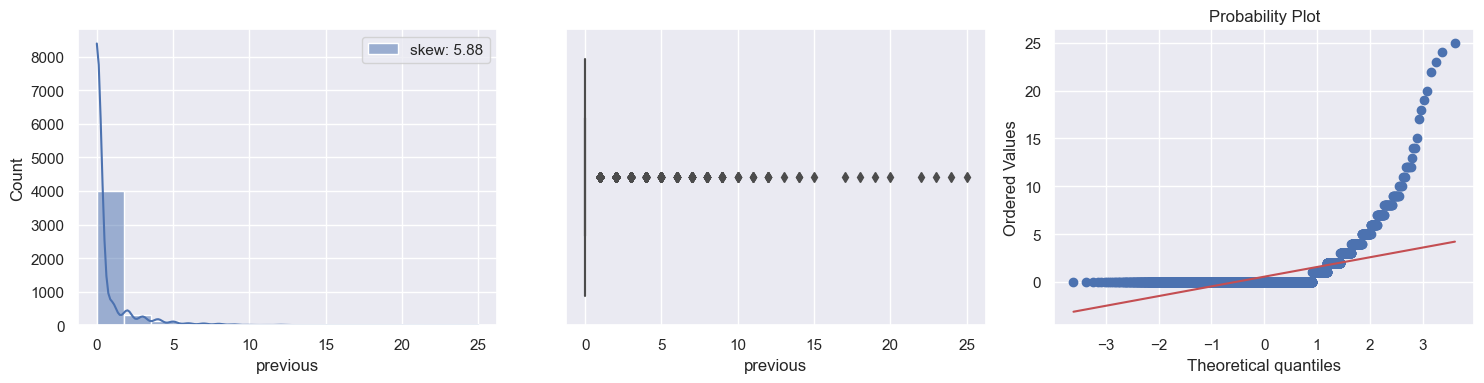

In [51]:
import scipy.stats as stats

for i in features_numerical:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[i], kde=True, label="skew: " + str(np.round(df[i].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(x=df[i])
    plt.subplot(133)
    stats.probplot(df[i], plot=plt, fit=True)
    plt.tight_layout()
    plt.show()

In [52]:
dfNew2 = df.copy()

In [53]:
def iqr_capping(df, cols, factor):

    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [54]:
iqr_capping(dfNew2, features_numerical[:-2], 1.5)

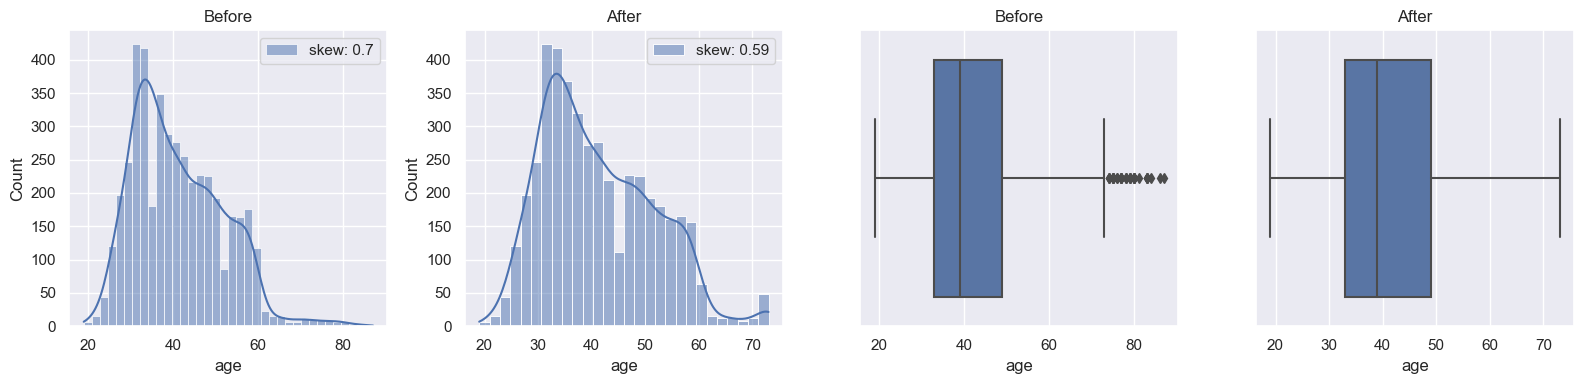

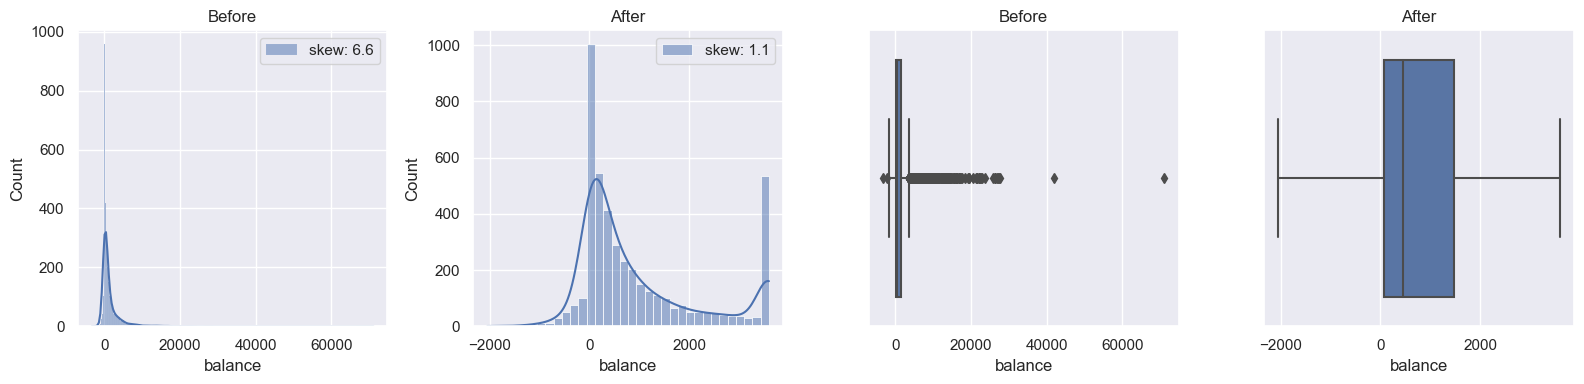

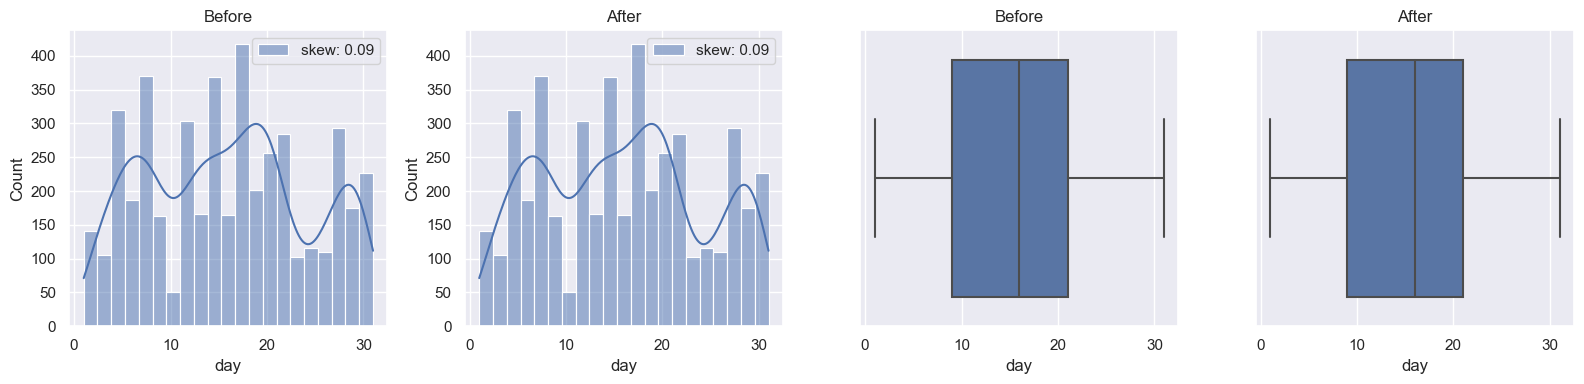

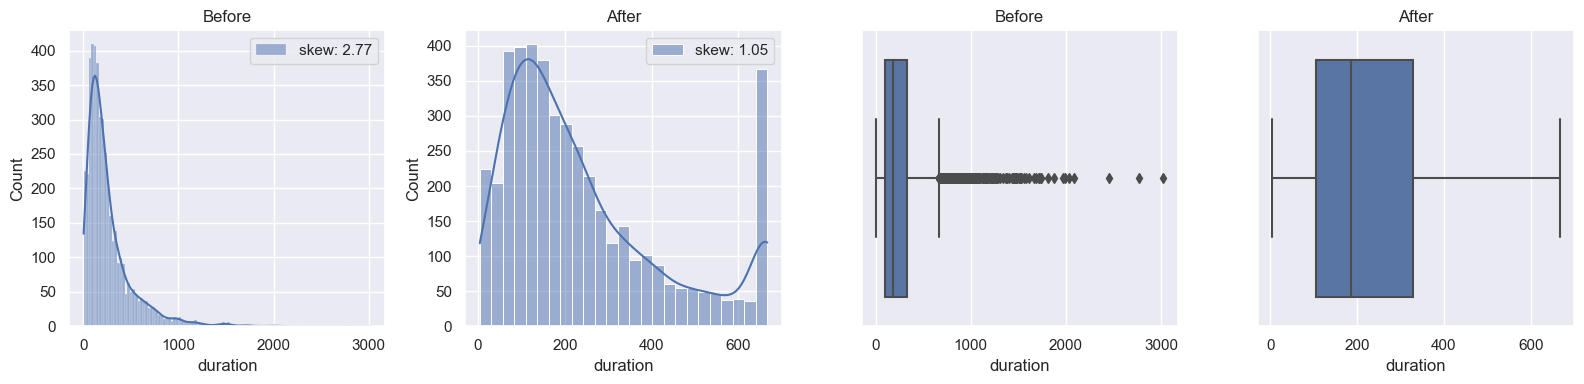

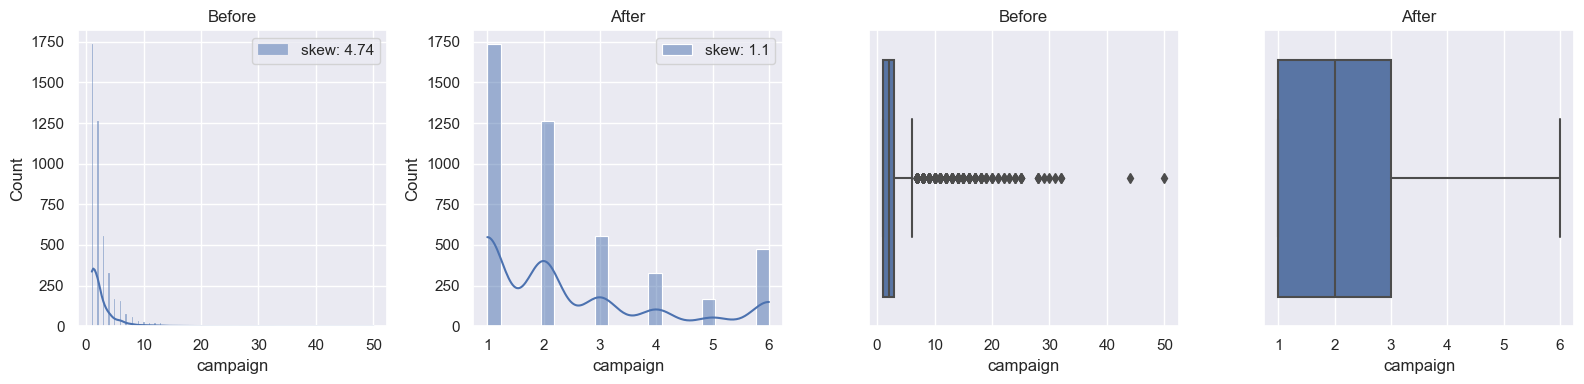

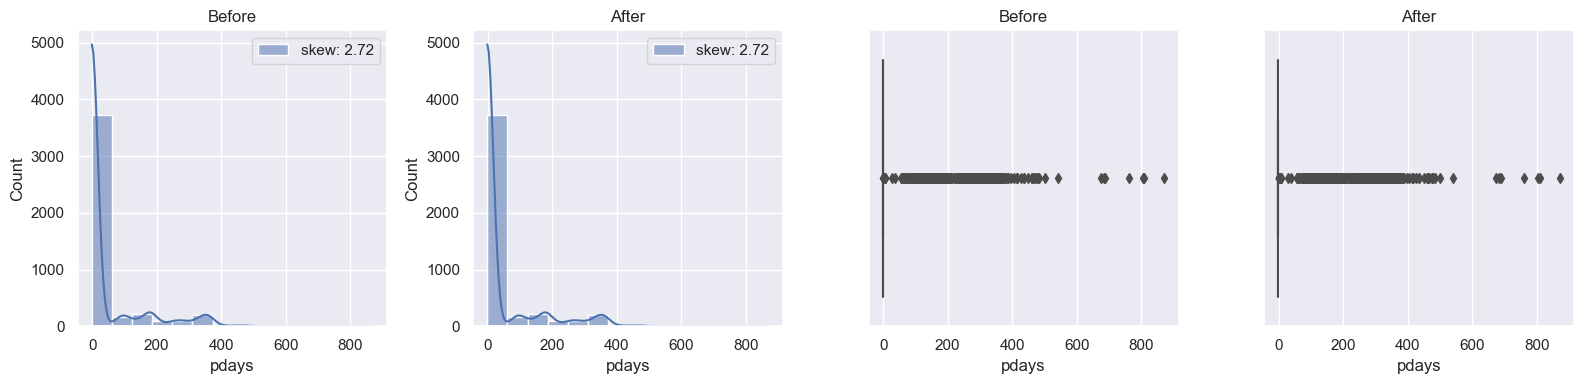

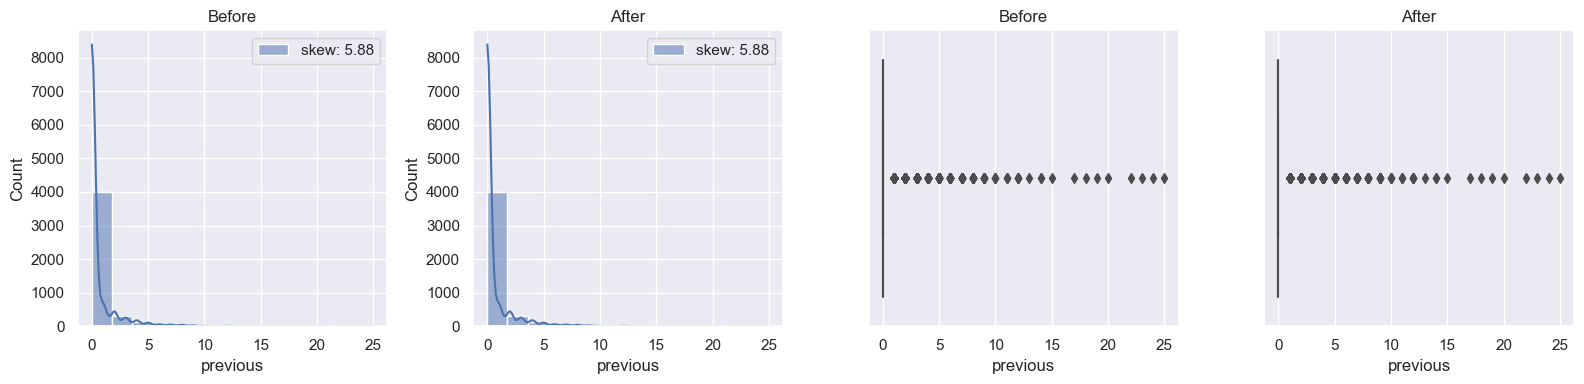

In [55]:
for col in features_numerical:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.histplot(x=df[col], kde=True, label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.histplot(x=dfNew2[col], kde=True, label="skew: " + str(np.round(dfNew2[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(x=df[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(x=dfNew2[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()


In [56]:
df['campaign'].value_counts()

campaign
1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: count, dtype: int64

In [57]:
#campaign, pdays, previous = discrete numerical variables

In [58]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [59]:
dfNew2.head()

age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married    primary      no   1787.0      no   no   
1  33.0     services  married  secondary      no   3596.5     yes  yes   
2  35.0   management   single   tertiary      no   1350.0     yes   no   
3  30.0   management  married   tertiary      no   1476.0     yes  yes   
4  59.0  blue-collar  married  secondary      no      0.0     yes   no   

    contact   day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  19.0   oct      79.0       1.0     -1         0  unknown  no  
1  cellular  11.0   may     220.0       1.0    339         4  failure  no  
2  cellular  16.0   apr     185.0       1.0    330         1  failure  no  
3   unknown   3.0   jun     199.0       4.0     -1         0  unknown  no  
4   unknown   5.0   may     226.0       1.0     -1         0  unknown  no

In [60]:
#dfNew2['previous'].value_counts()

In [61]:
df['previous'].value_counts()

previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: count, dtype: int64

In [62]:
df1 = dfNew2.copy()

In [63]:
df1.head()

age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married    primary      no   1787.0      no   no   
1  33.0     services  married  secondary      no   3596.5     yes  yes   
2  35.0   management   single   tertiary      no   1350.0     yes   no   
3  30.0   management  married   tertiary      no   1476.0     yes  yes   
4  59.0  blue-collar  married  secondary      no      0.0     yes   no   

    contact   day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  19.0   oct      79.0       1.0     -1         0  unknown  no  
1  cellular  11.0   may     220.0       1.0    339         4  failure  no  
2  cellular  16.0   apr     185.0       1.0    330         1  failure  no  
3   unknown   3.0   jun     199.0       4.0     -1         0  unknown  no  
4   unknown   5.0   may     226.0       1.0     -1         0  unknown  no

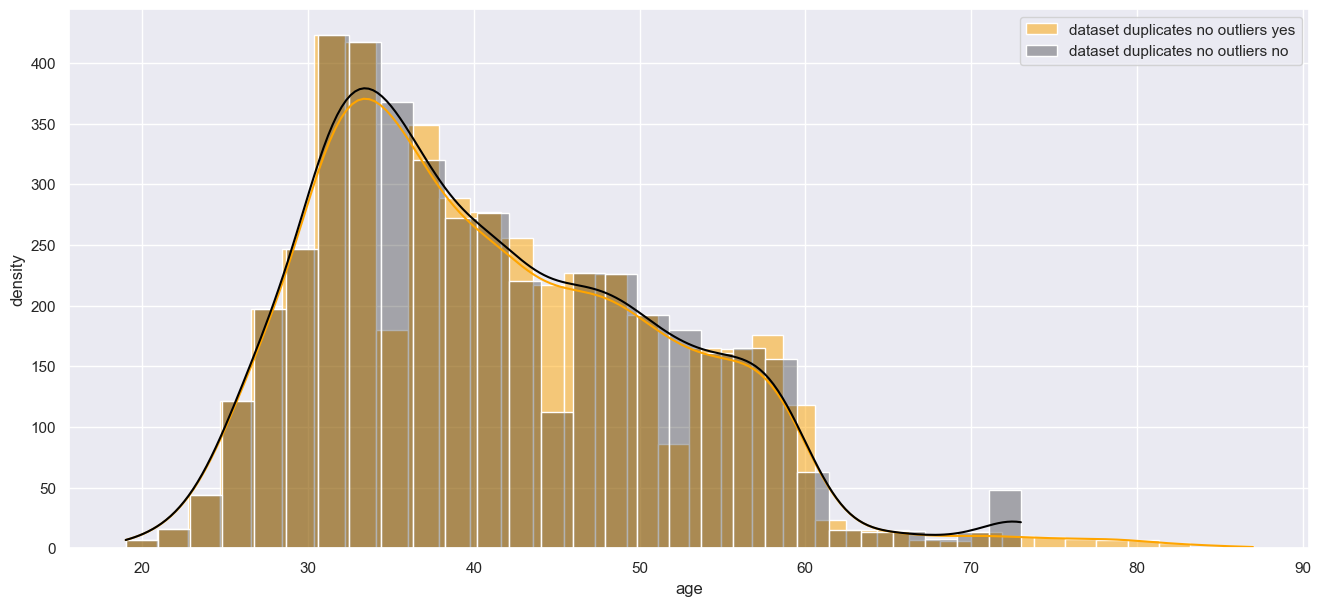

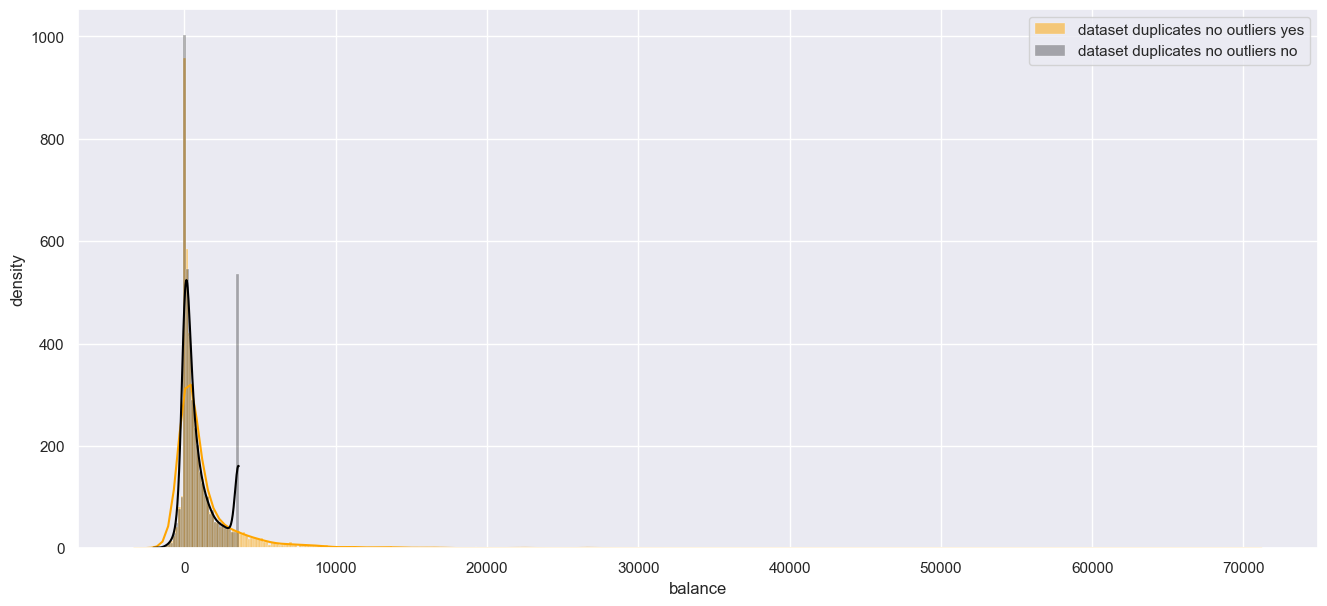

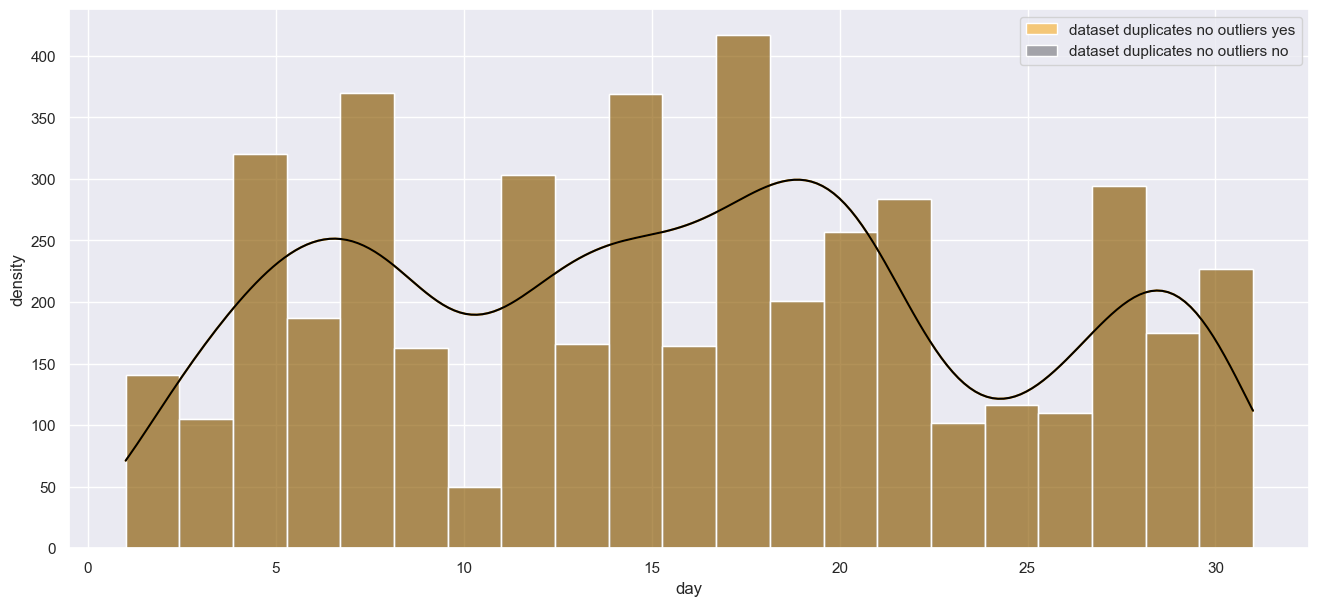

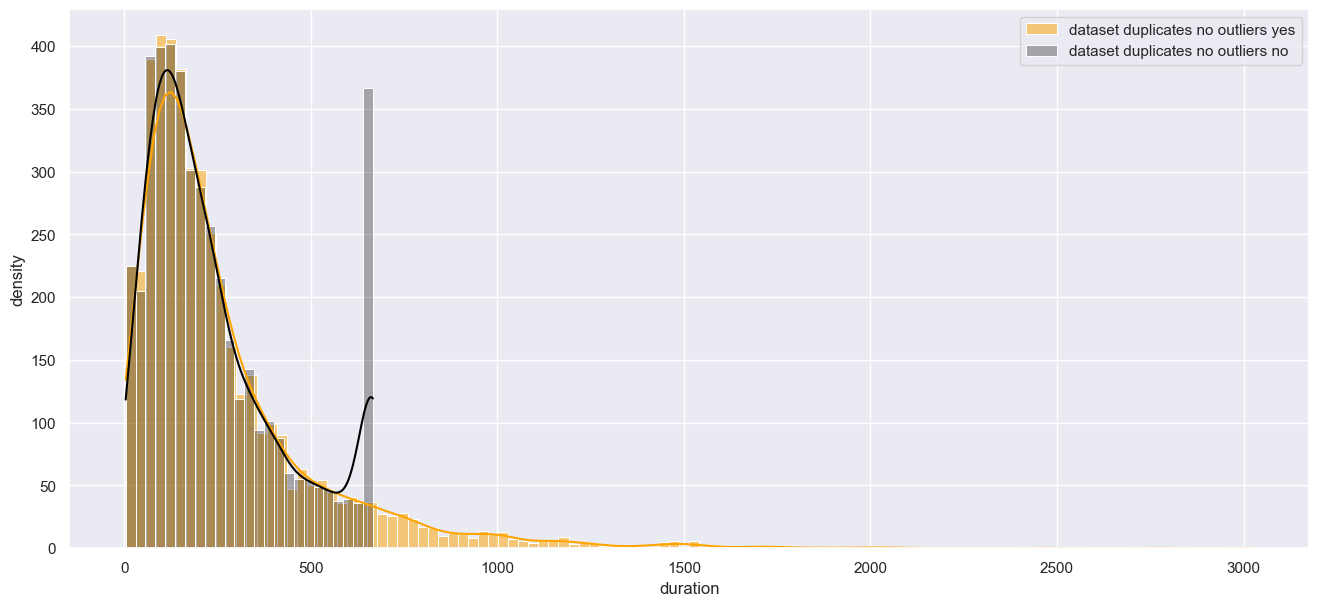

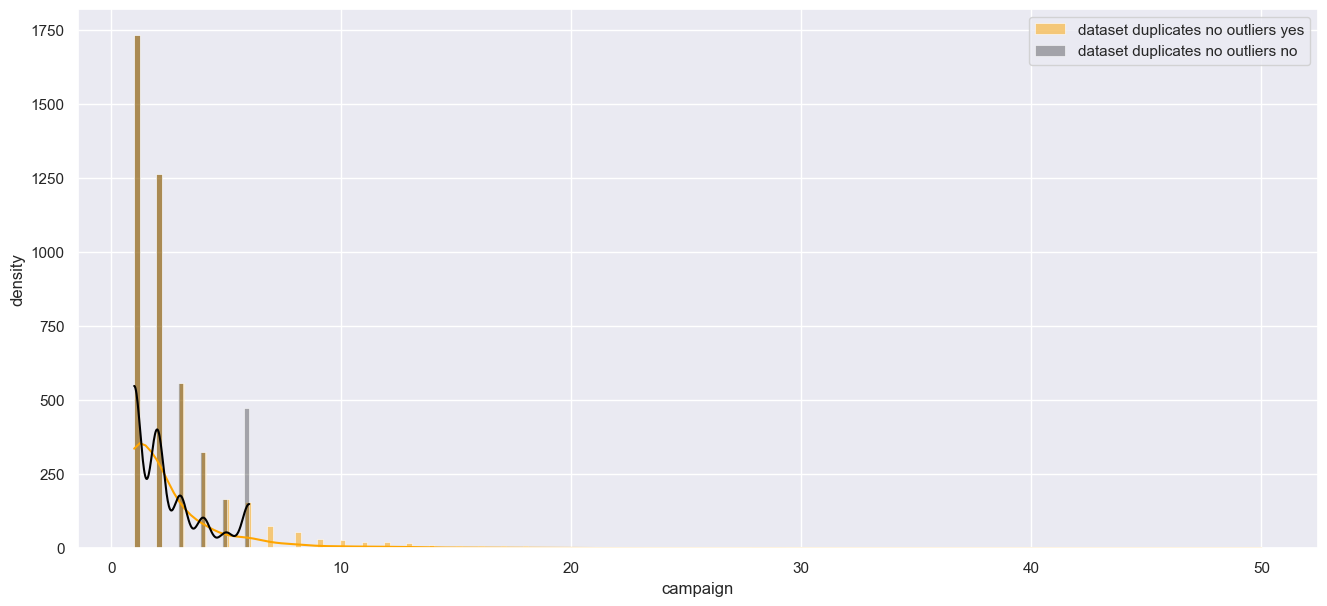

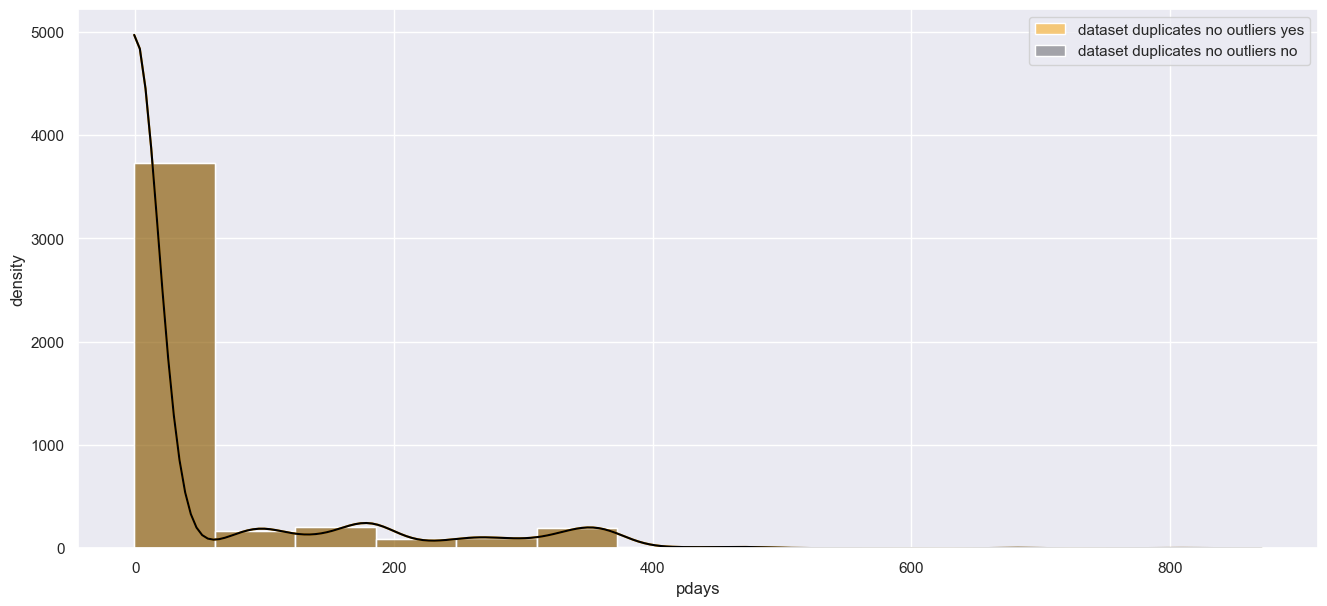

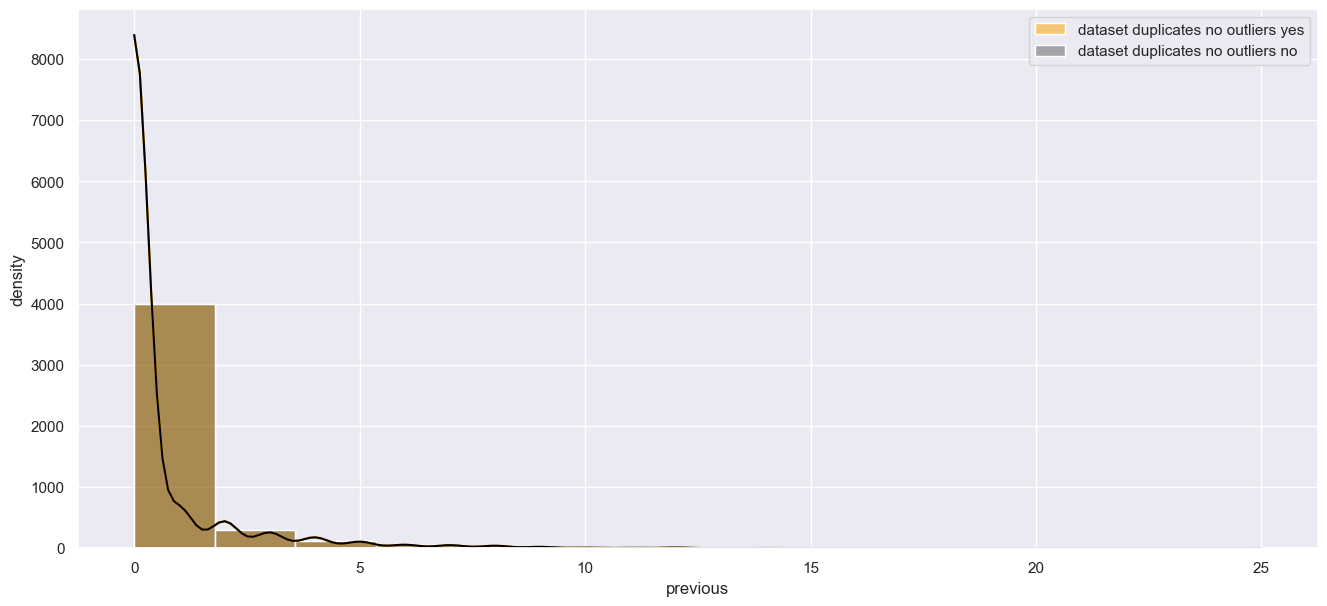

In [64]:
for i in features_numerical:
    plt.figure(figsize=(16,7))
    sns.histplot(df[i], kde=True, color="orange", alpha=0.5, label="dataset duplicates no outliers yes")
    sns.histplot(df1[i], kde=True, color="black", alpha=0.3, label="dataset duplicates no outliers no")
    plt.xlabel(i)
    plt.ylabel("density")
    plt.legend()
    plt.show()

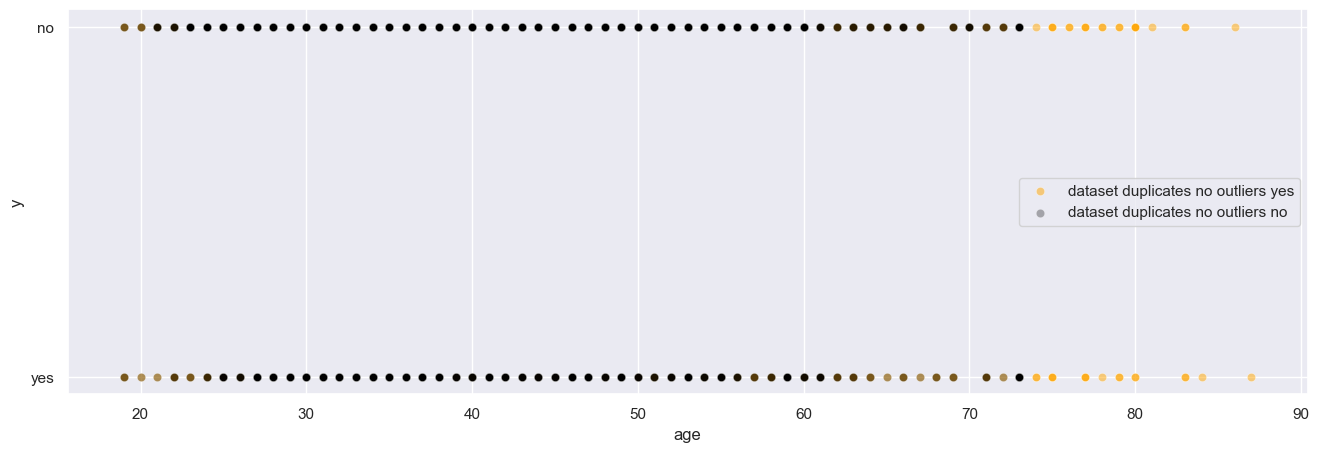

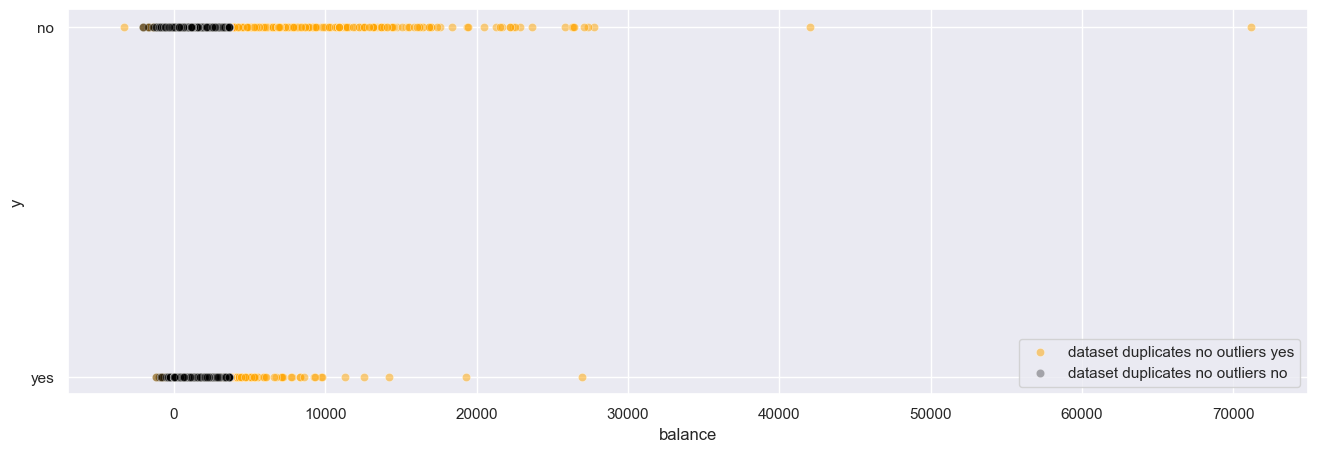

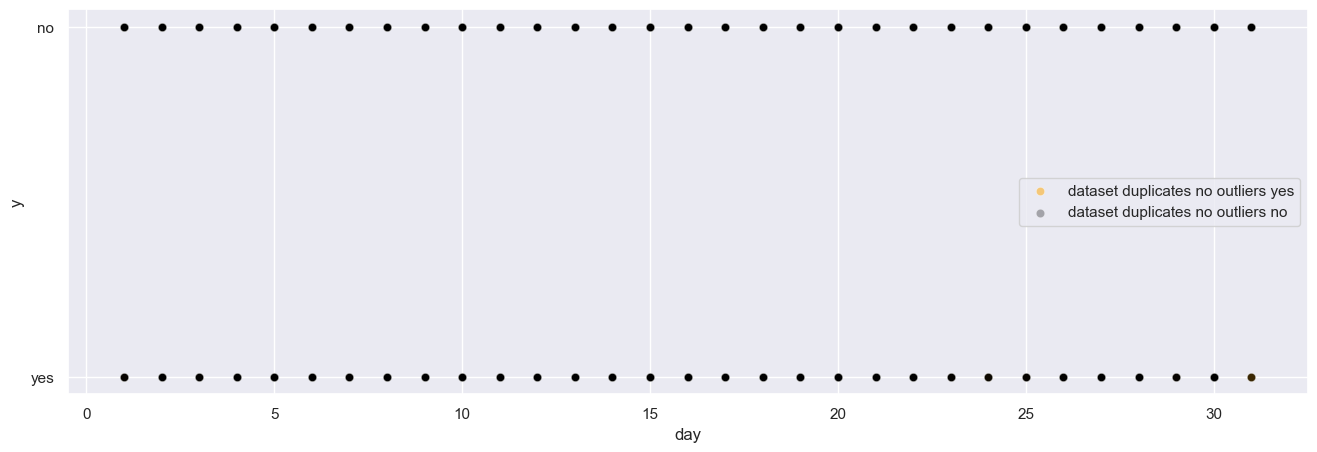

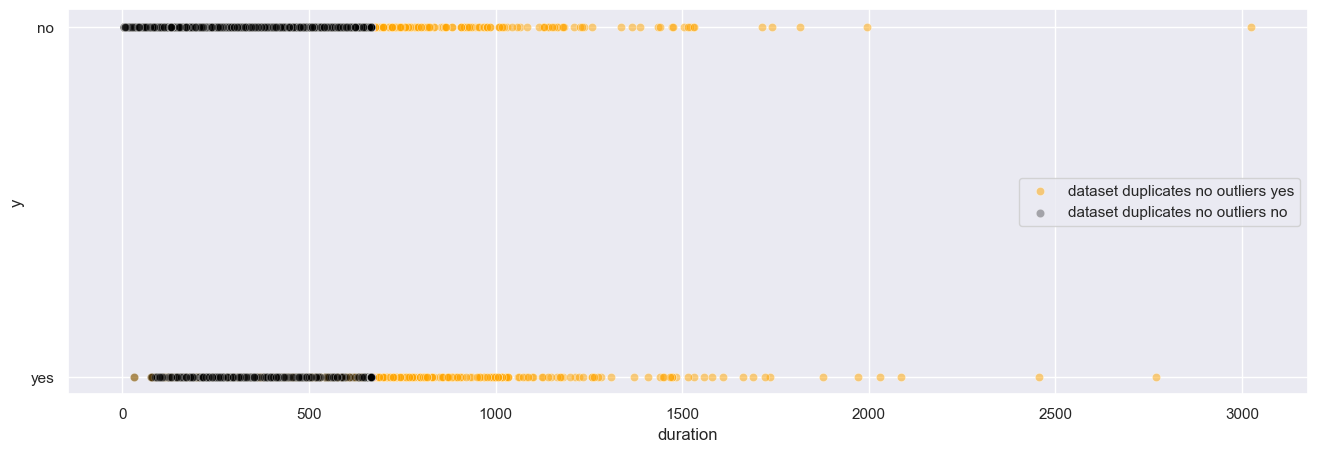

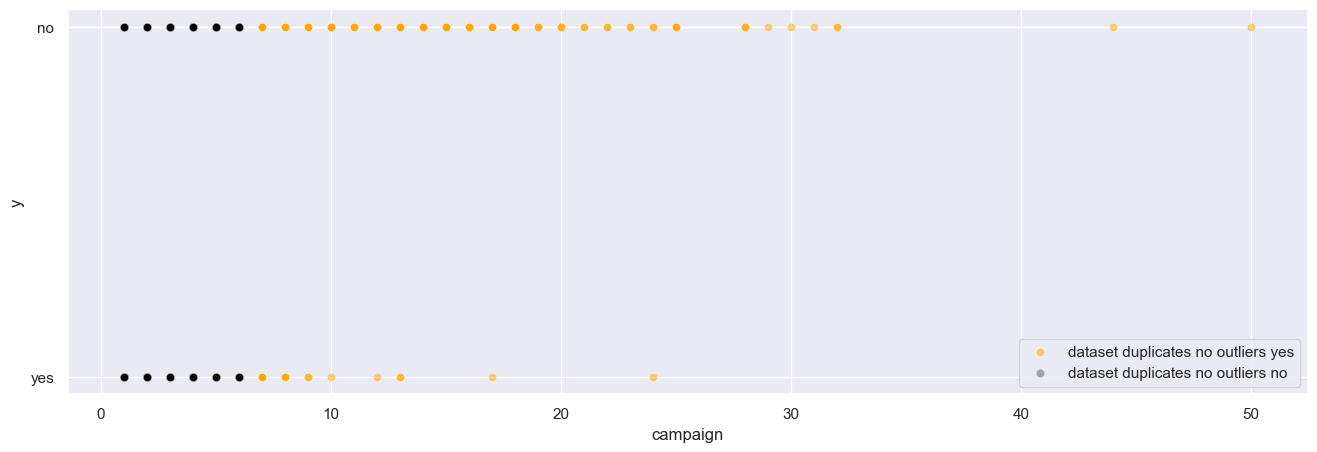

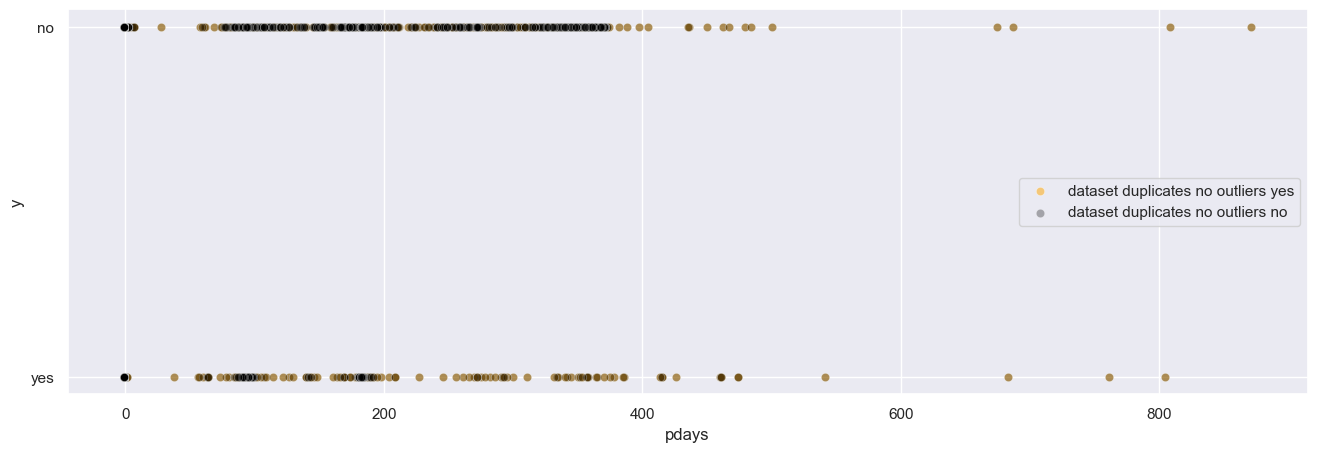

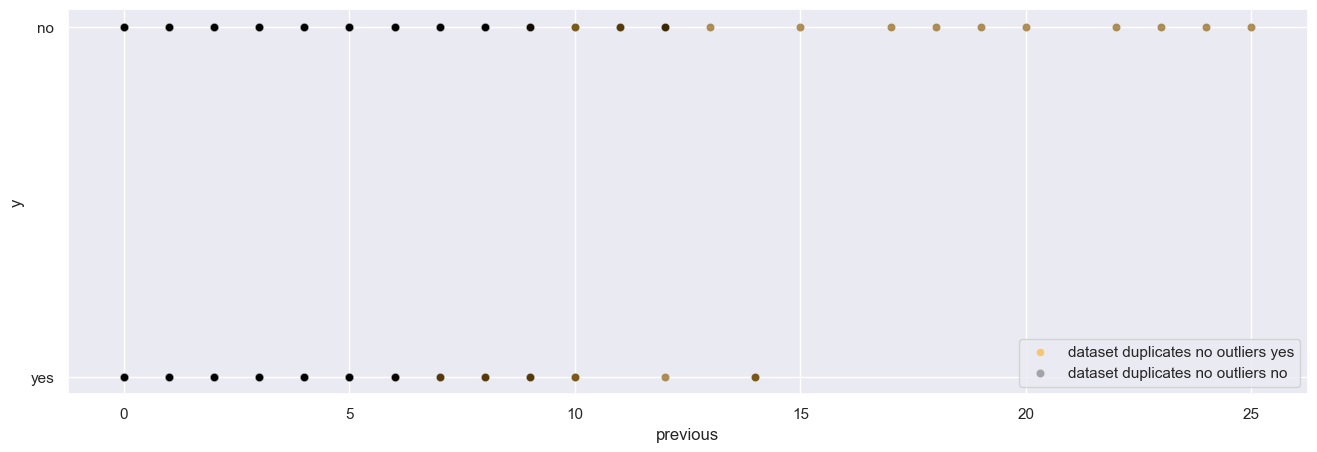

In [65]:
for i in features_numerical:
    plt.figure(figsize=(16,5))
    sns.scatterplot(x=i, y="y", color="orange", alpha=0.5, data=df, label="dataset duplicates no outliers yes")
    sns.scatterplot(x=i, y="y", color="black", alpha=0.3, data=df1, label="dataset duplicates no outliers no")
    plt.xlabel(i)
    plt.ylabel("y")
    plt.legend()
    plt.show()

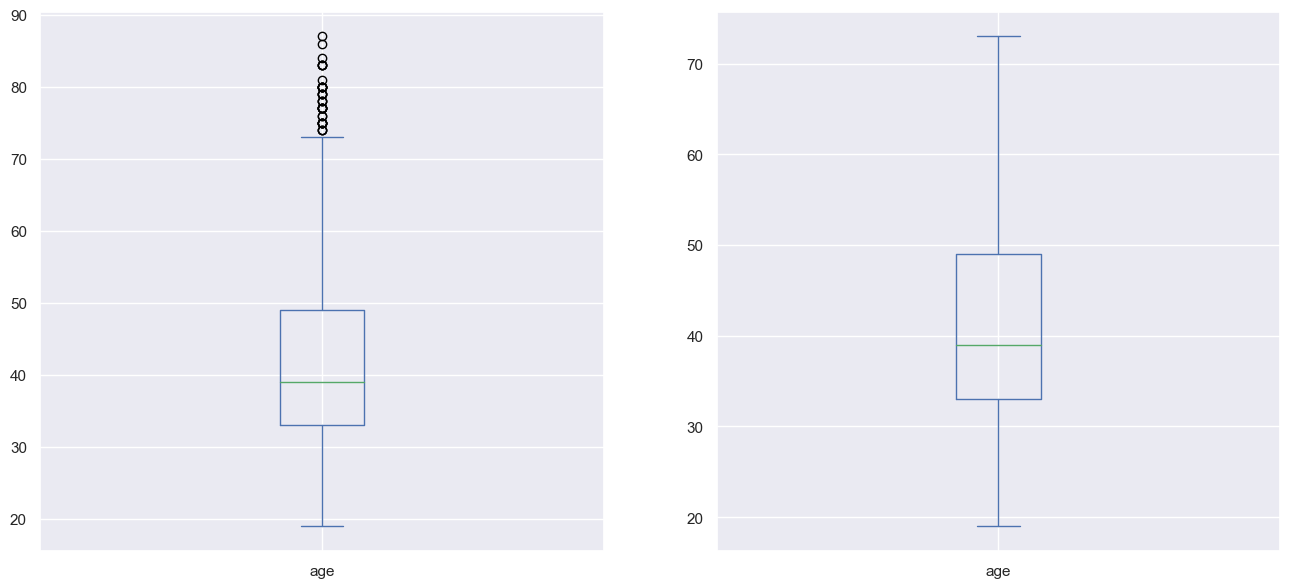

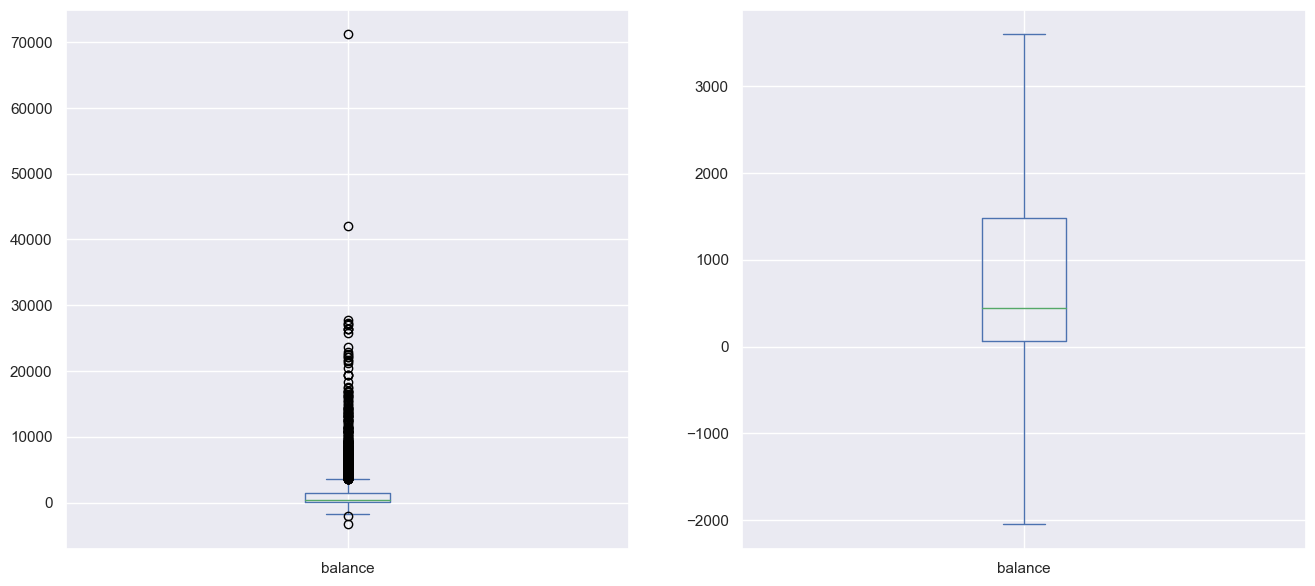

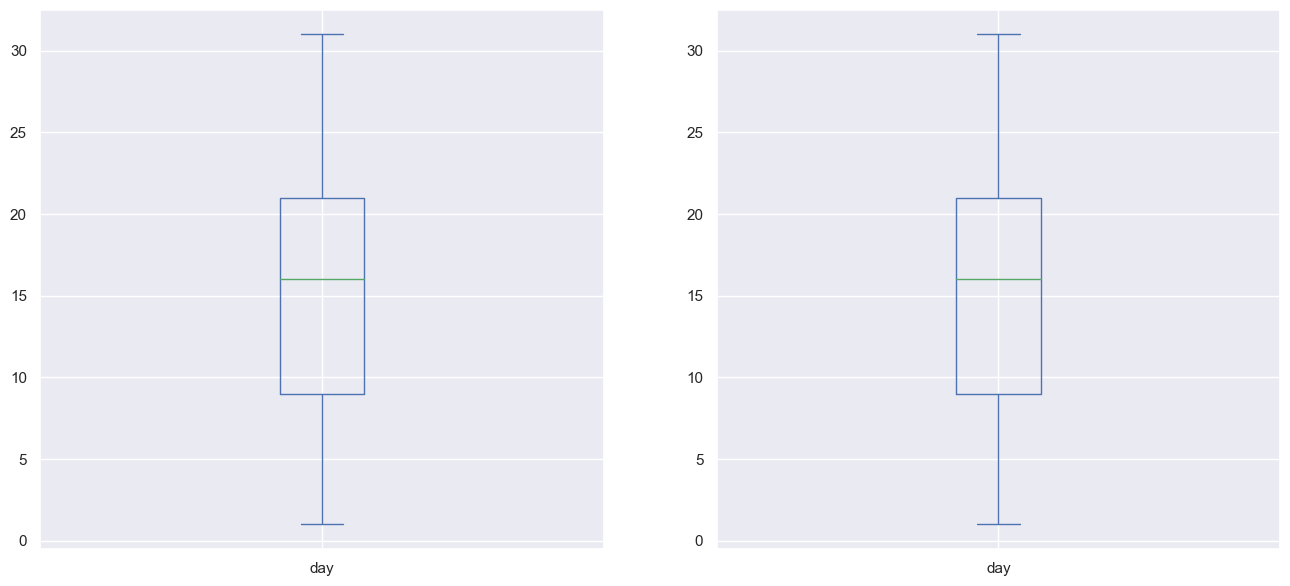

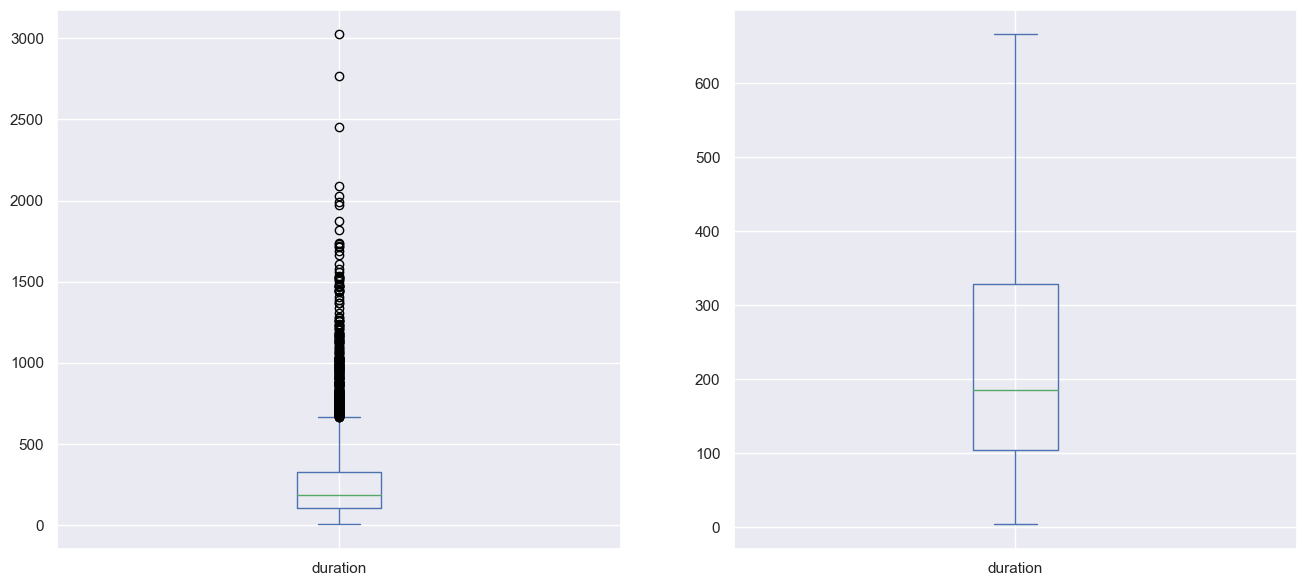

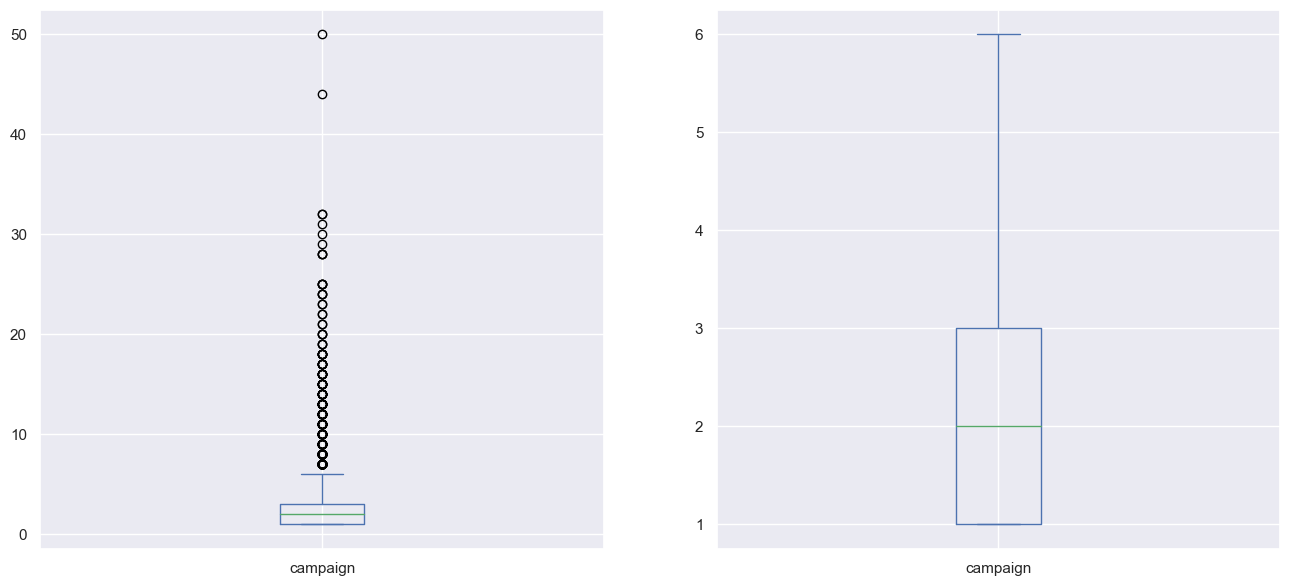

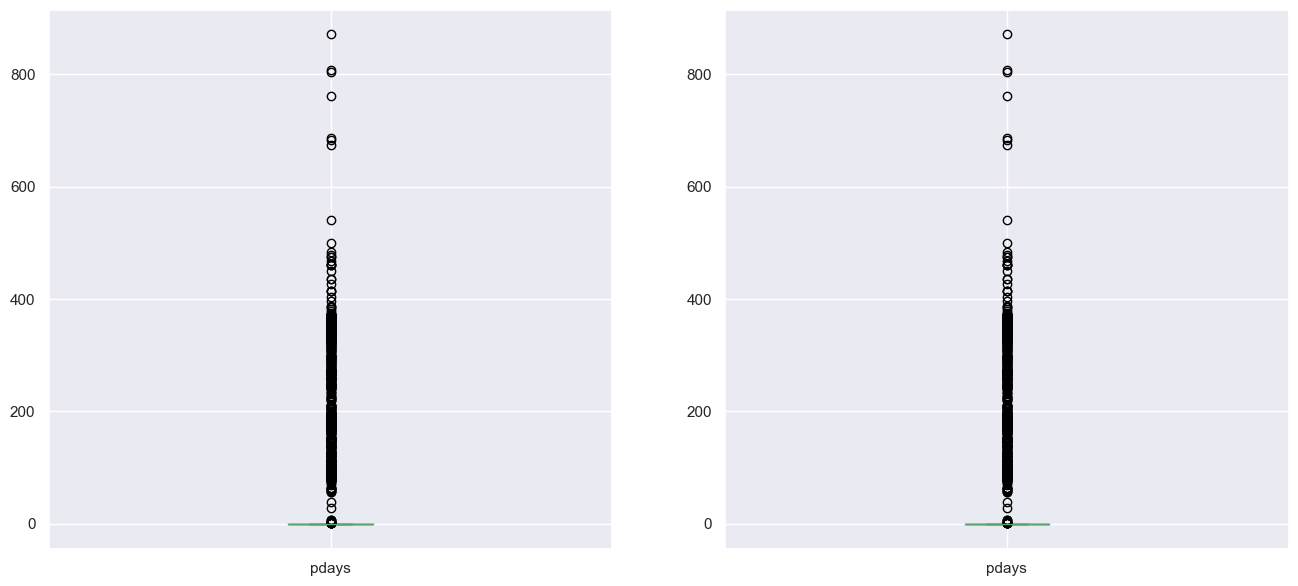

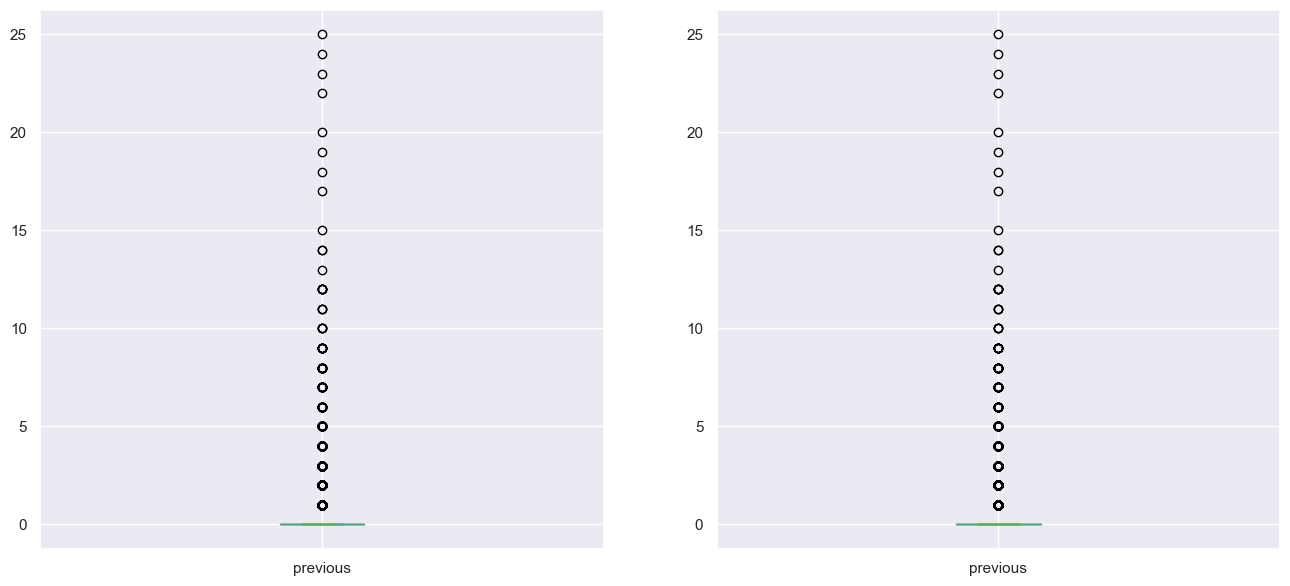

In [66]:
for i in features_numerical:
    fig, ax = plt.subplots(figsize=(16,7), ncols=2)
    df[i].plot.box(ax=ax[0])
    df1[i].plot.box(ax=ax[1])

In [67]:
df[features_numerical].skew()

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [68]:
df1[features_numerical].skew()

age         0.586569
balance     1.104876
day         0.094627
duration    1.046191
campaign    1.097153
pdays       2.717071
previous    5.875259
dtype: float64

## Missing value treatment

In [69]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Converting Categorical features into Numerical

In [70]:
df2 = df1.copy()

In [71]:
df2.head()

age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married    primary      no   1787.0      no   no   
1  33.0     services  married  secondary      no   3596.5     yes  yes   
2  35.0   management   single   tertiary      no   1350.0     yes   no   
3  30.0   management  married   tertiary      no   1476.0     yes  yes   
4  59.0  blue-collar  married  secondary      no      0.0     yes   no   

    contact   day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  19.0   oct      79.0       1.0     -1         0  unknown  no  
1  cellular  11.0   may     220.0       1.0    339         4  failure  no  
2  cellular  16.0   apr     185.0       1.0    330         1  failure  no  
3   unknown   3.0   jun     199.0       4.0     -1         0  unknown  no  
4   unknown   5.0   may     226.0       1.0     -1         0  unknown  no

In [72]:
df2['poutcome'].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [73]:
df2['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [74]:
#ordinal = education

In [75]:
df2[features_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   housing    4521 non-null   object
 5   loan       4521 non-null   object
 6   contact    4521 non-null   object
 7   month      4521 non-null   object
 8   poutcome   4521 non-null   object
 9   y          4521 non-null   object
dtypes: object(10)
memory usage: 353.3+ KB


In [76]:
df2.head()

age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married    primary      no   1787.0      no   no   
1  33.0     services  married  secondary      no   3596.5     yes  yes   
2  35.0   management   single   tertiary      no   1350.0     yes   no   
3  30.0   management  married   tertiary      no   1476.0     yes  yes   
4  59.0  blue-collar  married  secondary      no      0.0     yes   no   

    contact   day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  19.0   oct      79.0       1.0     -1         0  unknown  no  
1  cellular  11.0   may     220.0       1.0    339         4  failure  no  
2  cellular  16.0   apr     185.0       1.0    330         1  failure  no  
3   unknown   3.0   jun     199.0       4.0     -1         0  unknown  no  
4   unknown   5.0   may     226.0       1.0     -1         0  unknown  no

In [77]:
df2['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [78]:
def ordinal_encoding(education):
  if education == 'unknown':
    return 0
  if education == 'primary':
    return 1
  if education =='secondary':
    return 2
  else:
    return 3

df2['education'] = df2['education'].apply(ordinal_encoding)

In [79]:
df2.head()

age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married          1      no   1787.0      no   no   
1  33.0     services  married          2      no   3596.5     yes  yes   
2  35.0   management   single          3      no   1350.0     yes   no   
3  30.0   management  married          3      no   1476.0     yes  yes   
4  59.0  blue-collar  married          2      no      0.0     yes   no   

    contact   day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  19.0   oct      79.0       1.0     -1         0  unknown  no  
1  cellular  11.0   may     220.0       1.0    339         4  failure  no  
2  cellular  16.0   apr     185.0       1.0    330         1  failure  no  
3   unknown   3.0   jun     199.0       4.0     -1         0  unknown  no  
4   unknown   5.0   may     226.0       1.0     -1         0  unknown  no

In [80]:
df2['default'].replace({'no': 0, 'yes':1}, inplace = True)
df2['housing'].replace({'no': 0, 'yes':1}, inplace = True)
df2['loan'].replace({'no': 0, 'yes':1}, inplace = True)
df2['contact'].replace({'unknown': 0, 'telephone':1, 'cellular': 1}, inplace = True)

In [81]:
df2.head()

age          job  marital  education  default  balance  housing  loan  \
0  30.0   unemployed  married          1        0   1787.0        0     0   
1  33.0     services  married          2        0   3596.5        1     1   
2  35.0   management   single          3        0   1350.0        1     0   
3  30.0   management  married          3        0   1476.0        1     1   
4  59.0  blue-collar  married          2        0      0.0        1     0   

   contact   day month  duration  campaign  pdays  previous poutcome   y  
0        1  19.0   oct      79.0       1.0     -1         0  unknown  no  
1        1  11.0   may     220.0       1.0    339         4  failure  no  
2        1  16.0   apr     185.0       1.0    330         1  failure  no  
3        0   3.0   jun     199.0       4.0     -1         0  unknown  no  
4        0   5.0   may     226.0       1.0     -1         0  unknown  no

In [82]:
#df2['month']=df2['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,'oct':10, 'nov':11, 'dec':12})

In [83]:
df2.head()

age          job  marital  education  default  balance  housing  loan  \
0  30.0   unemployed  married          1        0   1787.0        0     0   
1  33.0     services  married          2        0   3596.5        1     1   
2  35.0   management   single          3        0   1350.0        1     0   
3  30.0   management  married          3        0   1476.0        1     1   
4  59.0  blue-collar  married          2        0      0.0        1     0   

   contact   day month  duration  campaign  pdays  previous poutcome   y  
0        1  19.0   oct      79.0       1.0     -1         0  unknown  no  
1        1  11.0   may     220.0       1.0    339         4  failure  no  
2        1  16.0   apr     185.0       1.0    330         1  failure  no  
3        0   3.0   jun     199.0       4.0     -1         0  unknown  no  
4        0   5.0   may     226.0       1.0     -1         0  unknown  no

In [84]:
df2['pdays'].value_counts()

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: count, Length: 292, dtype: int64

In [85]:
#df2['pdays'] = df2['pdays'].apply(lambda x :1 if x != -1 else 0)

In [86]:
df2.head()

age          job  marital  education  default  balance  housing  loan  \
0  30.0   unemployed  married          1        0   1787.0        0     0   
1  33.0     services  married          2        0   3596.5        1     1   
2  35.0   management   single          3        0   1350.0        1     0   
3  30.0   management  married          3        0   1476.0        1     1   
4  59.0  blue-collar  married          2        0      0.0        1     0   

   contact   day month  duration  campaign  pdays  previous poutcome   y  
0        1  19.0   oct      79.0       1.0     -1         0  unknown  no  
1        1  11.0   may     220.0       1.0    339         4  failure  no  
2        1  16.0   apr     185.0       1.0    330         1  failure  no  
3        0   3.0   jun     199.0       4.0     -1         0  unknown  no  
4        0   5.0   may     226.0       1.0     -1         0  unknown  no

In [87]:
df2['poutcome'].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [88]:
df2['poutcome'] = df2['poutcome'].apply(lambda x :1 if x == 'success' else 0)

In [89]:
df2.head()

age          job  marital  education  default  balance  housing  loan  \
0  30.0   unemployed  married          1        0   1787.0        0     0   
1  33.0     services  married          2        0   3596.5        1     1   
2  35.0   management   single          3        0   1350.0        1     0   
3  30.0   management  married          3        0   1476.0        1     1   
4  59.0  blue-collar  married          2        0      0.0        1     0   

   contact   day month  duration  campaign  pdays  previous  poutcome   y  
0        1  19.0   oct      79.0       1.0     -1         0         0  no  
1        1  11.0   may     220.0       1.0    339         4         0  no  
2        1  16.0   apr     185.0       1.0    330         1         0  no  
3        0   3.0   jun     199.0       4.0     -1         0         0  no  
4        0   5.0   may     226.0       1.0     -1         0         0  no

In [90]:
df2['poutcome'].value_counts()

poutcome
0    4392
1     129
Name: count, dtype: int64

In [91]:
df2['y'] = df2['y'].apply(lambda x :1 if x == 'yes' else 0)

In [92]:
df2.head()

age          job  marital  education  default  balance  housing  loan  \
0  30.0   unemployed  married          1        0   1787.0        0     0   
1  33.0     services  married          2        0   3596.5        1     1   
2  35.0   management   single          3        0   1350.0        1     0   
3  30.0   management  married          3        0   1476.0        1     1   
4  59.0  blue-collar  married          2        0      0.0        1     0   

   contact   day month  duration  campaign  pdays  previous  poutcome  y  
0        1  19.0   oct      79.0       1.0     -1         0         0  0  
1        1  11.0   may     220.0       1.0    339         4         0  0  
2        1  16.0   apr     185.0       1.0    330         1         0  0  
3        0   3.0   jun     199.0       4.0     -1         0         0  0  
4        0   5.0   may     226.0       1.0     -1         0         0  0

In [93]:
'''
def convert_age(age):
  if age <= 25:
    return 'struggling'
  elif age < 48:
    return 'stable'
  elif age < 57:
    return 'about_to_retire'
  elif age < 72:
    return 'old_age'
  else:
    return 'about_to_die'
'''

"\ndef convert_age(age):\n  if age <= 25:\n    return 'struggling'\n  elif age < 48:\n    return 'stable'\n  elif age < 57:\n    return 'about_to_retire'\n  elif age < 72:\n    return 'old_age'\n  else:\n    return 'about_to_die'\n"

In [94]:
#df2['age'] = df2['age'].apply(convert_age)

In [95]:
df2.head()

age          job  marital  education  default  balance  housing  loan  \
0  30.0   unemployed  married          1        0   1787.0        0     0   
1  33.0     services  married          2        0   3596.5        1     1   
2  35.0   management   single          3        0   1350.0        1     0   
3  30.0   management  married          3        0   1476.0        1     1   
4  59.0  blue-collar  married          2        0      0.0        1     0   

   contact   day month  duration  campaign  pdays  previous  poutcome  y  
0        1  19.0   oct      79.0       1.0     -1         0         0  0  
1        1  11.0   may     220.0       1.0    339         4         0  0  
2        1  16.0   apr     185.0       1.0    330         1         0  0  
3        0   3.0   jun     199.0       4.0     -1         0         0  0  
4        0   5.0   may     226.0       1.0     -1         0         0  0

In [ ]:
pd.set_option('display.max_columns', None)

df3 = pd.get_dummies(df2, drop_first=True)

In [97]:
df3.head()

age  education  default  balance  housing  loan  contact   day  duration  \
0  30.0          1        0   1787.0        0     0        1  19.0      79.0   
1  33.0          2        0   3596.5        1     1        1  11.0     220.0   
2  35.0          3        0   1350.0        1     0        1  16.0     185.0   
3  30.0          3        0   1476.0        1     1        0   3.0     199.0   
4  59.0          2        0      0.0        1     0        0   5.0     226.0   

   campaign  pdays  previous  poutcome  y  job_blue-collar  job_entrepreneur  \
0       1.0     -1         0         0  0            False             False   
1       1.0    339         4         0  0            False             False   
2       1.0    330         1         0  0            False             False   
3       4.0     -1         0         0  0            False             False   
4       1.0     -1         0         0  0             True             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False           False        False              False   
1          False           False        False              False   
2          False            True        False              False   
3          False            True        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0         False        False           False            True        False   
1          True        False           False           False        False   
2         False        False           False           False        False   
3         False        False           False           False        False   
4         False        False           False           False        False   

   marital_married  marital_single  month_aug  month_dec  month_feb  \
0             True           False      False      False      False   
1             True           False      False      False      False   
2            False            True      False      False      False   
3             True           False      False      False      False   
4             True           False      False      False      False   

   month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0      False      False      False      False      False      False   
1      False      False      False      False       True      False   
2      False      False      False      False      False      False   
3      False      False       True      False      False      False   
4      False      False      False      False       True      False   

   month_oct  month_sep  
0       True      False  
1      False      False  
2      False      False  
3      False      False  
4      False      False

In [98]:
df3.replace({False: 0, True: 1}, inplace=True)

In [99]:
df3

age  education  default  balance  housing  loan  contact   day  \
0     30.0          1        0   1787.0        0     0        1  19.0   
1     33.0          2        0   3596.5        1     1        1  11.0   
2     35.0          3        0   1350.0        1     0        1  16.0   
3     30.0          3        0   1476.0        1     1        0   3.0   
4     59.0          2        0      0.0        1     0        0   5.0   
...    ...        ...      ...      ...      ...   ...      ...   ...   
4516  33.0          2        0   -333.0        1     0        1  30.0   
4517  57.0          3        1  -2047.5        1     1        0   9.0   
4518  57.0          2        0    295.0        0     0        1  19.0   
4519  28.0          2        0   1137.0        0     0        1   6.0   
4520  44.0          3        0   1136.0        1     1        1   3.0   

      duration  campaign  pdays  previous  poutcome  y  job_blue-collar  \
0         79.0       1.0     -1         0         0  0                0   
1        220.0       1.0    339         4         0  0                0   
2        185.0       1.0    330         1         0  0                0   
3        199.0       4.0     -1         0         0  0                0   
4        226.0       1.0     -1         0         0  0                1   
...        ...       ...    ...       ...       ... ..              ...   
4516     329.0       5.0     -1         0         0  0                0   
4517     153.0       1.0     -1         0         0  0                0   
4518     151.0       6.0     -1         0         0  0                0   
4519     129.0       4.0    211         3         0  0                1   
4520     345.0       2.0    249         7         0  0                0   

      job_entrepreneur  job_housemaid  job_management  job_retired  \
0                    0              0               0            0   
1                    0              0               0            0   
2                    0              0               1            0   
3                    0              0               1            0   
4                    0              0               0            0   
...                ...            ...             ...          ...   
4516                 0              0               0            0   
4517                 0              0               0            0   
4518                 0              0               0            0   
4519                 0              0               0            0   
4520                 1              0               0            0   

      job_self-employed  job_services  job_student  job_technician  \
0                     0             0            0               0   
1                     0             1            0               0   
2                     0             0            0               0   
3                     0             0            0               0   
4                     0             0            0               0   
...                 ...           ...          ...             ...   
4516                  0             1            0               0   
4517                  1             0            0               0   
4518                  0             0            0               1   
4519                  0             0            0               0   
4520                  0             0            0               0   

      job_unemployed  job_unknown  marital_married  marital_single  month_aug  \
0                  1            0                1               0          0   
1                  0            0                1               0          0   
2                  0            0                0               1          0   
3                  0            0                1               0          0   
4                  0            0                1               0          0   
...              ...          ...              ...           

In [100]:
df3.dtypes

age                  float64
education              int64
default                int64
balance              float64
housing                int64
loan                   int64
contact                int64
day                  float64
duration             float64
campaign             float64
pdays                  int64
previous               int64
poutcome               int64
y                      int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
marital_married        int64
marital_single         int64
month_aug              int64
month_dec              int64
month_feb              int64
month_jan              int64
month_jul              int64
month_jun              int64
month_mar              int64
month_may     

## Applying algorithms using Normal Approach

In [101]:
X = df3.drop('y', axis=1)
y = df3['y']

In [102]:
X.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [103]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [104]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X = scaler1.fit_transform(X)

In [105]:
X = pd.DataFrame(X, columns=['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'])
X

age  education   default   balance   housing      loan   contact  \
0    -1.067914  -1.365123 -0.130759  0.655937 -1.142051 -0.424756  0.643536   
1    -0.779891  -0.084417 -0.130759  2.114953  0.875617  2.354292  0.643536   
2    -0.587875   1.196289 -0.130759  0.303580  0.875617 -0.424756  0.643536   
3    -1.067914   1.196289 -0.130759  0.405175  0.875617  2.354292 -1.553915   
4     1.716312  -0.084417 -0.130759 -0.784937  0.875617 -0.424756 -1.553915   
...        ...        ...       ...       ...       ...       ...       ...   
4516 -0.779891  -0.084417 -0.130759 -1.053438  0.875617 -0.424756  0.643536   
4517  1.524296   1.196289  7.647669 -2.435854  0.875617  2.354292 -1.553915   
4518  1.524296  -0.084417 -0.130759 -0.547076 -1.142051 -0.424756  0.643536   
4519 -1.259930  -0.084417 -0.130759  0.131837 -1.142051 -0.424756  0.643536   
4520  0.276195   1.196289 -0.130759  0.131030  0.875617  2.354292  0.643536   

           day  duration  campaign     pdays  previous  poutcome  \
0     0.374052 -0.878134 -0.871205 -0.407218 -0.320413 -0.171381   
1    -0.596026 -0.117521 -0.871205  2.989044  2.041734 -0.171381   
2     0.010273 -0.306326 -0.871205  2.899143  0.270124 -0.171381   
3    -1.566105 -0.230804  0.978537 -0.407218 -0.320413 -0.171381   
4    -1.323585 -0.085154 -0.871205 -0.407218 -0.320413 -0.171381   
...        ...       ...       ...       ...       ...       ...   
4516  1.707910  0.470470  1.595117 -0.407218 -0.320413 -0.171381   
4517 -0.838546 -0.478947 -0.871205 -0.407218 -0.320413 -0.171381   
4518  0.374052 -0.489736  2.211698 -0.407218 -0.320413 -0.171381   
4519 -1.202326 -0.608413  0.978537  1.710451  1.451197 -0.171381   
4520 -1.566105  0.556781 -0.254624  2.090033  3.813344 -0.171381   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0           -0.514408         -0.196454      -0.159382       -0.522306   
1           -0.514408         -0.196454      -0.159382       -0.522306   
2           -0.514408         -0.196454      -0.159382        1.914585   
3           -0.514408         -0.196454      -0.159382        1.914585   
4            1.943983         -0.196454      -0.159382       -0.522306   
...               ...               ...            ...             ...   
4516        -0.514408         -0.196454      -0.159382       -0.522306   
4517        -0.514408         -0.196454      -0.159382       -0.522306   
4518        -0.514408         -0.196454      -0.159382       -0.522306   
4519         1.943983         -0.196454      -0.159382       -0.522306   
4520        -0.514408          5.090257      -0.159382       -0.522306   

      job_retired  job_self-employed  job_services  job_student  \
0       -0.231518          -0.205391     -0.318760    -0.137593   
1       -0.231518          -0.205391      3.137153    -0.137593   
2       -0.231518          -0.205391     -0.318760    -0.137593   
3       -0.231518          -0.205391     -0.318760    -0.137593   
4       -0.231518          -0.205391     -0.318760    -0.137593   
...           ...                ...           ...          ...   
4516    -0.231518          -0.205391      3.137153    -0.137593   
4517    -0.231518           4.868770     -0.318760    -0.137593   
4518    -0.231518          -0.205391     -0.318760    -0.137593   
4519    -0.231518          -0.205391     -0.318760    -0.137593   
4520    -0.231518          -0.205391     -0.318760    -0.137593   

      job_technician  job_unemployed  job_unknown  marital_married  \
0          -0.452367        5.858354    -0.092068         0.785095   
1          -0.452367       -0.170696    -0.092068         0.785095   
2          -0.452367       -0.170696    -0.092068        -1.273731   
3          -0.452367       -0.170696    -0.092068         0.785095   
4          -0.452367       -0.170696    -0.092068         0.785095   
...              ...             ...          ...              ...   
4516       -0.452367       -0.170696    -0.092068         0.7

In [106]:
X.corrwith(y).sort_values(ascending=False)

duration             0.393818
poutcome             0.283481
month_oct            0.145964
contact              0.139399
previous             0.116714
pdays                0.104087
month_mar            0.102716
job_retired          0.086675
balance              0.073072
month_sep            0.071510
month_dec            0.069884
education            0.050265
job_student          0.047809
marital_single       0.045815
age                  0.041021
month_feb            0.039805
job_management       0.032634
job_unknown          0.019886
month_aug            0.012084
job_housemaid        0.004872
default              0.001303
job_self-employed   -0.003827
month_jan           -0.004109
job_unemployed      -0.007312
job_technician      -0.010154
day                 -0.011244
month_jun           -0.013323
month_nov           -0.014397
job_entrepreneur    -0.015968
job_services        -0.024071
month_jul           -0.038851
campaign            -0.063705
marital_married     -0.064643
job_blue-c

## Trying different algorithms normal way with Hyperparameter Tuning

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [108]:
X_train.shape

(3390, 37)

In [109]:
y_train.shape

(3390,)

In [110]:
X_test.shape

(1131, 37)

In [111]:
y_test.shape

(1131,)

### KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [113]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

para = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid1 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=para, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid1.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [114]:
grid1.best_score_ * 100

88.92822025565388

In [115]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of KNN:",accuracy_score(y_test, y_pred1) * 100)

Accuracy Score of KNN: 88.94783377541998


In [116]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [117]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')

In [118]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1001
           1       0.56      0.19      0.29       130

    accuracy                           0.89      1131
   macro avg       0.73      0.59      0.61      1131
weighted avg       0.86      0.89      0.86      1131



In [119]:
confusion_matrix(y_test, y_pred1)

array([[981,  20],
       [105,  25]], dtype=int64)

In [120]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [121]:
y_prob1 = model1.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

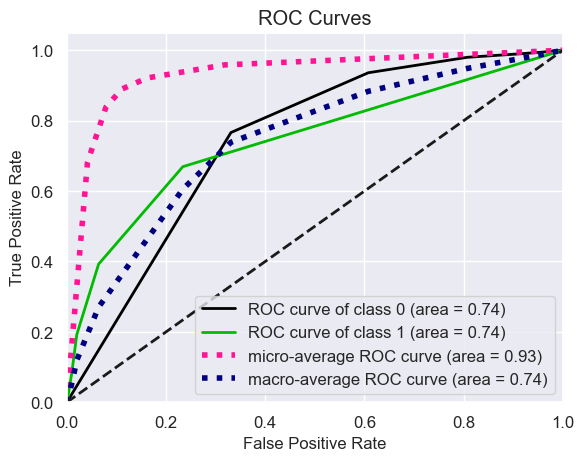

In [122]:
skplt.metrics.plot_roc(y_test, y_prob1)

### Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [124]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [125]:
params = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid2 = GridSearchCV(estimator=LogisticRegression(), param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

In [126]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [127]:
grid2.best_estimator_

LogisticRegression(C=0.01, solver='liblinear')

In [128]:
grid2.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [129]:
grid2.best_score_ * 100

89.85250737463127

In [130]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression:",accuracy_score(y_test, y_pred2) * 100)

Accuracy Score of Logistic Regression: 89.47833775419983


In [131]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1001
           1       0.56      0.37      0.45       130

    accuracy                           0.89      1131
   macro avg       0.74      0.67      0.69      1131
weighted avg       0.88      0.89      0.88      1131



In [132]:
confusion_matrix(y_test, y_pred2)

array([[964,  37],
       [ 82,  48]], dtype=int64)

In [133]:
y_prob2 = model2.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

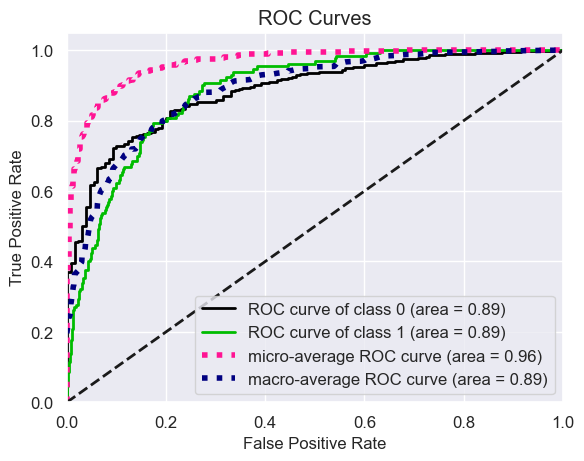

In [134]:
skplt.metrics.plot_roc(y_test, y_prob2)

### Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)

model3.score(X_test, y_test) * 100

86.5605658709107

In [136]:
model3.feature_importances_

array([0.10841597, 0.02534237, 0.00192962, 0.10694564, 0.02284471,
       0.00481417, 0.01962172, 0.09026201, 0.25196716, 0.03628076,
       0.01788292, 0.02493918, 0.09354594, 0.00824566, 0.00622521,
       0.00372501, 0.01176108, 0.00888819, 0.0002739 , 0.00743408,
       0.        , 0.01961054, 0.00511307, 0.00131246, 0.01846023,
       0.01445495, 0.00728165, 0.        , 0.00547383, 0.01053072,
       0.00192733, 0.016686  , 0.00905184, 0.00824401, 0.01344181,
       0.01539463, 0.00167164])

In [137]:
y_pred3 = model3.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1001
           1       0.42      0.47      0.45       130

    accuracy                           0.87      1131
   macro avg       0.68      0.69      0.68      1131
weighted avg       0.87      0.87      0.87      1131



In [139]:
confusion_matrix(y_test, y_pred3)

array([[918,  83],
       [ 69,  61]], dtype=int64)

In [140]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [141]:
y_prob3 = model3.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

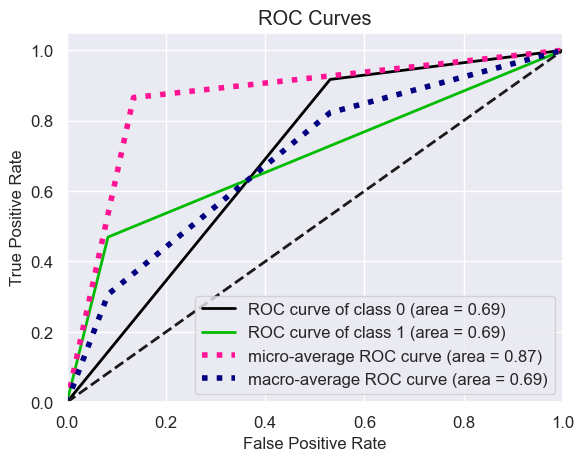

In [142]:
skplt.metrics.plot_roc(y_test, y_prob3)

### Random Forest

In [143]:
criterions = ['gini','entropy']
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

params = dict(n_estimators=n_estimators, max_features=max_features, criterion=criterions)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [145]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid4 = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=cv, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
grid4.fit(X_train, y_train)

Fitting 30 folds for each of 12 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=3)

In [146]:
grid4.best_estimator_

RandomForestClassifier(n_estimators=1000)

In [147]:
grid4.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}

In [148]:
grid4.best_score_ * 100

90.0589970501475

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
r_model4 = RandomizedSearchCV(RandomForestClassifier(), params, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, random_state=5)

In [151]:
r_model4.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 100, 1000]},
                   random_state=5, scoring='accuracy', verbose=3)

In [152]:
r_model4.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [153]:
r_model4.best_params_

{'n_estimators': 1000, 'max_features': 'sqrt', 'criterion': 'entropy'}

In [154]:
r_model4.best_score_ * 100

90.11799410029498

In [155]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=1000,
    criterion='gini',
    max_features='sqrt',
    n_jobs=-1)

model4.fit(X_train, y_train)

model4.score(X_test, y_test) * 100

90.27409372236959

In [156]:
y_pred4 = model4.predict(X_test)

In [157]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1001
           1       0.64      0.36      0.46       130

    accuracy                           0.90      1131
   macro avg       0.78      0.67      0.70      1131
weighted avg       0.89      0.90      0.89      1131



In [158]:
confusion_matrix(y_test, y_pred4)

array([[974,  27],
       [ 83,  47]], dtype=int64)

In [159]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [160]:
y_prob4 = model4.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

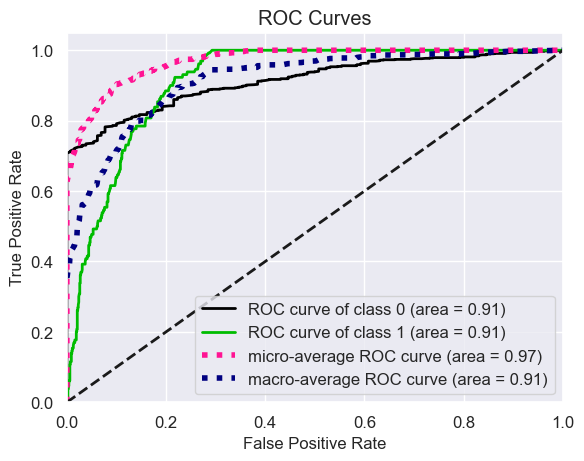

In [161]:
skplt.metrics.plot_roc(y_test, y_prob4)

### SVM

In [162]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [163]:
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

p = dict(kernel=kernel, C=C, gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid5 = GridSearchCV(estimator=SVC(), param_grid=p, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid5.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [164]:
grid5.best_score_ * 100

89.28220255653885

In [165]:
grid5.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [166]:
from sklearn.svm import SVC

model5 = SVC(kernel='sigmoid', C=0.1, gamma='scale', probability=True)
model5.fit(X_train, y_train)

model5.score(X_test, y_test) * 100

88.85941644562334

In [167]:
y_pred5 = model5.predict(X_test)

In [168]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1001
           1       0.55      0.16      0.25       130

    accuracy                           0.89      1131
   macro avg       0.73      0.57      0.59      1131
weighted avg       0.86      0.89      0.86      1131



In [169]:
confusion_matrix(y_test, y_pred5)

array([[984,  17],
       [109,  21]], dtype=int64)

In [170]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [171]:
y_prob5 = model5.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

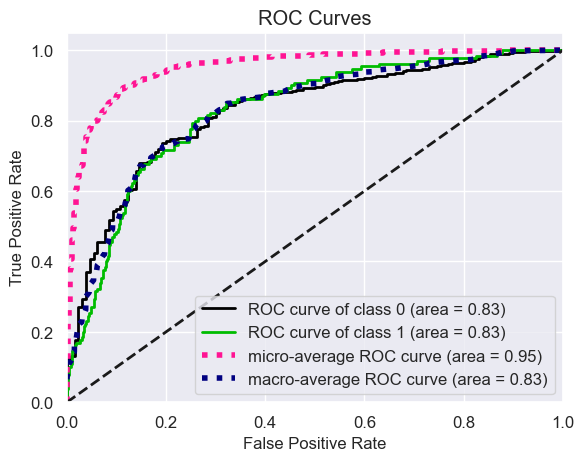

In [172]:
skplt.metrics.plot_roc(y_test, y_prob5)

### Naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
params_NB = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

grid6 = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB, cv=cv_method, verbose=3, scoring='accuracy', n_jobs=-1)
Data_transformed = PowerTransformer().fit_transform(X_test)
grid6.fit(Data_transformed, y_test)

Fitting 15 folds for each of 14 candidates, totalling 210 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='accuracy', verbose=3)

In [174]:
grid6.best_score_ * 100

82.1978350421686

In [175]:
from sklearn.naive_bayes import GaussianNB

model6 = GaussianNB()
model6.fit(X_train, y_train)

model6.score(X_test, y_test) * 100

85.0574712643678

In [176]:
y_pred6 = model6.predict(X_test)

In [177]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1001
           1       0.37      0.42      0.39       130

    accuracy                           0.85      1131
   macro avg       0.65      0.66      0.65      1131
weighted avg       0.86      0.85      0.85      1131



In [178]:
confusion_matrix(y_test, y_pred6)

array([[908,  93],
       [ 76,  54]], dtype=int64)

In [179]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [180]:
y_prob6 = model6.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

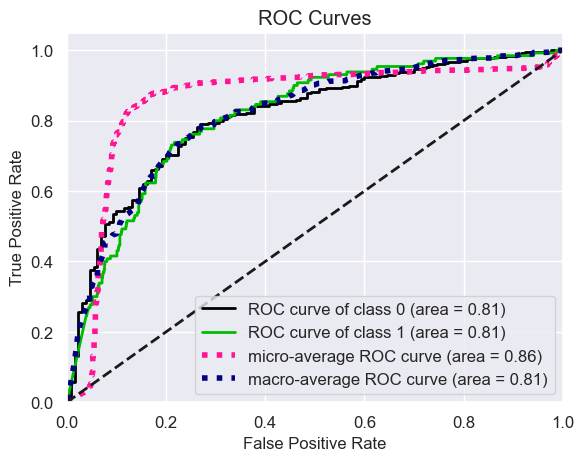

In [181]:
skplt.metrics.plot_roc(y_test, y_prob6)

## Oversampling using SMOTETomek

In [182]:
X12 = X.copy()

In [183]:
X12

age  education   default   balance   housing      loan   contact  \
0    -1.067914  -1.365123 -0.130759  0.655937 -1.142051 -0.424756  0.643536   
1    -0.779891  -0.084417 -0.130759  2.114953  0.875617  2.354292  0.643536   
2    -0.587875   1.196289 -0.130759  0.303580  0.875617 -0.424756  0.643536   
3    -1.067914   1.196289 -0.130759  0.405175  0.875617  2.354292 -1.553915   
4     1.716312  -0.084417 -0.130759 -0.784937  0.875617 -0.424756 -1.553915   
...        ...        ...       ...       ...       ...       ...       ...   
4516 -0.779891  -0.084417 -0.130759 -1.053438  0.875617 -0.424756  0.643536   
4517  1.524296   1.196289  7.647669 -2.435854  0.875617  2.354292 -1.553915   
4518  1.524296  -0.084417 -0.130759 -0.547076 -1.142051 -0.424756  0.643536   
4519 -1.259930  -0.084417 -0.130759  0.131837 -1.142051 -0.424756  0.643536   
4520  0.276195   1.196289 -0.130759  0.131030  0.875617  2.354292  0.643536   

           day  duration  campaign     pdays  previous  poutcome  \
0     0.374052 -0.878134 -0.871205 -0.407218 -0.320413 -0.171381   
1    -0.596026 -0.117521 -0.871205  2.989044  2.041734 -0.171381   
2     0.010273 -0.306326 -0.871205  2.899143  0.270124 -0.171381   
3    -1.566105 -0.230804  0.978537 -0.407218 -0.320413 -0.171381   
4    -1.323585 -0.085154 -0.871205 -0.407218 -0.320413 -0.171381   
...        ...       ...       ...       ...       ...       ...   
4516  1.707910  0.470470  1.595117 -0.407218 -0.320413 -0.171381   
4517 -0.838546 -0.478947 -0.871205 -0.407218 -0.320413 -0.171381   
4518  0.374052 -0.489736  2.211698 -0.407218 -0.320413 -0.171381   
4519 -1.202326 -0.608413  0.978537  1.710451  1.451197 -0.171381   
4520 -1.566105  0.556781 -0.254624  2.090033  3.813344 -0.171381   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0           -0.514408         -0.196454      -0.159382       -0.522306   
1           -0.514408         -0.196454      -0.159382       -0.522306   
2           -0.514408         -0.196454      -0.159382        1.914585   
3           -0.514408         -0.196454      -0.159382        1.914585   
4            1.943983         -0.196454      -0.159382       -0.522306   
...               ...               ...            ...             ...   
4516        -0.514408         -0.196454      -0.159382       -0.522306   
4517        -0.514408         -0.196454      -0.159382       -0.522306   
4518        -0.514408         -0.196454      -0.159382       -0.522306   
4519         1.943983         -0.196454      -0.159382       -0.522306   
4520        -0.514408          5.090257      -0.159382       -0.522306   

      job_retired  job_self-employed  job_services  job_student  \
0       -0.231518          -0.205391     -0.318760    -0.137593   
1       -0.231518          -0.205391      3.137153    -0.137593   
2       -0.231518          -0.205391     -0.318760    -0.137593   
3       -0.231518          -0.205391     -0.318760    -0.137593   
4       -0.231518          -0.205391     -0.318760    -0.137593   
...           ...                ...           ...          ...   
4516    -0.231518          -0.205391      3.137153    -0.137593   
4517    -0.231518           4.868770     -0.318760    -0.137593   
4518    -0.231518          -0.205391     -0.318760    -0.137593   
4519    -0.231518          -0.205391     -0.318760    -0.137593   
4520    -0.231518          -0.205391     -0.318760    -0.137593   

      job_technician  job_unemployed  job_unknown  marital_married  \
0          -0.452367        5.858354    -0.092068         0.785095   
1          -0.452367       -0.170696    -0.092068         0.785095   
2          -0.452367       -0.170696    -0.092068        -1.273731   
3          -0.452367       -0.170696    -0.092068         0.785095   
4          -0.452367       -0.170696    -0.092068         0.785095   
...              ...             ...          ...              ...   
4516       -0.452367       -0.170696    -0.092068         0.7

In [184]:
X12.mean()

age                  3.221881e-17
education            1.430201e-16
default              2.750387e-18
balance              7.701083e-17
housing              1.434130e-16
loan                 5.972268e-17
contact             -2.671804e-17
day                  2.357474e-18
duration            -5.107861e-17
campaign             8.644072e-17
pdays               -3.889832e-17
previous             3.929124e-18
poutcome             1.571649e-18
job_blue-collar     -3.693376e-17
job_entrepreneur     4.086289e-17
job_housemaid        4.400619e-17
job_management      -1.964562e-17
job_retired         -1.571649e-17
job_self-employed    1.100155e-17
job_services        -1.414485e-17
job_student         -5.500773e-18
job_technician       1.335902e-17
job_unemployed       2.848615e-17
job_unknown          1.414485e-17
marital_married      7.858247e-17
marital_single       6.286598e-18
month_aug           -3.143299e-18
month_dec           -1.571649e-18
month_feb            2.357474e-17
month_jan     

In [185]:
y12 = y.copy()

In [186]:
y12

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [187]:
y12.value_counts()

y
0    4000
1     521
Name: count, dtype: int64

In [188]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
X12_res, y12_res = smk.fit_resample(X12, y12)

In [189]:
X12.shape

(4521, 37)

In [190]:
y12.shape

(4521,)

In [191]:
X12_res.shape

(7994, 37)

In [192]:
y12_res.shape

(7994,)

In [193]:
y12.value_counts()

y
0    4000
1     521
Name: count, dtype: int64

In [194]:
y12_res.value_counts()

y
0    3997
1    3997
Name: count, dtype: int64

In [195]:
from collections import Counter

print("Old : ", Counter(y12))
print("New : ", Counter(y12_res))

Old :  Counter({0: 4000, 1: 521})
New :  Counter({0: 3997, 1: 3997})


In [196]:
from sklearn.model_selection import train_test_split

X12_train, X12_test, y12_train, y12_test = train_test_split(X12_res, y12_res, test_size=0.25, random_state=42)

In [197]:
X12_train.shape

(5995, 37)

In [198]:
y12_train.shape

(5995,)

In [199]:
X12_test.shape

(1999, 37)

In [200]:
y12_test.shape

(1999,)

### KNN

In [201]:
from sklearn.neighbors import KNeighborsClassifier

m21 = KNeighborsClassifier(n_neighbors=3)
m21.fit(X12_train, y12_train)
y_p21 = m21.predict(X12_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score of KNN:",accuracy_score(y12_test, y_p21) * 100)

Accuracy Score of KNN: 92.6463231615808


In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [203]:
n_neighbors21 = range(1, 21)
weights21 = ['uniform', 'distance']
metric21 = ['euclidean', 'manhattan', 'minkowski']

para21 = dict(n_neighbors=n_neighbors21, weights=weights21, metric=metric21)
cv21 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g21 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=para21, n_jobs=-1, cv=cv21, scoring='accuracy', error_score=0)
g21.fit(X12_train, y12_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [204]:
g21.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [205]:
g21.best_score_ * 100

94.96797440178074

In [206]:
print(classification_report(y12_test, y_p21))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       991
           1       0.87      1.00      0.93      1008

    accuracy                           0.93      1999
   macro avg       0.94      0.93      0.93      1999
weighted avg       0.94      0.93      0.93      1999



In [207]:
confusion_matrix(y12_test, y_p21)

array([[ 846,  145],
       [   2, 1006]], dtype=int64)

In [208]:
y_prob21 = m21.predict_proba(X12_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

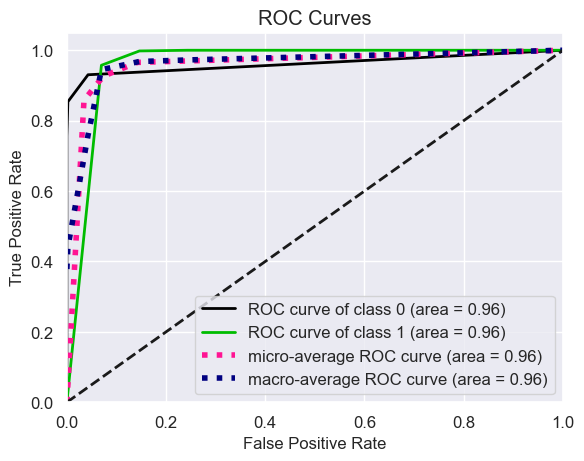

In [209]:
skplt.metrics.plot_roc(y12_test, y_prob21)

### Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression

m22 = LogisticRegression()
m22.fit(X12_train, y12_train)
y_p22 = m22.predict(X12_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression:",accuracy_score(y12_test, y_p22) * 100)

Accuracy Score of Logistic Regression: 83.54177088544273


In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers22 = ['newton-cg', 'lbfgs', 'liblinear']
penalty22 = ['l2']
c_values22 = [100, 10, 1.0, 0.1, 0.01]

params22 = dict(solver=solvers22, penalty=penalty22, C=c_values22)
cv22 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g22 = GridSearchCV(estimator=LogisticRegression(), param_grid=params22, n_jobs=-1, cv=cv22, scoring='accuracy', error_score=0)
g22.fit(X12_train, y12_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [212]:
g22.best_score_ * 100

84.64219996290115

In [213]:
print(classification_report(y12_test, y_p22))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       991
           1       0.84      0.83      0.84      1008

    accuracy                           0.84      1999
   macro avg       0.84      0.84      0.84      1999
weighted avg       0.84      0.84      0.84      1999



In [214]:
confusion_matrix(y12_test, y_p22)

array([[830, 161],
       [168, 840]], dtype=int64)

In [215]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [216]:
y_prob22 = model3.predict_proba(X12_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

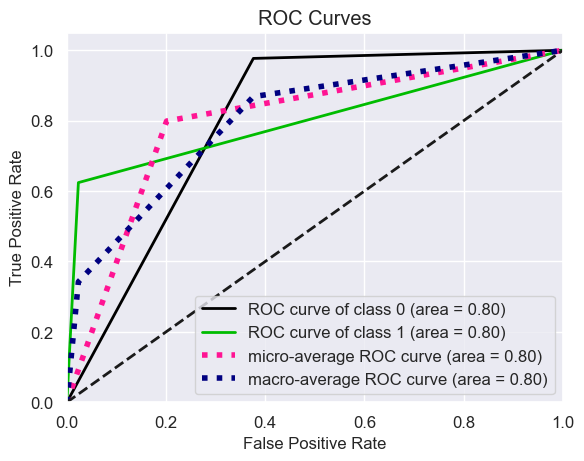

In [217]:
skplt.metrics.plot_roc(y12_test, y_prob22)

### Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier

m23 = DecisionTreeClassifier()
m23.fit(X12_train, y12_train)

m23.score(X12_test, y12_test) * 100

90.4952476238119

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

criterions23 = ['gini','entropy']
# n_estimators13 = [10, 100, 1000]
max_features23 = ['sqrt', 'log2']
min_splits23 = [2,4,6,8,10,14,18,20]

params23 = dict(max_features=max_features23, criterion=criterions23, min_samples_split=min_splits23)
cv23 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
g23 = GridSearchCV(DecisionTreeClassifier(), param_grid=params23, cv=cv23, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g23.fit(X12_train, y12_train)

Fitting 50 folds for each of 32 candidates, totalling 1600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20]},
             scoring='accuracy', verbose=3)

In [220]:
g23.best_score_ * 100

88.9136449638286

In [441]:
y_pred23 = g23.predict(X12_test)

In [442]:
print(classification_report(y12_test, y_pred23))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       991
           1       0.89      0.91      0.90      1008

    accuracy                           0.90      1999
   macro avg       0.90      0.90      0.90      1999
weighted avg       0.90      0.90      0.90      1999



In [443]:
confusion_matrix(y12_test, y_pred23)

array([[878, 113],
       [ 87, 921]], dtype=int64)

In [224]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [225]:
y_prob23 = m23.predict_proba(X12_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

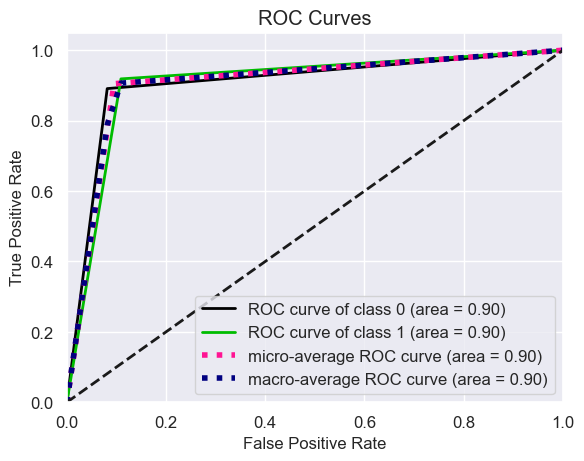

In [226]:
skplt.metrics.plot_roc(y12_test, y_prob23)

### Random Forest

In [227]:
from sklearn.ensemble import RandomForestClassifier

m24 = RandomForestClassifier()
m24.fit(X12_train, y12_train)

m24.score(X12_test, y12_test) * 100

95.14757378689345

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

criterions24 = ['gini','entropy']
n_estimators24 = [10, 100, 1000]
max_features24 = ['sqrt', 'log2']
min_splits24 = [2,4,6,8,10,14,18,20]

params24 = dict(n_estimators=n_estimators24, max_features=max_features24, criterion=criterions24, min_samples_split=min_splits24)
cv24 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g24 = GridSearchCV(RandomForestClassifier(), param_grid=params24, cv=cv24, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g24.fit(X12_train, y12_train)

Fitting 30 folds for each of 96 candidates, totalling 2880 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=3)

In [229]:
g24.best_score_ * 100

95.07363197922464

In [230]:
y_prob24 = g24.predict_proba(X12_test)

In [439]:
y_pred24 = g24.predict(X12_test)

In [440]:
print(classification_report(y12_test, y_pred24))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       991
           1       0.95      0.95      0.95      1008

    accuracy                           0.95      1999
   macro avg       0.95      0.95      0.95      1999
weighted avg       0.95      0.95      0.95      1999



In [444]:
confusion_matrix(y12_test, y_pred24)

array([[941,  50],
       [ 47, 961]], dtype=int64)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

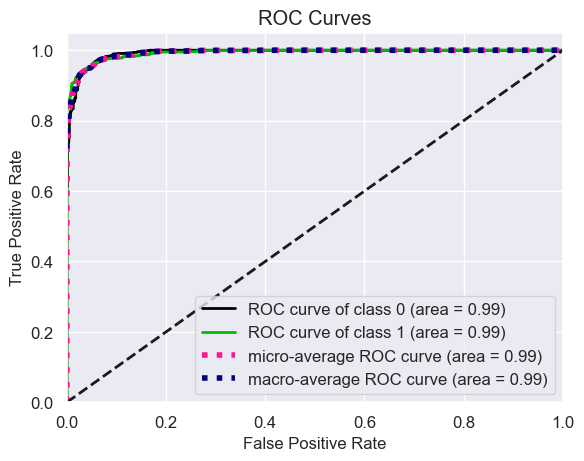

In [231]:
skplt.metrics.plot_roc(y12_test, y_prob24)

### SVM

In [232]:
from sklearn.svm import SVC

m25 = SVC(kernel='linear', probability=True)
m25.fit(X12_train, y12_train)

m25.score(X12_test, y12_test) * 100

84.0920460230115

In [233]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

kernel25 = ['poly', 'rbf', 'sigmoid']
C25 = [50, 10, 1.0, 0.1, 0.01]
gamma25 = ['scale']

p25 = dict(kernel=kernel25, C=C25, gamma=gamma25)
cv25 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g25 = GridSearchCV(estimator=SVC(), param_grid=p25, n_jobs=-1, cv=cv25, scoring='accuracy', error_score=0)
g25.fit(X12_train, y12_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [234]:
g25.best_score_ * 100

94.62882582081245

In [235]:
y_pred25 = m25.predict(X12_test)

In [236]:
print(classification_report(y12_test, y_pred25))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       991
           1       0.84      0.85      0.84      1008

    accuracy                           0.84      1999
   macro avg       0.84      0.84      0.84      1999
weighted avg       0.84      0.84      0.84      1999



In [237]:
confusion_matrix(y12_test, y_pred25)

array([[822, 169],
       [149, 859]], dtype=int64)

In [238]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [239]:
y_prob25 = m25.predict_proba(X12_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

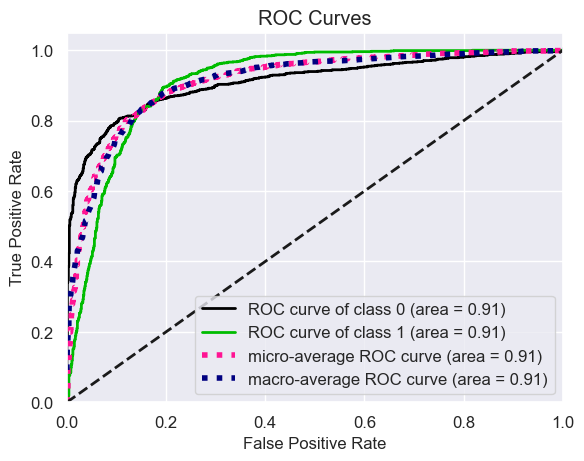

In [240]:
skplt.metrics.plot_roc(y12_test, y_prob25)

### Naive Bayes

In [241]:
from sklearn.naive_bayes import GaussianNB

m26 = GaussianNB()
m26.fit(X12_train, y12_train)

m26.score(X12_test, y12_test) * 100

67.983991995998

In [242]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method26 = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=42)
params_NB26 = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

g26 = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB26, cv=cv_method26, verbose=3, scoring='accuracy', n_jobs=-1)
# Data_transformed = PowerTransformer().fit_transform(X12_train)
g26.fit(X12_train, y12_train)

Fitting 15 folds for each of 14 candidates, totalling 210 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='accuracy', verbose=3)

In [243]:
g26.best_score_ * 100

66.71670836808451

In [244]:
y_pred26 = m26.predict(X12_test)

In [245]:
print(classification_report(y12_test, y_pred26))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74       991
           1       0.85      0.44      0.58      1008

    accuracy                           0.68      1999
   macro avg       0.74      0.68      0.66      1999
weighted avg       0.74      0.68      0.66      1999



In [246]:
confusion_matrix(y12_test, y_pred26)

array([[915,  76],
       [564, 444]], dtype=int64)

In [247]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [248]:
y_prob26 = m26.predict_proba(X12_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

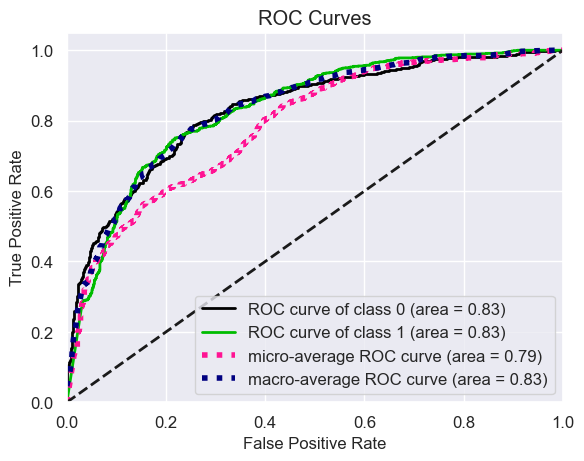

In [249]:
skplt.metrics.plot_roc(y12_test, y_prob26)

## Comparing all accuracy

### Normal approach

In [250]:
normal = {
    "KNN": model1.score(X_test, y_test) * 100, 
    "Logistic Regression": model2.score(X_test, y_test) * 100,
    "Decision Tree": model3.score(X_test, y_test) * 100,
    "Random Forest": model4.score(X_test, y_test) * 100,
    "SVM": model5.score(X_test, y_test) * 100,
    "Naive Bayes": model6.score(X_test, y_test) * 100
}

normal

{'KNN': 88.94783377541998,
 'Logistic Regression': 89.47833775419983,
 'Decision Tree': 86.5605658709107,
 'Random Forest': 90.27409372236959,
 'SVM': 88.85941644562334,
 'Naive Bayes': 85.0574712643678}

In [251]:
normal_with_HyperParameterTuning = {
    "KNN": grid1.best_score_ * 100, 
    "Logistic Regression": grid2.best_score_ * 100,
    "Decision Tree": np.NaN,
    "Random Forest": grid4.best_score_ * 100,
    "SVM": grid5.best_score_ * 100,
    "Naive Bayes": grid6.best_score_ * 100
}

normal_with_HyperParameterTuning

{'KNN': 88.92822025565388,
 'Logistic Regression': 89.85250737463127,
 'Decision Tree': nan,
 'Random Forest': 90.0589970501475,
 'SVM': 89.28220255653885,
 'Naive Bayes': 82.1978350421686}

### Oversampling using SMOTETomek

In [252]:
oversampling_SMOTETomek = {
    "KNN": m21.score(X12_test, y12_test) * 100, 
    "Logistic Regression": m22.score(X12_test, y12_test) * 100,
    "Decision Tree": m23.score(X12_test, y12_test) * 100,
    "Random Forest": m24.score(X12_test, y12_test) * 100,
    "SVM": m25.score(X12_test, y12_test) * 100,
    "Naive Bayes": m26.score(X12_test, y12_test) * 100
}

oversampling_SMOTETomek

{'KNN': 92.6463231615808,
 'Logistic Regression': 83.54177088544273,
 'Decision Tree': 90.4952476238119,
 'Random Forest': 95.14757378689345,
 'SVM': 84.0920460230115,
 'Naive Bayes': 67.983991995998}

In [253]:
oversampling_SMOTETomek_with_HyperParameterTuning = {
    "KNN": g21.best_score_ * 100, 
    "Logistic Regression": g22.best_score_ * 100,
    "Decision Tree": g23.best_score_ * 100,
    "Random Forest": g24.best_score_ * 100,
    "SVM": g25.best_score_ * 100,
    "Naive Bayes": g26.best_score_ * 100
}

oversampling_SMOTETomek_with_HyperParameterTuning

{'KNN': 94.96797440178074,
 'Logistic Regression': 84.64219996290115,
 'Decision Tree': 88.9136449638286,
 'Random Forest': 95.07363197922464,
 'SVM': 94.62882582081245,
 'Naive Bayes': 66.71670836808451}

In [254]:
res = pd.DataFrame([normal, normal_with_HyperParameterTuning, oversampling_SMOTETomek, oversampling_SMOTETomek_with_HyperParameterTuning], index=["normal", "normal_with_HyperParameterTuning", "oversampling_SMOTETomek", "oversampling_SMOTETomek_with_HyperParameterTuning"])

In [255]:
res

KNN  \
normal                                             88.947834   
normal_with_HyperParameterTuning                   88.928220   
oversampling_SMOTETomek                            92.646323   
oversampling_SMOTETomek_with_HyperParameterTuning  94.967974   

                                                   Logistic Regression  \
normal                                                       89.478338   
normal_with_HyperParameterTuning                             89.852507   
oversampling_SMOTETomek                                      83.541771   
oversampling_SMOTETomek_with_HyperParameterTuning            84.642200   

                                                   Decision Tree  \
normal                                                 86.560566   
normal_with_HyperParameterTuning                             NaN   
oversampling_SMOTETomek                                90.495248   
oversampling_SMOTETomek_with_HyperParameterTuning      88.913645   

                                                   Random Forest        SVM  \
normal                                                 90.274094  88.859416   
normal_with_HyperParameterTuning                       90.058997  89.282203   
oversampling_SMOTETomek                                95.147574  84.092046   
oversampling_SMOTETomek_with_HyperParameterTuning      95.073632  94.628826   

                                                   Naive Bayes  
normal                                               85.057471  
normal_with_HyperParameterTuning                     82.197835  
oversampling_SMOTETomek                              67.983992  
oversampling_SMOTETomek_with_HyperParameterTuning    66.716708

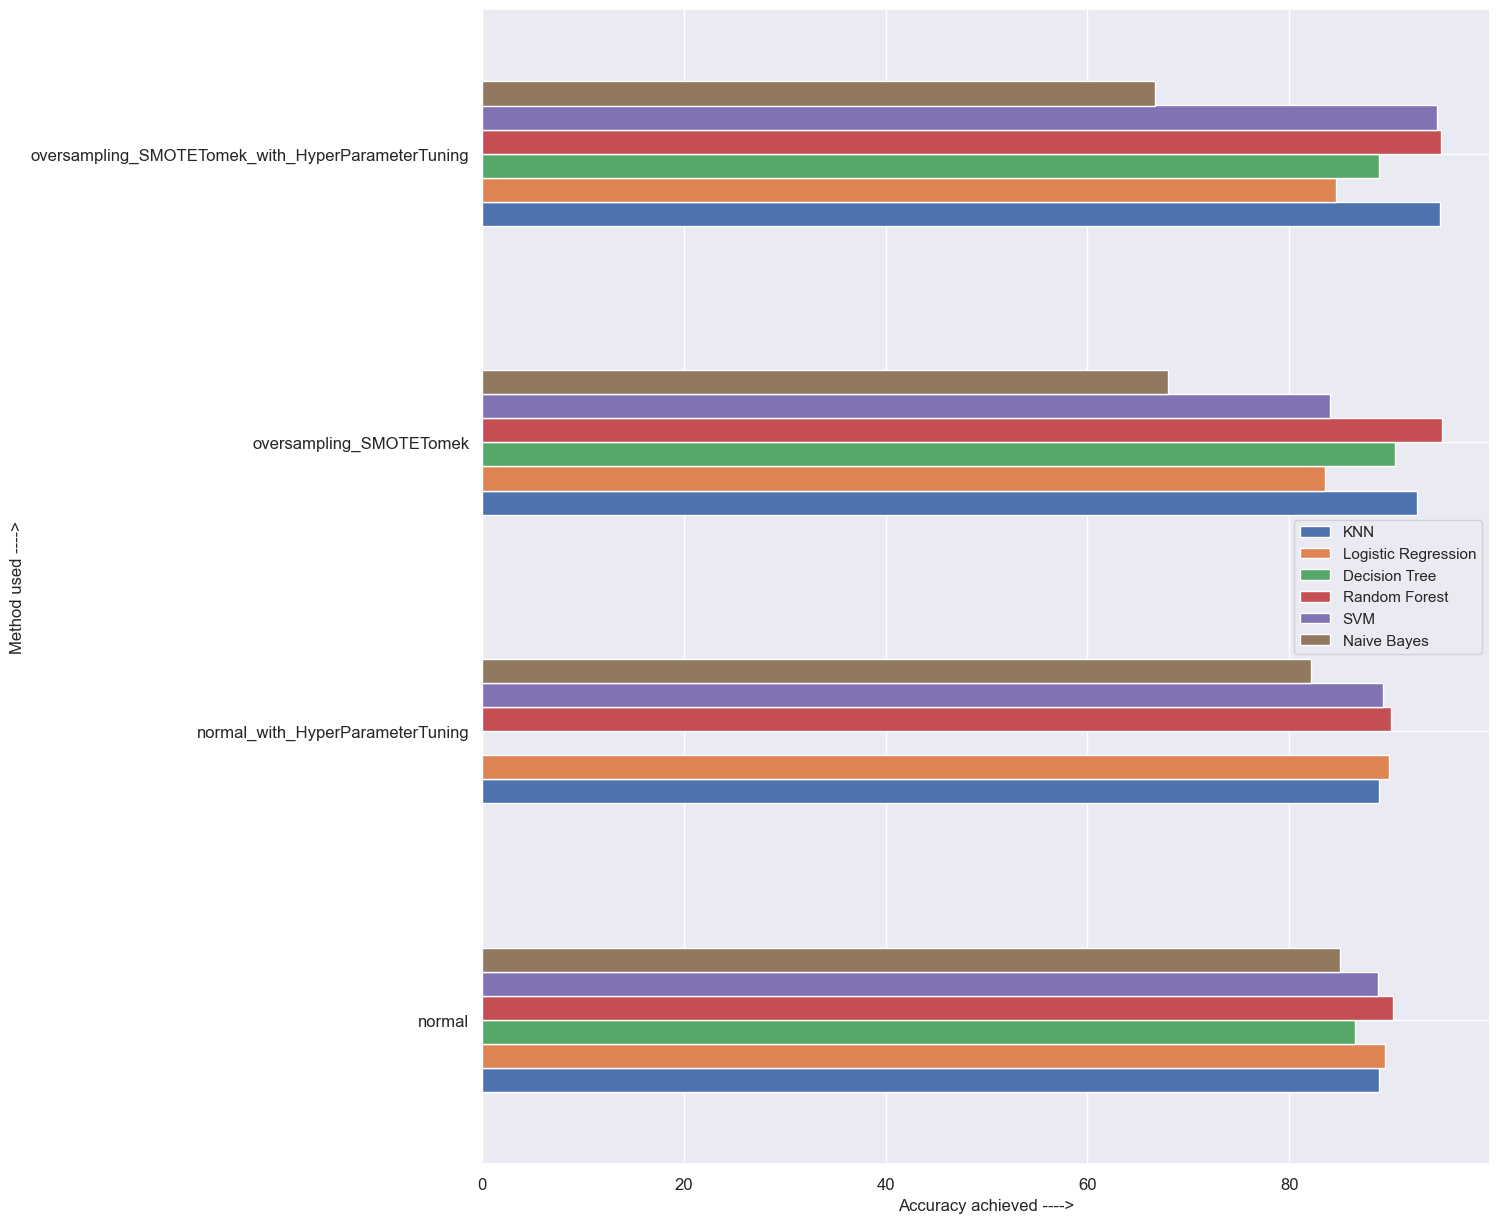

In [256]:
res.plot(kind='barh', figsize=(13,15), legend=True, fontsize=12)
plt.xlabel("Accuracy achieved ---->")
plt.ylabel("Method used ---->")
plt.yticks(rotation=0)
plt.show()

### Testing accuracy of Random Forest with oversampling_SMOTETomek_with_HyperParameterTuning

In [257]:
g24.scorer_

make_scorer(accuracy_score)

In [258]:
g24.n_splits_

30

In [259]:
g24.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=1000)

In [260]:
g24.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 1000}

In [261]:
g24.best_score_ * 100

95.07363197922464

In [262]:
g24_m_pred = g24.predict(X12_test)

In [263]:
g24_m_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [264]:
y12_test

5487    1
2577    0
3692    1
5918    1
7561    1
       ..
57      0
1918    0
5832    1
2478    1
7614    1
Name: y, Length: 1999, dtype: int64

In [265]:
accuracy_score(y12_test, g24_m_pred) * 100

95.14757378689345

In [266]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y12_test, g24_m_pred))

[[941  50]
 [ 47 961]]


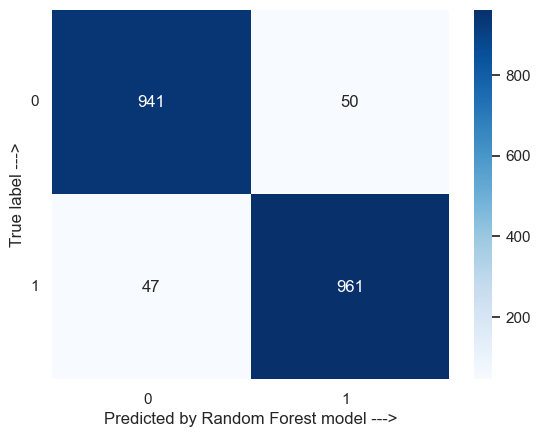

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
heatmap = sns.heatmap(confusion_matrix(y12_test, g24_m_pred), annot=True, fmt=".0f", annot_kws={'size': 12}, cmap="Blues", cbar=True)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label --->')
plt.xlabel('Predicted by Random Forest model --->')
plt.show()  

In [268]:
print(classification_report(y12_test, g24_m_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       991
           1       0.95      0.95      0.95      1008

    accuracy                           0.95      1999
   macro avg       0.95      0.95      0.95      1999
weighted avg       0.95      0.95      0.95      1999



In [269]:
import statsmodels.api as sm

X_glm = sm.add_constant(X12_train)
model = sm.GLM(y12_train, X_glm, family = sm.families.Binomial())
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5995
Model:                            GLM   Df Residuals:                     5957
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2203.8
Date:                Mon, 06 Nov 2023   Deviance:                       4407.7
Time:                        12:00:28   Pearson chi2:                 1.27e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4785
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4957      0.056    -26.731      0.000      -1.605      -1.386
age                   0.0102      0.055      0.185      0.853      -0.098       0.118
education             0.2482      0.053      4.713      0.000       0.145       0.351
default               0.0678      0.041      1.658      0.097      -0.012       0.148
balance               0.1517      0.042      3.583      0.000       0.069       0.235
housing              -0.1729      0.047     -3.641      0.000      -0.266      -0.080
loan                 -0.4081      0.050     -8.170      0.000      -0.506      -0.310
contact               0.7827      0.065     12.024      0.000       0.655       0.910
day                   0.1246      0.048      2.571      0.010       0.030       0.220
duration              1.6804      0.045     37.287      0.000       1.592       1.769
campaign             -0.2551      0.048     -5.285      0.000      -0.350      -0.160
pdays                 0.0359      0.049      0.731      0.465      -0.060       0.132
previous              0.0323      0.052      0.616      0.538      -0.070       0.135
poutcome              0.4469      0.036     12.570      0.000       0.377       0.517
job_blue-collar      -0.3423      0.066     -5.204      0.000      -0.471      -0.213
job_entrepreneur     -0.1185      0.048     -2.463      0.014      -0.213      -0.024
job_housemaid        -0.1134      0.044     -2.560      0.010      -0.200      -0.027
job_management       -0.1967      0.064     -3.069      0.002      -0.322      -0.071
job_retired           0.0363      0.048      0.755      0.451      -0.058       0.131
job_self-employed    -0.1617      0.048     -3.363      0.001      -0.256      -0.067
job_services         -0.1809      0.054     -3.335      0.001      -0.287      -0.075
job_student           0.0659      0.035      1.858      0.063      -0.004       0.135
job_technician       -0.2472      0.060     -4.127      0.000      -0.365      -0.130
job_unemployed       -0.2179      0.051     -4.273      0.000      -0.318      -0.118
job_unknown           0.0333      0.036      0.924      0.356      -0.037       0.104
marital_married      -0.1920      0.064     -3.012      0.003      -0.317      -0.067
marital_single       -0.0694      0.068     -1.021      0.307      -0.203       0.064
month_aug            -0.3651      0.058     -6.271      0.000      -0.479      -0.251
month_dec            -0.0838      0.034     -2.463      0.014      -0.150      -0.017
month_feb            -0.0388      0.044     -0.883      0.377      -0.125       0.047
month_jan            -0.3016      0.045     -6.675      0.000      -0.390      -0.213
month_jul            -0.5830      0.063     -9.195      0.000      -0.707      -0.459
month_jun             0.0086      0.065      0.133      0.894      -0.118

In [270]:
df_glm = pd.DataFrame(X12_train, columns=df3.drop('y', axis=1).columns)
df_glm

age  education   default   balance   housing      loan   contact  \
6403 -0.752134  -0.497159 -0.130759  0.756279  0.875617 -0.424756  0.643536   
5220 -0.632866  -0.084417 -0.130759 -0.706847  0.875617 -0.424756  0.300279   
527   0.756234  -0.084417 -0.130759 -0.731720 -1.142051 -0.424756  0.643536   
6245  0.337395  -0.084417 -0.130759 -0.196106 -1.142051 -0.424756  0.643536   
7437  2.184978   0.894832 -0.130759  0.614182 -1.142051 -0.424756  0.643536   
...        ...        ...       ...       ...       ...       ...       ...   
5226 -0.234166   0.770788 -0.130759 -0.169478 -1.142051 -0.424756  0.643536   
5390 -1.322808  -0.084417 -0.130759 -0.505814  0.875617 -0.424756  0.643536   
860   1.620304  -1.365123 -0.130759 -0.535787 -1.142051 -0.424756  0.643536   
7603 -0.955335  -0.084417 -0.130759 -0.445816  0.448867 -0.424756  0.643536   
7270 -0.719270  -0.084417 -0.130759  0.564744 -1.142051  1.541756  0.643536   

           day  duration  campaign     pdays  previous  poutcome  \
6403  0.166589  2.291086 -0.254624 -0.407218 -0.320413 -0.171381   
5220 -0.107266  2.291086 -0.678577 -0.407218 -0.320413 -0.171381   
527  -0.838546 -0.128310  0.361956 -0.407218 -0.320413 -0.171381   
6245  1.654607  1.691753 -0.871205 -0.189868 -0.060828 -0.171381   
7437  0.980167  0.329441 -0.871205  0.749246  1.763729  5.834939   
...        ...       ...       ...       ...       ...       ...   
5226 -0.636314 -0.460405 -0.047748 -0.407218 -0.320413 -0.171381   
5390  0.049981  1.151713 -0.160874 -0.407218 -0.320413 -0.171381   
860   0.374052 -0.462764 -0.254624 -0.407218 -0.320413 -0.171381   
7603 -1.629094 -0.160064 -0.871205  0.534436  6.323368  5.834939   
7270 -1.465401 -0.175391 -0.434900 -0.407218 -0.320413 -0.171381   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
6403         1.943983         -0.196454      -0.159382       -0.522306   
5220        -0.514408         -0.196454      -0.159382       -0.522306   
527         -0.514408         -0.196454      -0.159382       -0.522306   
6245        -0.514408         -0.196454      -0.159382       -0.522306   
7437        -0.514408         -0.196454      -0.159382       -0.522306   
...               ...               ...            ...             ...   
5226        -0.514408         -0.196454      -0.159382        1.914585   
5390        -0.514408         -0.196454      -0.159382       -0.522306   
860          1.943983         -0.196454      -0.159382       -0.522306   
7603         1.943983         -0.196454      -0.159382       -0.522306   
7270         1.943983         -0.196454      -0.159382       -0.522306   

      job_retired  job_self-employed  job_services  job_student  \
6403    -0.231518          -0.205391      -0.31876    -0.137593   
5220    -0.231518          -0.205391      -0.31876    -0.137593   
527     -0.231518          -0.205391      -0.31876    -0.137593   
6245    -0.231518          -0.205391      -0.31876    -0.137593   
7437     4.319320          -0.205391      -0.31876    -0.137593   
...           ...                ...           ...          ...   
5226    -0.231518          -0.205391      -0.31876    -0.137593   
5390    -0.231518          -0.205391      -0.31876    -0.137593   
860     -0.231518          -0.205391      -0.31876    -0.137593   
7603    -0.231518          -0.205391      -0.31876    -0.137593   
7270    -0.231518          -0.205391      -0.31876    -0.137593   

      job_technician  job_unemployed  job_unknown  marital_married  \
6403       -0.452367       -0.170696    -0.092068         0.785095   
5220       -0.452367       -0.170696    -0.092068        -1.273731   
527        -0.452367        5.858354    -0.092068        -1.273731   
6245       -0.452367       -0.170696    -0.092068        -0.821227   
7437       -0.452367       -0.170696    -0.092068         0.785095   
...              ...             ...          ...              ...   
5226       -0.452367       -0.170696    -0.092068         0.1

In [271]:
p_values = results.pvalues
p_values

const                2.073432e-157
age                   8.532803e-01
education             2.446326e-06
default               9.726702e-02
balance               3.397077e-04
housing               2.719116e-04
loan                  3.083437e-16
contact               2.657171e-33
day                   1.013604e-02
duration             2.695195e-304
campaign              1.258808e-07
pdays                 4.649263e-01
previous              5.380713e-01
poutcome              3.099512e-36
job_blue-collar       1.951017e-07
job_entrepreneur      1.378175e-02
job_housemaid         1.048224e-02
job_management        2.146246e-03
job_retired           4.505124e-01
job_self-employed     7.704924e-04
job_services          8.537833e-04
job_student           6.311297e-02
job_technician        3.681455e-05
job_unemployed        1.927905e-05
job_unknown           3.555730e-01
marital_married       2.592365e-03
marital_single        3.070595e-01
month_aug             3.577027e-10
month_dec           

In [272]:
p_values_df = pd.DataFrame({
    #'Feature': df_glm.columns, 
    'P-Value': p_values[1:]})

print("Logistic Regression Summary:")
print(summary)
print("\nP-Values for Coefficients:")
print(p_values_df)
print("\nSignificant independent variables(P-Value < 0.05):")
print(p_values_df[p_values_df['P-Value'] < 0.05])

Logistic Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5995
Model:                            GLM   Df Residuals:                     5957
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2203.8
Date:                Mon, 06 Nov 2023   Deviance:                       4407.7
Time:                        12:00:28   Pearson chi2:                 1.27e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4785
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const    

### Creating model with only significant independent variables

In [273]:
X13_res = X12_res.copy()
y13_res = y12_res.copy()

In [274]:
X13_res

age  education   default   balance   housing      loan   contact  \
0    -1.067914  -1.365123 -0.130759  0.655937 -1.142051 -0.424756  0.643536   
1    -0.779891  -0.084417 -0.130759  2.114953  0.875617  2.354292  0.643536   
2    -0.587875   1.196289 -0.130759  0.303580  0.875617 -0.424756  0.643536   
3    -1.067914   1.196289 -0.130759  0.405175  0.875617  2.354292 -1.553915   
4     1.716312  -0.084417 -0.130759 -0.784937  0.875617 -0.424756 -1.553915   
...        ...        ...       ...       ...       ...       ...       ...   
7989 -0.683883   1.196289 -0.130759  0.437135 -1.142051 -0.424756  0.643536   
7990 -0.571122   0.139064 -0.130759 -0.003824 -1.142051 -0.424756  0.643536   
7991  0.831795  -0.084417 -0.130759 -0.492664  0.111519  1.301857 -1.553915   
7992  0.383506   1.196289 -0.130759 -0.784937 -0.825570 -0.424756  0.643536   
7993 -1.087316  -0.084417 -0.130759 -0.951105  0.875617  0.563993 -0.772091   

           day  duration  campaign     pdays  previous  poutcome  \
0     0.374052 -0.878134 -0.871205 -0.407218 -0.320413 -0.171381   
1    -0.596026 -0.117521 -0.871205  2.989044  2.041734 -0.171381   
2     0.010273 -0.306326 -0.871205  2.899143  0.270124 -0.171381   
3    -1.566105 -0.230804  0.978537 -0.407218 -0.320413 -0.171381   
4    -1.323585 -0.085154 -0.871205 -0.407218 -0.320413 -0.171381   
...        ...       ...       ...       ...       ...       ...   
7989  0.170893 -0.672792 -0.871205 -0.407218 -0.320413 -0.171381   
7990  1.269255  1.965861  0.361956  1.655612  1.554245  5.834939   
7991 -0.570202  2.222380 -0.105046 -0.407218 -0.320413 -0.171381   
7992  1.382171  1.150921 -0.871205 -0.407218 -0.320413 -0.171381   
7993  0.096558  1.946578 -0.473995 -0.407218 -0.320413 -0.171381   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0           -0.514408         -0.196454      -0.159382       -0.522306   
1           -0.514408         -0.196454      -0.159382       -0.522306   
2           -0.514408         -0.196454      -0.159382        1.914585   
3           -0.514408         -0.196454      -0.159382        1.914585   
4            1.943983         -0.196454      -0.159382       -0.522306   
...               ...               ...            ...             ...   
7989        -0.514408         -0.196454      -0.159382        1.914585   
7990        -0.514408         -0.196454      -0.159382       -0.097073   
7991        -0.514408         -0.196454      -0.159382       -0.522306   
7992        -0.514408         -0.196454      -0.159382        1.914585   
7993         1.943983         -0.196454      -0.159382       -0.522306   

      job_retired  job_self-employed  job_services  job_student  \
0       -0.231518          -0.205391     -0.318760    -0.137593   
1       -0.231518          -0.205391      3.137153    -0.137593   
2       -0.231518          -0.205391     -0.318760    -0.137593   
3       -0.231518          -0.205391     -0.318760    -0.137593   
4       -0.231518          -0.205391     -0.318760    -0.137593   
...           ...                ...           ...          ...   
7989    -0.231518          -0.205391     -0.318760    -0.137593   
7990    -0.231518          -0.205391     -0.318760    -0.137593   
7991    -0.231518          -0.205391     -0.318760    -0.137593   
7992    -0.231518          -0.205391     -0.318760    -0.137593   
7993    -0.231518          -0.205391     -0.318760    -0.137593   

      job_technician  job_unemployed  job_unknown  marital_married  \
0          -0.452367        5.858354    -0.092068         0.785095   
1          -0.452367       -0.170696    -0.092068         0.785095   
2          -0.452367       -0.170696    -0.092068        -1.273731   
3          -0.452367       -0.170696    -0.092068         0.785095   
4          -0.452367       -0.170696    -0.092068         0.785095   
...              ...             ...          ...              ...   
7989       -0.452367       -0.170696    -0.092068        -0.1

In [275]:
X13_res = X13_res[['education'
,'balance'
,'housing'
,'loan'
,'contact'
,'day'
,'duration'
,'campaign'
,'poutcome'
,'job_blue-collar'
,'job_entrepreneur'
,'job_housemaid'
,'job_management'
,'job_retired'
,'job_self-employed'
,'job_services'
,'job_student'
,'job_technician'
,'job_unemployed'
,'job_unknown'
,'marital_married'
,'marital_single'
,'month_aug'
,'month_dec'
,'month_feb'
,'month_jan'
,'month_jul'
,'month_jun'
,'month_mar'
,'month_may'
,'month_nov'
,'month_oct'
,'month_sep']]

In [276]:
X13_res

education   balance   housing      loan   contact       day  duration  \
0     -1.365123  0.655937 -1.142051 -0.424756  0.643536  0.374052 -0.878134   
1     -0.084417  2.114953  0.875617  2.354292  0.643536 -0.596026 -0.117521   
2      1.196289  0.303580  0.875617 -0.424756  0.643536  0.010273 -0.306326   
3      1.196289  0.405175  0.875617  2.354292 -1.553915 -1.566105 -0.230804   
4     -0.084417 -0.784937  0.875617 -0.424756 -1.553915 -1.323585 -0.085154   
...         ...       ...       ...       ...       ...       ...       ...   
7989   1.196289  0.437135 -1.142051 -0.424756  0.643536  0.170893 -0.672792   
7990   0.139064 -0.003824 -1.142051 -0.424756  0.643536  1.269255  1.965861   
7991  -0.084417 -0.492664  0.111519  1.301857 -1.553915 -0.570202  2.222380   
7992   1.196289 -0.784937 -0.825570 -0.424756  0.643536  1.382171  1.150921   
7993  -0.084417 -0.951105  0.875617  0.563993 -0.772091  0.096558  1.946578   

      campaign  poutcome  job_blue-collar  job_entrepreneur  job_housemaid  \
0    -0.871205 -0.171381        -0.514408         -0.196454      -0.159382   
1    -0.871205 -0.171381        -0.514408         -0.196454      -0.159382   
2    -0.871205 -0.171381        -0.514408         -0.196454      -0.159382   
3     0.978537 -0.171381        -0.514408         -0.196454      -0.159382   
4    -0.871205 -0.171381         1.943983         -0.196454      -0.159382   
...        ...       ...              ...               ...            ...   
7989 -0.871205 -0.171381        -0.514408         -0.196454      -0.159382   
7990  0.361956  5.834939        -0.514408         -0.196454      -0.159382   
7991 -0.105046 -0.171381        -0.514408         -0.196454      -0.159382   
7992 -0.871205 -0.171381        -0.514408         -0.196454      -0.159382   
7993 -0.473995 -0.171381         1.943983         -0.196454      -0.159382   

      job_management  job_retired  job_self-employed  job_services  \
0          -0.522306    -0.231518          -0.205391     -0.318760   
1          -0.522306    -0.231518          -0.205391      3.137153   
2           1.914585    -0.231518          -0.205391     -0.318760   
3           1.914585    -0.231518          -0.205391     -0.318760   
4          -0.522306    -0.231518          -0.205391     -0.318760   
...              ...          ...                ...           ...   
7989        1.914585    -0.231518          -0.205391     -0.318760   
7990       -0.097073    -0.231518          -0.205391     -0.318760   
7991       -0.522306    -0.231518          -0.205391     -0.318760   
7992        1.914585    -0.231518          -0.205391     -0.318760   
7993       -0.522306    -0.231518          -0.205391     -0.318760   

      job_student  job_technician  job_unemployed  job_unknown  \
0       -0.137593       -0.452367        5.858354    -0.092068   
1       -0.137593       -0.452367       -0.170696    -0.092068   
2       -0.137593       -0.452367       -0.170696    -0.092068   
3       -0.137593       -0.452367       -0.170696    -0.092068   
4       -0.137593       -0.452367       -0.170696    -0.092068   
...           ...             ...             ...          ...   
7989    -0.137593       -0.452367       -0.170696    -0.092068   
7990    -0.137593       -0.452367        4.806294    -0.092068   
7991    -0.137593       -0.452367       -0.170696    -0.092068   
7992    -0.137593       -0.452367       -0.170696    -0.092068   
7993    -0.137593       -0.452367       -0.170696    -0.092068   

      marital_married  marital_single  month_aug  month_dec  month_feb  \
0            0.785095       -0.599749  -0.403496  -0.066659  -0.227244   
1            0.785095       -0.599749  -0.403496  -0.066659  -0.227244   
2           -1.273731        1.667363  -0.403496  -0.066659  -0.227244   
3            0.785095       -0.599749  -0.403496  -0.066659  -0.227244   
4            0.785095       -0.599749  -0.403496  -0.066659  -0.227244   
...               ...             ...     

In [277]:
y13_res

0       0
1       0
2       0
3       0
4       0
       ..
7989    1
7990    1
7991    1
7992    1
7993    1
Name: y, Length: 7994, dtype: int64

In [278]:
from sklearn.model_selection import train_test_split

X13_train, X13_test, y13_train, y13_test = train_test_split(X13_res, y13_res, test_size=0.25, random_state=42)

In [279]:
X13_train.shape

(5995, 33)

In [280]:
X13_test.shape

(1999, 33)

In [281]:
y13_train.shape

(5995,)

In [282]:
y13_test.shape

(1999,)

In [283]:
from sklearn.ensemble import RandomForestClassifier

m34 = RandomForestClassifier()
m34.fit(X13_train, y13_train)

m34.score(X13_test, y13_test) * 100

95.14757378689345

In [284]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

criterions34 = ['gini','entropy']
n_estimators34 = [10, 100, 1000]
max_features34 = ['sqrt', 'log2']
min_splits34 = [2,4,6,8,10,14,18,20]

params34 = dict(n_estimators=n_estimators34, max_features=max_features34, criterion=criterions34, min_samples_split=min_splits34)
cv34 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g34 = GridSearchCV(RandomForestClassifier(), param_grid=params34, cv=cv34, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g34.fit(X13_train, y13_train)

Fitting 30 folds for each of 96 candidates, totalling 2880 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=3)

In [285]:
g34.best_score_ * 100

94.91249304396217

In [445]:
y_pred34 = g34.predict(X13_test)

In [447]:
print(classification_report(y13_test,y_pred34))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       991
           1       0.95      0.95      0.95      1008

    accuracy                           0.95      1999
   macro avg       0.95      0.95      0.95      1999
weighted avg       0.95      0.95      0.95      1999



In [448]:
confusion_matrix(y13_test,y_pred34)

array([[938,  53],
       [ 46, 962]], dtype=int64)

In [286]:
y_prob34 = g34.predict_proba(X13_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

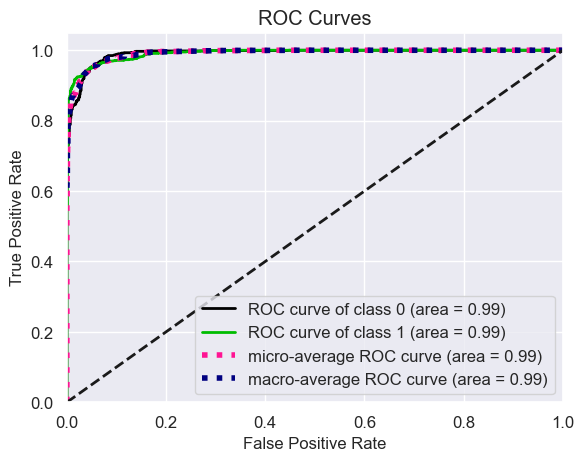

In [287]:
skplt.metrics.plot_roc(y13_test, y_prob34)

### Q2) The factors affecting a client’s balance

In [288]:
df2

age            job  marital  education  default  balance  housing  \
0     30.0     unemployed  married          1        0   1787.0        0   
1     33.0       services  married          2        0   3596.5        1   
2     35.0     management   single          3        0   1350.0        1   
3     30.0     management  married          3        0   1476.0        1   
4     59.0    blue-collar  married          2        0      0.0        1   
...    ...            ...      ...        ...      ...      ...      ...   
4516  33.0       services  married          2        0   -333.0        1   
4517  57.0  self-employed  married          3        1  -2047.5        1   
4518  57.0     technician  married          2        0    295.0        0   
4519  28.0    blue-collar  married          2        0   1137.0        0   
4520  44.0   entrepreneur   single          3        0   1136.0        1   

      loan  contact   day month  duration  campaign  pdays  previous  \
0        0        1  19.0   oct      79.0       1.0     -1         0   
1        1        1  11.0   may     220.0       1.0    339         4   
2        0        1  16.0   apr     185.0       1.0    330         1   
3        1        0   3.0   jun     199.0       4.0     -1         0   
4        0        0   5.0   may     226.0       1.0     -1         0   
...    ...      ...   ...   ...       ...       ...    ...       ...   
4516     0        1  30.0   jul     329.0       5.0     -1         0   
4517     1        0   9.0   may     153.0       1.0     -1         0   
4518     0        1  19.0   aug     151.0       6.0     -1         0   
4519     0        1   6.0   feb     129.0       4.0    211         3   
4520     1        1   3.0   apr     345.0       2.0    249         7   

      poutcome  y  
0            0  0  
1            0  0  
2            0  0  
3            0  0  
4            0  0  
...        ... ..  
4516         0  0  
4517         0  0  
4518         0  0  
4519         0  0  
4520         0  0  

[4521 rows x 17 columns]

In [289]:
pd.set_option('display.max_columns', None)

df4 = pd.get_dummies(df2, drop_first=True)

In [290]:
df4

age  education  default  balance  housing  loan  contact   day  \
0     30.0          1        0   1787.0        0     0        1  19.0   
1     33.0          2        0   3596.5        1     1        1  11.0   
2     35.0          3        0   1350.0        1     0        1  16.0   
3     30.0          3        0   1476.0        1     1        0   3.0   
4     59.0          2        0      0.0        1     0        0   5.0   
...    ...        ...      ...      ...      ...   ...      ...   ...   
4516  33.0          2        0   -333.0        1     0        1  30.0   
4517  57.0          3        1  -2047.5        1     1        0   9.0   
4518  57.0          2        0    295.0        0     0        1  19.0   
4519  28.0          2        0   1137.0        0     0        1   6.0   
4520  44.0          3        0   1136.0        1     1        1   3.0   

      duration  campaign  pdays  previous  poutcome  y  job_blue-collar  \
0         79.0       1.0     -1         0         0  0            False   
1        220.0       1.0    339         4         0  0            False   
2        185.0       1.0    330         1         0  0            False   
3        199.0       4.0     -1         0         0  0            False   
4        226.0       1.0     -1         0         0  0             True   
...        ...       ...    ...       ...       ... ..              ...   
4516     329.0       5.0     -1         0         0  0            False   
4517     153.0       1.0     -1         0         0  0            False   
4518     151.0       6.0     -1         0         0  0            False   
4519     129.0       4.0    211         3         0  0             True   
4520     345.0       2.0    249         7         0  0            False   

      job_entrepreneur  job_housemaid  job_management  job_retired  \
0                False          False           False        False   
1                False          False           False        False   
2                False          False            True        False   
3                False          False            True        False   
4                False          False           False        False   
...                ...            ...             ...          ...   
4516             False          False           False        False   
4517             False          False           False        False   
4518             False          False           False        False   
4519             False          False           False        False   
4520              True          False           False        False   

      job_self-employed  job_services  job_student  job_technician  \
0                 False         False        False           False   
1                 False          True        False           False   
2                 False         False        False           False   
3                 False         False        False           False   
4                 False         False        False           False   
...                 ...           ...          ...             ...   
4516              False          True        False           False   
4517               True         False        False           False   
4518              False         False        False            True   
4519              False         False        False           False   
4520              False         False        False           False   

      job_unemployed  job_unknown  marital_married  marital_single  month_aug  \
0               True        False             True           False      False   
1              False        False             True           False      False   
2              False        False            False            True      False   
3              False        False             True           False      False   
4              False        False             True           False      False   
...              ...          ...              ...           

In [291]:
df4.replace({False: 0, True: 1}, inplace=True)

In [292]:
df4

age  education  default  balance  housing  loan  contact   day  \
0     30.0          1        0   1787.0        0     0        1  19.0   
1     33.0          2        0   3596.5        1     1        1  11.0   
2     35.0          3        0   1350.0        1     0        1  16.0   
3     30.0          3        0   1476.0        1     1        0   3.0   
4     59.0          2        0      0.0        1     0        0   5.0   
...    ...        ...      ...      ...      ...   ...      ...   ...   
4516  33.0          2        0   -333.0        1     0        1  30.0   
4517  57.0          3        1  -2047.5        1     1        0   9.0   
4518  57.0          2        0    295.0        0     0        1  19.0   
4519  28.0          2        0   1137.0        0     0        1   6.0   
4520  44.0          3        0   1136.0        1     1        1   3.0   

      duration  campaign  pdays  previous  poutcome  y  job_blue-collar  \
0         79.0       1.0     -1         0         0  0                0   
1        220.0       1.0    339         4         0  0                0   
2        185.0       1.0    330         1         0  0                0   
3        199.0       4.0     -1         0         0  0                0   
4        226.0       1.0     -1         0         0  0                1   
...        ...       ...    ...       ...       ... ..              ...   
4516     329.0       5.0     -1         0         0  0                0   
4517     153.0       1.0     -1         0         0  0                0   
4518     151.0       6.0     -1         0         0  0                0   
4519     129.0       4.0    211         3         0  0                1   
4520     345.0       2.0    249         7         0  0                0   

      job_entrepreneur  job_housemaid  job_management  job_retired  \
0                    0              0               0            0   
1                    0              0               0            0   
2                    0              0               1            0   
3                    0              0               1            0   
4                    0              0               0            0   
...                ...            ...             ...          ...   
4516                 0              0               0            0   
4517                 0              0               0            0   
4518                 0              0               0            0   
4519                 0              0               0            0   
4520                 1              0               0            0   

      job_self-employed  job_services  job_student  job_technician  \
0                     0             0            0               0   
1                     0             1            0               0   
2                     0             0            0               0   
3                     0             0            0               0   
4                     0             0            0               0   
...                 ...           ...          ...             ...   
4516                  0             1            0               0   
4517                  1             0            0               0   
4518                  0             0            0               1   
4519                  0             0            0               0   
4520                  0             0            0               0   

      job_unemployed  job_unknown  marital_married  marital_single  month_aug  \
0                  1            0                1               0          0   
1                  0            0                1               0          0   
2                  0            0                0               1          0   
3                  0            0                1               0          0   
4                  0            0                1               0          0   
...              ...          ...              ...           

In [293]:
X4 = df4.drop('balance', axis=1)
y4 = df4['balance']

In [294]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X4 = sc.fit_transform(X4)

In [295]:
X4 = pd.DataFrame(X4, columns=df4.drop('balance', axis=1).columns)

In [296]:
X4

age  education   default   housing      loan   contact       day  \
0    -1.067914  -1.365123 -0.130759 -1.142051 -0.424756  0.643536  0.374052   
1    -0.779891  -0.084417 -0.130759  0.875617  2.354292  0.643536 -0.596026   
2    -0.587875   1.196289 -0.130759  0.875617 -0.424756  0.643536  0.010273   
3    -1.067914   1.196289 -0.130759  0.875617  2.354292 -1.553915 -1.566105   
4     1.716312  -0.084417 -0.130759  0.875617 -0.424756 -1.553915 -1.323585   
...        ...        ...       ...       ...       ...       ...       ...   
4516 -0.779891  -0.084417 -0.130759  0.875617 -0.424756  0.643536  1.707910   
4517  1.524296   1.196289  7.647669  0.875617  2.354292 -1.553915 -0.838546   
4518  1.524296  -0.084417 -0.130759 -1.142051 -0.424756  0.643536  0.374052   
4519 -1.259930  -0.084417 -0.130759 -1.142051 -0.424756  0.643536 -1.202326   
4520  0.276195   1.196289 -0.130759  0.875617  2.354292  0.643536 -1.566105   

      duration  campaign     pdays  previous  poutcome         y  \
0    -0.878134 -0.871205 -0.407218 -0.320413 -0.171381 -0.360902   
1    -0.117521 -0.871205  2.989044  2.041734 -0.171381 -0.360902   
2    -0.306326 -0.871205  2.899143  0.270124 -0.171381 -0.360902   
3    -0.230804  0.978537 -0.407218 -0.320413 -0.171381 -0.360902   
4    -0.085154 -0.871205 -0.407218 -0.320413 -0.171381 -0.360902   
...        ...       ...       ...       ...       ...       ...   
4516  0.470470  1.595117 -0.407218 -0.320413 -0.171381 -0.360902   
4517 -0.478947 -0.871205 -0.407218 -0.320413 -0.171381 -0.360902   
4518 -0.489736  2.211698 -0.407218 -0.320413 -0.171381 -0.360902   
4519 -0.608413  0.978537  1.710451  1.451197 -0.171381 -0.360902   
4520  0.556781 -0.254624  2.090033  3.813344 -0.171381 -0.360902   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0           -0.514408         -0.196454      -0.159382       -0.522306   
1           -0.514408         -0.196454      -0.159382       -0.522306   
2           -0.514408         -0.196454      -0.159382        1.914585   
3           -0.514408         -0.196454      -0.159382        1.914585   
4            1.943983         -0.196454      -0.159382       -0.522306   
...               ...               ...            ...             ...   
4516        -0.514408         -0.196454      -0.159382       -0.522306   
4517        -0.514408         -0.196454      -0.159382       -0.522306   
4518        -0.514408         -0.196454      -0.159382       -0.522306   
4519         1.943983         -0.196454      -0.159382       -0.522306   
4520        -0.514408          5.090257      -0.159382       -0.522306   

      job_retired  job_self-employed  job_services  job_student  \
0       -0.231518          -0.205391     -0.318760    -0.137593   
1       -0.231518          -0.205391      3.137153    -0.137593   
2       -0.231518          -0.205391     -0.318760    -0.137593   
3       -0.231518          -0.205391     -0.318760    -0.137593   
4       -0.231518          -0.205391     -0.318760    -0.137593   
...           ...                ...           ...          ...   
4516    -0.231518          -0.205391      3.137153    -0.137593   
4517    -0.231518           4.868770     -0.318760    -0.137593   
4518    -0.231518          -0.205391     -0.318760    -0.137593   
4519    -0.231518          -0.205391     -0.318760    -0.137593   
4520    -0.231518          -0.205391     -0.318760    -0.137593   

      job_technician  job_unemployed  job_unknown  marital_married  \
0          -0.452367        5.858354    -0.092068         0.785095   
1          -0.452367       -0.170696    -0.092068         0.785095   
2          -0.452367       -0.170696    -0.092068        -1.273731   
3          -0.452367       -0.170696    -0.092068         0.785095   
4          -0.452367       -0.170696    -0.092068         0.785095   
...              ...             ...          ...              ...   
4516       -0.452367       -0.170696    -0.092068         0.7

In [297]:
from sklearn.linear_model import LinearRegression

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=42)

In [300]:
lm = LinearRegression()

In [301]:
lm.fit(X4_train, y4_train)

LinearRegression()

In [302]:
lm.score(X4_test, y4_test) * 100

9.761937675514643

In [303]:
y4_pred = lm.predict(X4_test)

In [304]:
y4_pred

array([-350.06771974, 1106.65919477,  975.60811413, ..., 1408.84864974,
       1056.22646752, 1183.70922158])

In [305]:
import statsmodels.api as sm

X4_glm = sm.add_constant(X4_train)
model = sm.OLS(y4_train, X4_glm)
results = model.fit()
summary = results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     8.290
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           5.93e-42
Time:                        12:25:51   Log-Likelihood:                -28813.
No. Observations:                3390   AIC:                         5.770e+04
Df Residuals:                    3352   BIC:                         5.793e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               978.2506     20.556     47.589      0.000     937.946    1018.555
age                 120.4825     26.795      4.496      0.000      67.946     173.019
education            36.9264     25.001      1.477      0.140     -12.093      85.946
default            -129.8525     21.635     -6.002      0.000    -172.272     -87.433
housing             -12.1097     24.691     -0.490      0.624     -60.520      36.301
loan                -87.7426     21.004     -4.177      0.000    -128.924     -46.561
contact              21.2294     32.309      0.657      0.511     -42.118      84.576
day                  19.1863     23.994      0.800      0.424     -27.859      66.231
duration             11.3495     22.648      0.501      0.616     -33.056      55.755
campaign             28.6003     21.750      1.315      0.189     -14.044      71.244
pdays                 7.7268     27.570      0.280      0.779     -46.329      61.783
previous             11.6158     24.509      0.474      0.636     -36.438      59.670
poutcome             14.8483     22.280      0.666      0.505     -28.836      58.533
y                    35.8154     24.143      1.483      0.138     -11.521      83.152
job_blue-collar     -39.0600     33.088     -1.180      0.238    -103.936      25.816
job_entrepreneur    -12.7229     24.651     -0.516      0.606     -61.055      35.610
job_housemaid        -4.5385     23.054     -0.197      0.844     -49.740      40.663
job_management        6.7939     34.257      0.198      0.843     -60.372      73.960
job_retired          14.5668     26.406      0.552      0.581     -37.206      66.340
job_self-employed     0.3646     23.990      0.015      0.988     -46.672      47.401
job_services        -39.0436     27.307     -1.430      0.153     -92.584      14.497
job_student         -11.3270     22.750     -0.498      0.619     -55.933      33.279
job_technician      -11.0520     31.259     -0.354      0.724     -72.341      50.237
job_unemployed      -24.9956     23.595     -1.059      0.290     -71.258      21.267
job_unknown           6.4497     20.871      0.309      0.757     -34.472      47.371
marital_married      77.4701     32.560      2.379      0.017      13.632     141.309
marital_single      109.6096     34.662      3.162      0.002      41.650     177.570
month_aug           -79.0183     36.871     -2.143      0.032    -151.311      -6.726
month_dec            44.0115     21.463      2.051      0.040       1.929      86.094
month_feb            -5.9521     27.773     -0.214      0.830     -60.406      48.501
month_jan           -49.7244     25.217     -1.972      0.049     -99.166      -0.282
month_jul          -136.7947     36.618     -3.736      0.000    -208.591     -64.999
month_jun            48.4046     39.099      1.238      0.216     -28.255

In [306]:
df_ols = pd.DataFrame(X4_train, columns=df4.drop('balance', axis=1).columns)
df_ols

age  education   default   housing      loan   contact       day  \
1412  1.524296  -2.645830 -0.130759 -1.142051 -0.424756  0.643536  0.495312   
2117 -0.107836  -1.365123 -0.130759 -1.142051 -0.424756  0.643536 -1.202326   
3443 -0.107836  -0.084417 -0.130759  0.875617 -0.424756  0.643536  0.495312   
1488  0.468210   1.196289 -0.130759 -1.142051 -0.424756  0.643536  1.586650   
2620 -1.259930  -0.084417 -0.130759  0.875617 -0.424756  0.643536 -0.474767   
...        ...        ...       ...       ...       ...       ...       ...   
4426 -0.011828   1.196289 -0.130759 -1.142051 -0.424756  0.643536 -1.444845   
466  -0.683883  -0.084417 -0.130759  0.875617 -0.424756 -1.553915  0.616572   
3092  0.468210   1.196289 -0.130759  0.875617 -0.424756  0.643536 -1.202326   
3772  0.564218   1.196289 -0.130759 -1.142051 -0.424756  0.643536  0.616572   
860   1.620304  -1.365123 -0.130759 -1.142051 -0.424756  0.643536  0.374052   

      duration  campaign     pdays  previous  poutcome         y  \
1412  2.291086 -0.871205 -0.407218 -0.320413 -0.171381 -0.360902   
2117 -0.155282  0.978537 -0.407218 -0.320413 -0.171381 -0.360902   
3443 -0.781034 -0.254624 -0.407218 -0.320413 -0.171381 -0.360902   
1488 -1.174827  2.211698 -0.407218 -0.320413 -0.171381 -0.360902   
2620  0.022734 -0.871205  3.029000  0.270124 -0.171381 -0.360902   
...        ...       ...       ...       ...       ...       ...   
4426 -1.012994 -0.254624 -0.407218 -0.320413 -0.171381 -0.360902   
466   2.291086 -0.871205 -0.407218 -0.320413 -0.171381 -0.360902   
3092 -0.737879  0.978537  3.258747  0.860660 -0.171381 -0.360902   
3772 -0.921289  0.978537 -0.407218 -0.320413 -0.171381 -0.360902   
860  -0.462764 -0.254624 -0.407218 -0.320413 -0.171381 -0.360902   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
1412        -0.514408         -0.196454      -0.159382       -0.522306   
2117        -0.514408         -0.196454       6.274239       -0.522306   
3443         1.943983         -0.196454      -0.159382       -0.522306   
1488        -0.514408         -0.196454      -0.159382        1.914585   
2620        -0.514408         -0.196454      -0.159382       -0.522306   
...               ...               ...            ...             ...   
4426        -0.514408         -0.196454      -0.159382       -0.522306   
466         -0.514408         -0.196454      -0.159382       -0.522306   
3092        -0.514408         -0.196454      -0.159382        1.914585   
3772        -0.514408         -0.196454      -0.159382        1.914585   
860          1.943983         -0.196454      -0.159382       -0.522306   

      job_retired  job_self-employed  job_services  job_student  \
1412    -0.231518          -0.205391      -0.31876    -0.137593   
2117    -0.231518          -0.205391      -0.31876    -0.137593   
3443    -0.231518          -0.205391      -0.31876    -0.137593   
1488    -0.231518          -0.205391      -0.31876    -0.137593   
2620    -0.231518          -0.205391      -0.31876    -0.137593   
...           ...                ...           ...          ...   
4426    -0.231518          -0.205391      -0.31876    -0.137593   
466     -0.231518           4.868770      -0.31876    -0.137593   
3092    -0.231518          -0.205391      -0.31876    -0.137593   
3772    -0.231518          -0.205391      -0.31876    -0.137593   
860     -0.231518          -0.205391      -0.31876    -0.137593   

      job_technician  job_unemployed  job_unknown  marital_married  \
1412       -0.452367       -0.170696    -0.092068        -1.273731   
2117       -0.452367       -0.170696    -0.092068         0.785095   
3443       -0.452367       -0.170696    -0.092068         0.785095   
1488       -0.452367       -0.170696    -0.092068         0.785095   
2620        2.210592       -0.170696    -0.092068        -1.273731   
...              ...             ...          ...              ...   
4426       -0.452367       -0.170696    -0.092068         0.7

In [307]:
p4_values = results.pvalues
p4_values

const                0.000000e+00
age                  7.143493e-06
education            1.397744e-01
default              2.157770e-09
housing              6.238470e-01
loan                 3.022689e-05
contact              5.111760e-01
day                  4.239878e-01
duration             6.163170e-01
campaign             1.886099e-01
pdays                7.792966e-01
previous             6.355735e-01
poutcome             5.051839e-01
y                    1.380411e-01
job_blue-collar      2.378953e-01
job_entrepreneur     6.058038e-01
job_housemaid        8.439474e-01
job_management       8.428044e-01
job_retired          5.812244e-01
job_self-employed    9.878763e-01
job_services         1.528706e-01
job_student          6.185991e-01
job_technician       7.236920e-01
job_unemployed       2.895204e-01
job_unknown          7.573220e-01
marital_married      1.739948e-02
marital_single       1.579385e-03
month_aug            3.217731e-02
month_dec            4.039001e-02
month_feb     

In [308]:
p4_values_df = pd.DataFrame({
    #'Feature': df_glm.columns, 
    'P-Value': p4_values[1:]})

print("Logistic Regression Summary:")
print(summary)
print("\nP-Values for Coefficients:")
print(p4_values_df)
print("\nSignificant independent variables(P-Value < 0.05):")
print(p4_values_df[p4_values_df['P-Value'] < 0.05])

Logistic Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     8.290
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           5.93e-42
Time:                        12:25:51   Log-Likelihood:                -28813.
No. Observations:                3390   AIC:                         5.770e+04
Df Residuals:                    3352   BIC:                         5.793e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const    

In [309]:
X4_new = X4.copy()
y4_new = y4.copy()

In [310]:
X4_new = X4_new[[
'age'
,'default'
,'loan'
,'marital_married'
,'marital_single'
,'month_aug'
,'month_dec'
,'month_feb'
,'month_jan'
,'month_jul'
,'month_jun'
,'month_mar'
,'month_may'
,'month_nov'
,'month_oct'
,'month_sep']]

In [311]:
X4_new

age   default      loan  marital_married  marital_single  \
0    -1.067914 -0.130759 -0.424756         0.785095       -0.599749   
1    -0.779891 -0.130759  2.354292         0.785095       -0.599749   
2    -0.587875 -0.130759 -0.424756        -1.273731        1.667363   
3    -1.067914 -0.130759  2.354292         0.785095       -0.599749   
4     1.716312 -0.130759 -0.424756         0.785095       -0.599749   
...        ...       ...       ...              ...             ...   
4516 -0.779891 -0.130759 -0.424756         0.785095       -0.599749   
4517  1.524296  7.647669  2.354292         0.785095       -0.599749   
4518  1.524296 -0.130759 -0.424756         0.785095       -0.599749   
4519 -1.259930 -0.130759 -0.424756         0.785095       -0.599749   
4520  0.276195 -0.130759  2.354292        -1.273731        1.667363   

      month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  \
0     -0.403496  -0.066659  -0.227244  -0.183968  -0.430185  -0.364805   
1     -0.403496  -0.066659  -0.227244  -0.183968  -0.430185  -0.364805   
2     -0.403496  -0.066659  -0.227244  -0.183968  -0.430185  -0.364805   
3     -0.403496  -0.066659  -0.227244  -0.183968  -0.430185   2.741190   
4     -0.403496  -0.066659  -0.227244  -0.183968  -0.430185  -0.364805   
...         ...        ...        ...        ...        ...        ...   
4516  -0.403496  -0.066659  -0.227244  -0.183968   2.324582  -0.364805   
4517  -0.403496  -0.066659  -0.227244  -0.183968  -0.430185  -0.364805   
4518   2.478342  -0.066659  -0.227244  -0.183968  -0.430185  -0.364805   
4519  -0.403496  -0.066659   4.400553  -0.183968  -0.430185  -0.364805   
4520  -0.403496  -0.066659  -0.227244  -0.183968  -0.430185  -0.364805   

      month_mar  month_may  month_nov  month_oct  month_sep  
0     -0.104676  -0.669064  -0.306828   7.450671  -0.107869  
1     -0.104676   1.494626  -0.306828  -0.134216  -0.107869  
2     -0.104676  -0.669064  -0.306828  -0.134216  -0.107869  
3     -0.104676  -0.669064  -0.306828  -0.134216  -0.107869  
4     -0.104676   1.494626  -0.306828  -0.134216  -0.107869  
...         ...        ...        ...        ...        ...  
4516  -0.104676  -0.669064  -0.306828  -0.134216  -0.107869  
4517  -0.104676   1.494626  -0.306828  -0.134216  -0.107869  
4518  -0.104676  -0.669064  -0.306828  -0.134216  -0.107869  
4519  -0.104676  -0.669064  -0.306828  -0.134216  -0.107869  
4520  -0.104676  -0.669064  -0.306828  -0.134216  -0.107869  

[4521 rows x 16 columns]

In [312]:
from sklearn.model_selection import train_test_split

X41_train, X41_test, y41_train, y41_test = train_test_split(X4_new, y4_new, test_size=0.25, random_state=42)

In [313]:
lm.fit(X41_train, y41_train)

LinearRegression()

In [314]:
lm.score(X41_test, y41_test) * 100

9.60545314476693

In [315]:
y41_pred = lm.predict(X41_test)

In [316]:
y41_pred

array([-393.84159114, 1050.47184738, 1050.47184738, ..., 1284.06817371,
       1034.04613719, 1099.68328484])

In [317]:
import statsmodels.api as sm

X41_glm = sm.add_constant(X41_train)
model41 = sm.OLS(y41_train, X41_glm)
results41 = model41.fit()
summary41 = results41.summary()
summary41

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     17.59
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           2.58e-48
Time:                        12:25:51   Log-Likelihood:                -28825.
No. Observations:                3390   AIC:                         5.768e+04
Df Residuals:                    3373   BIC:                         5.779e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             978.9348     20.547     47.645      0.000     938.650    1019.220
age               134.9828     22.962      5.879      0.000      89.962     180.004
default          -129.7572     21.597     -6.008      0.000    -172.102     -87.413
loan              -90.9611     20.872     -4.358      0.000    -131.885     -50.037
marital_married    73.3575     32.346      2.268      0.023       9.937     136.778
marital_single    119.2831     34.334      3.474      0.001      51.965     186.601
month_aug         -66.1080     33.978     -1.946      0.052    -132.727       0.511
month_dec          50.1834     21.187      2.369      0.018       8.643      91.724
month_feb         -11.8993     26.394     -0.451      0.652     -63.649      39.851
month_jan         -45.9747     24.395     -1.885      0.060     -93.806       1.856
month_jul        -140.0093     35.146     -3.984      0.000    -208.918     -71.100
month_jun          26.3883     32.735      0.806      0.420     -37.795      90.571
month_mar          37.0596     22.327      1.660      0.097      -6.715      80.835
month_may        -110.5312     41.238     -2.680      0.007    -191.385     -29.677
month_nov         152.1606     30.058      5.062      0.000      93.227     211.094
month_oct          19.6004     23.523      0.833      0.405     -26.521      65.721
month_sep           4.5788     21.290      0.215      0.830     -37.165      46.322
==============================================================================
Omnibus:                      424.305   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.053
Skew:                           1.034   Prob(JB):                    6.79e-132
Kurtosis:                       3.056   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix

In [319]:
mae4 = mean_absolute_error(y4_test, y4_pred)
mae4

933.5159840381648

In [320]:
mae41 = mean_absolute_error(y41_test, y41_pred)
mae41

936.1018999707433

In [321]:
mse4 = mean_squared_error(y4_test, y4_pred)
mse4

1378238.624821609

In [322]:
mse41 = mean_squared_error(y41_test, y41_pred)
mse41

1380628.669763931

In [323]:
rmse4 = np.sqrt(mse4)
rmse4

1173.9840820137251

In [324]:
rmse41 = np.sqrt(mse41)
rmse41

1175.0015616006351

### Q3) a) Impact of age, marital status or education on loan

In [325]:
df2

age            job  marital  education  default  balance  housing  \
0     30.0     unemployed  married          1        0   1787.0        0   
1     33.0       services  married          2        0   3596.5        1   
2     35.0     management   single          3        0   1350.0        1   
3     30.0     management  married          3        0   1476.0        1   
4     59.0    blue-collar  married          2        0      0.0        1   
...    ...            ...      ...        ...      ...      ...      ...   
4516  33.0       services  married          2        0   -333.0        1   
4517  57.0  self-employed  married          3        1  -2047.5        1   
4518  57.0     technician  married          2        0    295.0        0   
4519  28.0    blue-collar  married          2        0   1137.0        0   
4520  44.0   entrepreneur   single          3        0   1136.0        1   

      loan  contact   day month  duration  campaign  pdays  previous  \
0        0        1  19.0   oct      79.0       1.0     -1         0   
1        1        1  11.0   may     220.0       1.0    339         4   
2        0        1  16.0   apr     185.0       1.0    330         1   
3        1        0   3.0   jun     199.0       4.0     -1         0   
4        0        0   5.0   may     226.0       1.0     -1         0   
...    ...      ...   ...   ...       ...       ...    ...       ...   
4516     0        1  30.0   jul     329.0       5.0     -1         0   
4517     1        0   9.0   may     153.0       1.0     -1         0   
4518     0        1  19.0   aug     151.0       6.0     -1         0   
4519     0        1   6.0   feb     129.0       4.0    211         3   
4520     1        1   3.0   apr     345.0       2.0    249         7   

      poutcome  y  
0            0  0  
1            0  0  
2            0  0  
3            0  0  
4            0  0  
...        ... ..  
4516         0  0  
4517         0  0  
4518         0  0  
4519         0  0  
4520         0  0  

[4521 rows x 17 columns]

In [326]:
df5 = df2[['age', 'marital', 'education','loan']]
df5

age  marital  education  loan
0     30.0  married          1     0
1     33.0  married          2     1
2     35.0   single          3     0
3     30.0  married          3     1
4     59.0  married          2     0
...    ...      ...        ...   ...
4516  33.0  married          2     0
4517  57.0  married          3     1
4518  57.0  married          2     0
4519  28.0  married          2     0
4520  44.0   single          3     1

[4521 rows x 4 columns]

In [327]:
df5['loan'].value_counts()

loan
0    3830
1     691
Name: count, dtype: int64

In [328]:
pd.set_option('display.max_columns', None)

df6 = pd.get_dummies(df5, drop_first=True)

In [329]:
df6

age  education  loan  marital_married  marital_single
0     30.0          1     0             True           False
1     33.0          2     1             True           False
2     35.0          3     0            False            True
3     30.0          3     1             True           False
4     59.0          2     0             True           False
...    ...        ...   ...              ...             ...
4516  33.0          2     0             True           False
4517  57.0          3     1             True           False
4518  57.0          2     0             True           False
4519  28.0          2     0             True           False
4520  44.0          3     1            False            True

[4521 rows x 5 columns]

In [330]:
df6.replace({False: 0, True: 1}, inplace=True)

In [331]:
df6

age  education  loan  marital_married  marital_single
0     30.0          1     0                1               0
1     33.0          2     1                1               0
2     35.0          3     0                0               1
3     30.0          3     1                1               0
4     59.0          2     0                1               0
...    ...        ...   ...              ...             ...
4516  33.0          2     0                1               0
4517  57.0          3     1                1               0
4518  57.0          2     0                1               0
4519  28.0          2     0                1               0
4520  44.0          3     1                0               1

[4521 rows x 5 columns]

In [332]:
X6 = df6.drop('loan', axis=1)
y6 = df6['loan']

In [333]:
from sklearn.preprocessing import StandardScaler

scaler6 = StandardScaler()
X6_res = scaler6.fit_transform(X6)

In [334]:
X6_res

array([[-1.06791403, -1.36512338,  0.78509534, -0.59974932],
       [-0.77989068, -0.08441726,  0.78509534, -0.59974932],
       [-0.58787512,  1.19628886, -1.27373066,  1.66736329],
       ...,
       [ 1.52429608, -0.08441726,  0.78509534, -0.59974932],
       [-1.25992959, -0.08441726,  0.78509534, -0.59974932],
       [ 0.27619491,  1.19628886, -1.27373066,  1.66736329]])

In [335]:
from imblearn.combine import SMOTETomek

smk6 = SMOTETomek(random_state=42)
X6_res, y6_res = smk6.fit_resample(X6, y6)

In [336]:
from collections import Counter

print("Old : ", Counter(y6))
print("New : ", Counter(y6_res))

Old :  Counter({0: 3830, 1: 691})
New :  Counter({0: 3830, 1: 3830})


In [337]:
from sklearn.model_selection import train_test_split

X6_train, X6_test, y6_train, y6_test = train_test_split(X6_res, y6_res, test_size=0.25, random_state=42)

In [338]:
X6_train.shape

(5745, 4)

In [339]:
y6_train.shape

(5745,)

In [340]:
X6_test.shape

(1915, 4)

In [341]:
y6_test.shape

(1915,)

### KNN

In [342]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

In [343]:
from sklearn.neighbors import KNeighborsClassifier

m61 = KNeighborsClassifier(n_neighbors=3)
m61.fit(X6_train, y6_train)
y_p61 = m61.predict(X6_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score of KNN:",accuracy_score(y6_test, y_p61) * 100)

Accuracy Score of KNN: 61.4621409921671


In [344]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [345]:
n_neighbors611 = range(1, 21)
weights611 = ['uniform', 'distance']
metric611 = ['euclidean', 'manhattan', 'minkowski']

para611 = dict(n_neighbors=n_neighbors611, weights=weights611, metric=metric611)
cv611 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g611 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=para611, n_jobs=-1, cv=cv611, scoring='accuracy', error_score=0)
g611.fit(X6_train, y6_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [346]:
g611.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [347]:
g611.best_score_ * 100

65.04786143513608

In [348]:
print(classification_report(y6_test, y_p61))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64       979
           1       0.62      0.56      0.59       936

    accuracy                           0.61      1915
   macro avg       0.61      0.61      0.61      1915
weighted avg       0.61      0.61      0.61      1915



In [349]:
confusion_matrix(y6_test, y_p61)

array([[651, 328],
       [410, 526]], dtype=int64)

In [350]:
y_prob6 = m61.predict_proba(X6_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

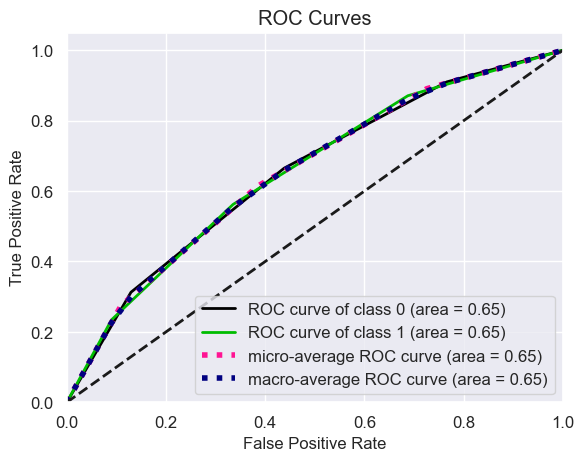

In [351]:
skplt.metrics.plot_roc(y6_test, y_prob6)

### Logistic Regression

In [352]:
from sklearn.linear_model import LogisticRegression

m62 = LogisticRegression()
m62.fit(X6_train, y6_train)
y_p62 = m62.predict(X6_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression:",accuracy_score(y6_test, y_p62) * 100)

Accuracy Score of Logistic Regression: 53.315926892950394


In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers622 = ['newton-cg', 'lbfgs', 'liblinear']
penalty622 = ['l2']
c_values622 = [100, 10, 1.0, 0.1, 0.01]

params622 = dict(solver=solvers622, penalty=penalty622, C=c_values622)
cv622 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g622 = GridSearchCV(estimator=LogisticRegression(), param_grid=params622, n_jobs=-1, cv=cv622, scoring='accuracy', error_score=0)
g622.fit(X6_train, y6_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [354]:
g622.best_score_ * 100

55.46254607887694

In [355]:
print(classification_report(y6_test, y_p62))

              precision    recall  f1-score   support

           0       0.55      0.47      0.51       979
           1       0.52      0.60      0.56       936

    accuracy                           0.53      1915
   macro avg       0.54      0.53      0.53      1915
weighted avg       0.54      0.53      0.53      1915



In [356]:
confusion_matrix(y6_test, y_p62)

array([[463, 516],
       [378, 558]], dtype=int64)

In [357]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [358]:
y_prob62 = m62.predict_proba(X6_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

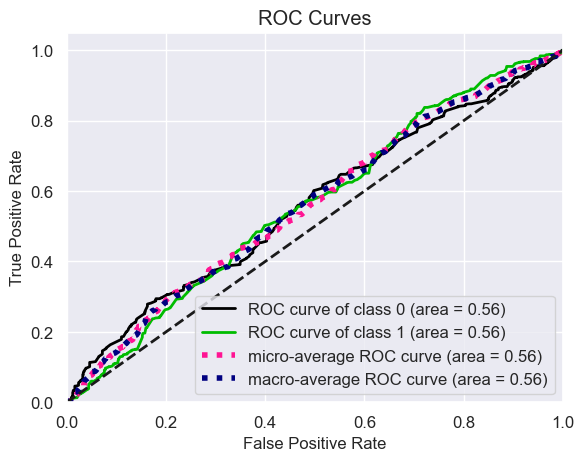

In [359]:
skplt.metrics.plot_roc(y6_test, y_prob62)

### Decision Tree

In [360]:
from sklearn.tree import DecisionTreeClassifier

m63 = DecisionTreeClassifier()
m63.fit(X6_train, y6_train)

m63.score(X6_test, y6_test) * 100

68.51174934725849

In [361]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

criterions633 = ['gini','entropy']
# n_estimators13 = [10, 100, 1000]
max_features633 = ['sqrt', 'log2']
min_splits633 = [2,4,6,8,10,14,18,20]

params633 = dict(max_features=max_features633, criterion=criterions633, min_samples_split=min_splits633)
cv633 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
g633 = GridSearchCV(DecisionTreeClassifier(), param_grid=params633, cv=cv633, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g633.fit(X6_train, y6_train)

Fitting 50 folds for each of 32 candidates, totalling 1600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20]},
             scoring='accuracy', verbose=3)

In [362]:
g633.best_score_ * 100

66.17919709134979

In [363]:
y_p63 = m63.predict(X6_test)

In [364]:
print(classification_report(y6_test, y_p63))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       979
           1       0.64      0.80      0.71       936

    accuracy                           0.69      1915
   macro avg       0.70      0.69      0.68      1915
weighted avg       0.70      0.69      0.68      1915



In [365]:
confusion_matrix(y6_test, y_p63)

array([[562, 417],
       [186, 750]], dtype=int64)

In [366]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [367]:
y_prob63 = m63.predict_proba(X6_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

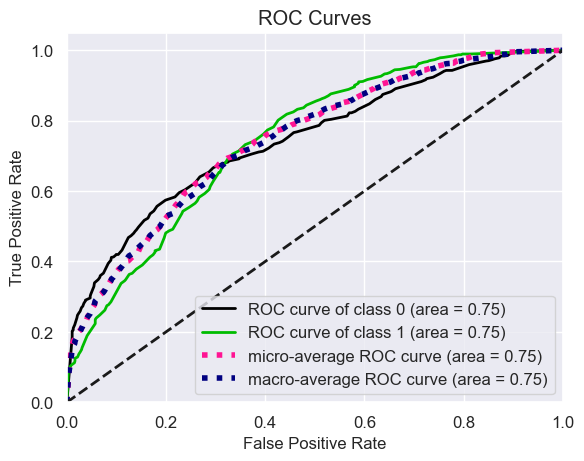

In [368]:
skplt.metrics.plot_roc(y6_test, y_prob63)

### Random Forest

In [369]:
from sklearn.ensemble import RandomForestClassifier

m64 = RandomForestClassifier()
m64.fit(X6_train, y6_train)

m64.score(X6_test, y6_test) * 100

68.35509138381201

In [370]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

criterions644 = ['gini','entropy']
n_estimators644 = [10, 100, 1000]
max_features644 = ['sqrt', 'log2']
min_splits644 = [2,4,6,8,10,14,18,20]

params644 = dict(n_estimators=n_estimators644, max_features=max_features644, criterion=criterions644, min_samples_split=min_splits644)
cv644 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g644 = GridSearchCV(RandomForestClassifier(), param_grid=params644, cv=cv644, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g644.fit(X6_train, y6_train)

Fitting 30 folds for each of 96 candidates, totalling 2880 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=3)

In [371]:
g644.best_score_ * 100

66.4344089279402

In [372]:
y_prob644 = g644.predict_proba(X6_test)

In [449]:
y_p64 = m64.predict(X6_test)

In [450]:
print(classification_report(y6_test, y_p64))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       979
           1       0.64      0.80      0.71       936

    accuracy                           0.68      1915
   macro avg       0.70      0.69      0.68      1915
weighted avg       0.70      0.68      0.68      1915



In [451]:
confusion_matrix(y6_test, y_p64)

array([[560, 419],
       [187, 749]], dtype=int64)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

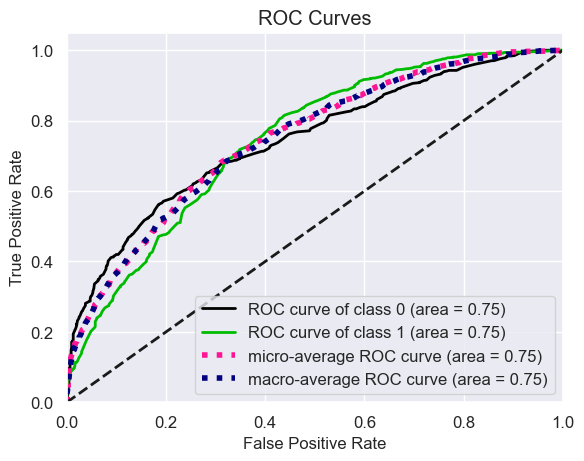

In [373]:
skplt.metrics.plot_roc(y6_test, y_prob644)

### SVM

In [452]:
from sklearn.svm import SVC

m65 = SVC(kernel='linear', probability=True)
m65.fit(X6_train, y6_train)

m65.score(X6_test, y6_test) * 100

53.73368146214099

In [453]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

kernel655 = ['poly', 'rbf', 'sigmoid']
C655 = [50, 10, 1.0, 0.1, 0.01]
gamma655 = ['scale']

p655 = dict(kernel=kernel655, C=C655, gamma=gamma655)
cv655 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g655 = GridSearchCV(estimator=SVC(), param_grid=p655, n_jobs=-1, cv=cv655, scoring='accuracy', error_score=0)
g655.fit(X6_train, y6_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [454]:
g655.best_score_ * 100

55.4277533707014

In [455]:
y_p65 = g655.predict(X6_test)

In [456]:
print(classification_report(y6_test, y_p65))

              precision    recall  f1-score   support

           0       0.62      0.30      0.40       979
           1       0.52      0.81      0.63       936

    accuracy                           0.55      1915
   macro avg       0.57      0.55      0.52      1915
weighted avg       0.57      0.55      0.51      1915



In [457]:
confusion_matrix(y6_test, y_p65)

array([[289, 690],
       [180, 756]], dtype=int64)

In [458]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [459]:
y_prob65 = m65.predict_proba(X6_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

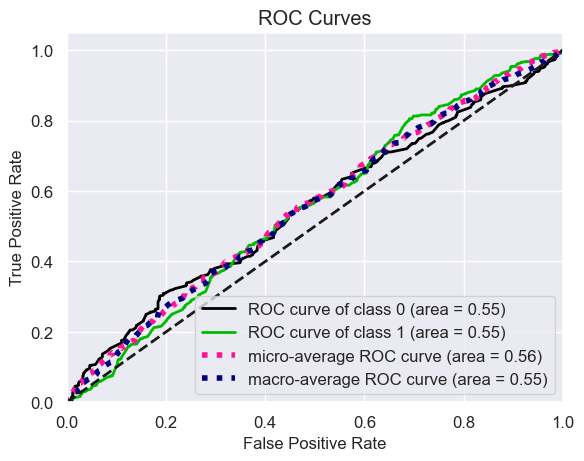

In [460]:
skplt.metrics.plot_roc(y6_test, y_prob65)

### Naive Bayes

In [461]:
from sklearn.naive_bayes import GaussianNB

m66 = GaussianNB()
m66.fit(X6_train, y6_train)

m66.score(X6_test, y6_test) * 100

55.30026109660574

In [462]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method666 = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=42)
params_NB666 = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

g666 = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB666, cv=cv_method666, verbose=3, scoring='accuracy', n_jobs=-1)
# Data_transformed = PowerTransformer().fit_transform(X12_train)
g666.fit(X6_train, y6_train)

Fitting 15 folds for each of 14 candidates, totalling 210 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='accuracy', verbose=3)

In [463]:
g666.best_score_ * 100

55.9501015375689

In [464]:
y_p66 = g666.predict(X6_test)

In [465]:
print(classification_report(y6_test, y_p66))

              precision    recall  f1-score   support

           0       0.58      0.48      0.52       979
           1       0.54      0.63      0.58       936

    accuracy                           0.55      1915
   macro avg       0.56      0.55      0.55      1915
weighted avg       0.56      0.55      0.55      1915



In [466]:
confusion_matrix(y6_test, y_p66)

array([[469, 510],
       [346, 590]], dtype=int64)

In [467]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [468]:
y_prob66 = g666.predict_proba(X6_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

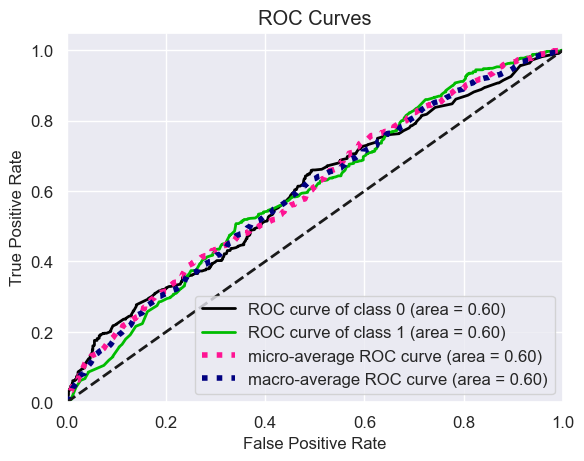

In [469]:
skplt.metrics.plot_roc(y6_test, y_prob66)

In [470]:
oversampling_SMOTETomek6 = {
    "KNN": m61.score(X6_test, y6_test) * 100, 
    "Logistic Regression": m62.score(X6_test, y6_test) * 100,
    "Decision Tree": m63.score(X6_test, y6_test) * 100,
    "Random Forest": m64.score(X6_test, y6_test) * 100,
    "SVM": m65.score(X6_test, y6_test) * 100,
    "Naive Bayes": m66.score(X6_test, y6_test) * 100
}

oversampling_SMOTETomek6

{'KNN': 61.4621409921671,
 'Logistic Regression': 53.315926892950394,
 'Decision Tree': 68.51174934725849,
 'Random Forest': 68.35509138381201,
 'SVM': 53.73368146214099,
 'Naive Bayes': 55.30026109660574}

In [471]:
oversampling_SMOTETomek_with_HyperParameterTuning6 = {
    "KNN": g611.best_score_ * 100, 
    "Logistic Regression": g622.best_score_ * 100,
    "Decision Tree": g633.best_score_ * 100,
    "Random Forest": g644.best_score_ * 100,
    "SVM": g655.best_score_ * 100,
    "Naive Bayes": g666.best_score_ * 100
}

oversampling_SMOTETomek_with_HyperParameterTuning6

{'KNN': 65.04786143513608,
 'Logistic Regression': 55.46254607887694,
 'Decision Tree': 66.17919709134979,
 'Random Forest': 66.4344089279402,
 'SVM': 55.4277533707014,
 'Naive Bayes': 55.9501015375689}

In [472]:
res6 = pd.DataFrame([oversampling_SMOTETomek6, oversampling_SMOTETomek_with_HyperParameterTuning6], index=["oversampling_SMOTETomek6", "oversampling_SMOTETomek_with_HyperParameterTuning6"])

In [473]:
res6

KNN  \
oversampling_SMOTETomek6                            61.462141   
oversampling_SMOTETomek_with_HyperParameterTuning6  65.047861   

                                                    Logistic Regression  \
oversampling_SMOTETomek6                                      53.315927   
oversampling_SMOTETomek_with_HyperParameterTuning6            55.462546   

                                                    Decision Tree  \
oversampling_SMOTETomek6                                68.511749   
oversampling_SMOTETomek_with_HyperParameterTuning6      66.179197   

                                                    Random Forest        SVM  \
oversampling_SMOTETomek6                                68.355091  53.733681   
oversampling_SMOTETomek_with_HyperParameterTuning6      66.434409  55.427753   

                                                    Naive Bayes  
oversampling_SMOTETomek6                              55.300261  
oversampling_SMOTETomek_with_HyperParameterTuning6    55.950102

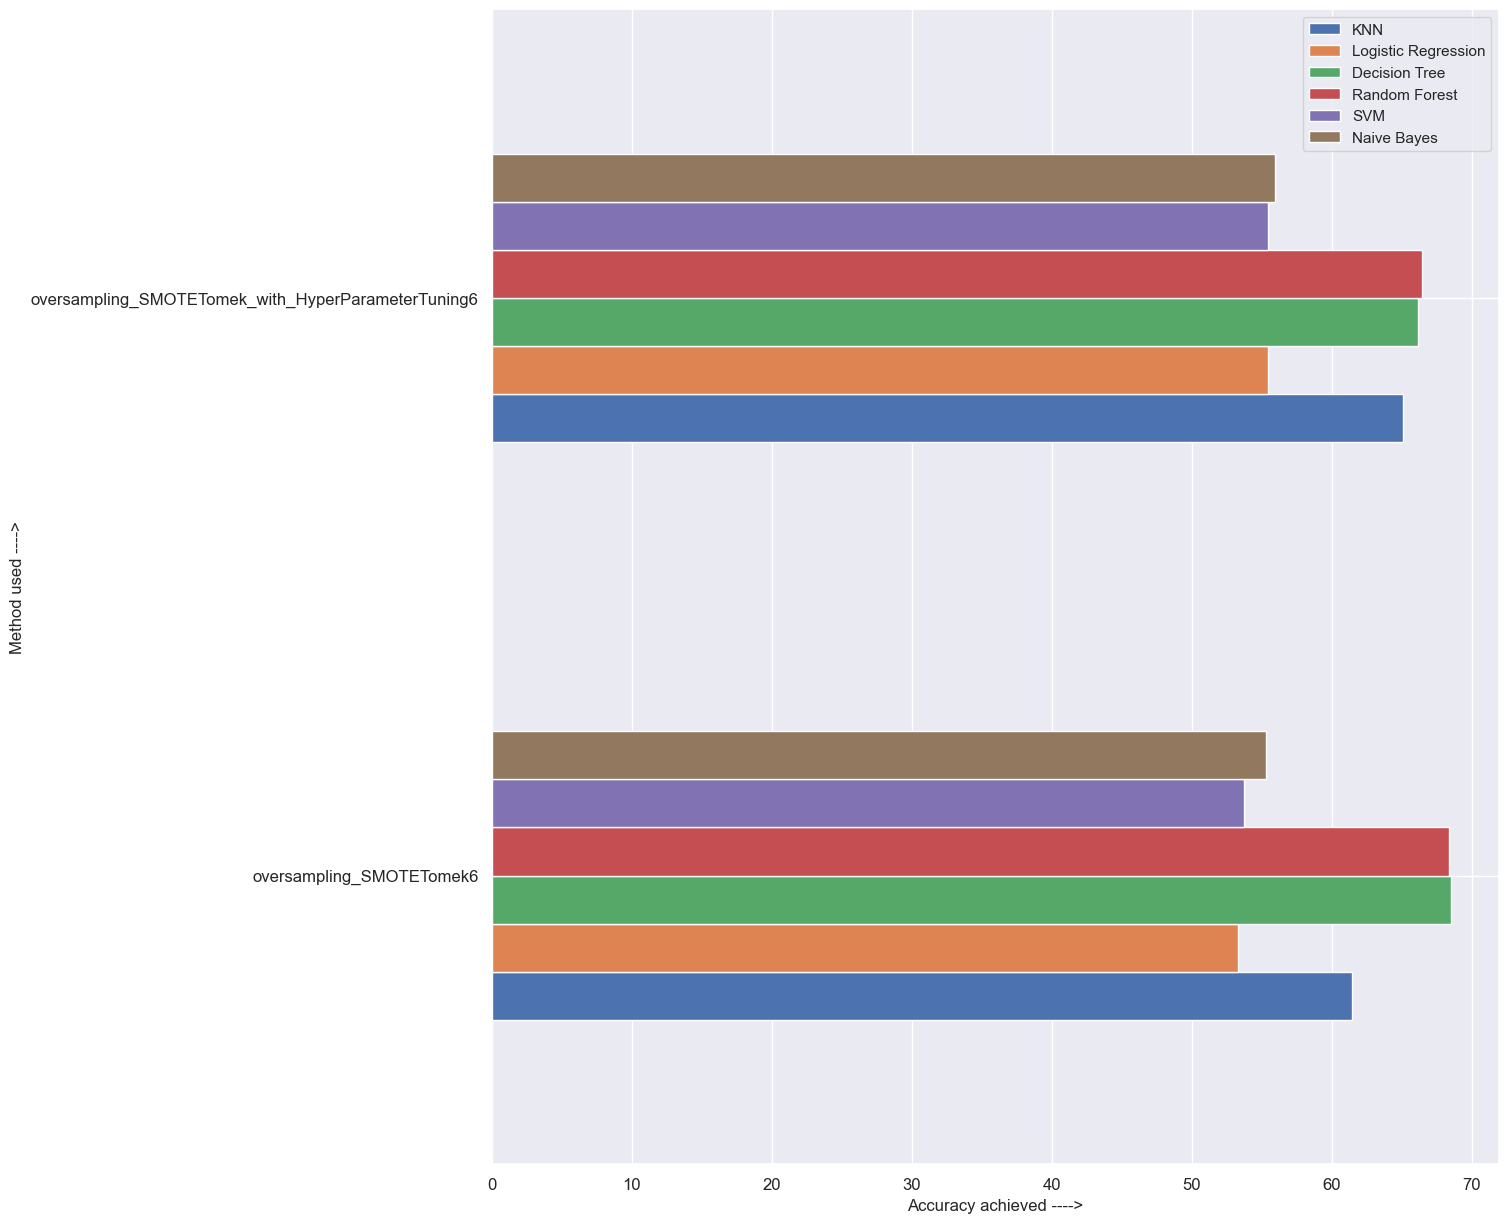

In [474]:
res6.plot(kind='barh', figsize=(13,15), legend=True, fontsize=12)
plt.xlabel("Accuracy achieved ---->")
plt.ylabel("Method used ---->")
plt.yticks(rotation=0)
plt.show()

In [475]:
import statsmodels.api as sm

X6_glm = sm.add_constant(X6_train)
model6 = sm.GLM(y6_train, X6_glm, family = sm.families.Binomial())
results6 = model6.fit()
summary6 = results6.summary()
summary6

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   loan   No. Observations:                 5745
Model:                            GLM   Df Residuals:                     5740
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3944.8
Date:                Mon, 06 Nov 2023   Deviance:                       7889.7
Time:                        14:27:04   Pearson chi2:                 5.75e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01284
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0446      0.180      5.810      0.000       0.692       1.397
age                -0.0141      0.003     -4.849      0.000      -0.020      -0.008
education          -0.0362      0.038     -0.957      0.338      -0.110       0.038
marital_married    -0.3050      0.081     -3.773      0.000      -0.463      -0.147
marital_single     -0.7771      0.098     -7.947      0.000      -0.969      -0.585
===================================================================================
"""

In [476]:
df_glm6 = pd.DataFrame(X6_train, columns=df6.drop('loan', axis=1).columns)
df_glm6

age  education  marital_married  marital_single
4610  35.000000          2                0               0
5952  51.000000          3                1               0
6548  34.000000          1                1               0
2799  43.000000          3                1               0
1170  58.000000          3                1               0
...         ...        ...              ...             ...
5226  40.000000          2                1               0
5390  40.708856          1                1               0
860   58.000000          1                1               0
7603  26.082779          2                1               0
7270  40.000000          3                1               0

[5745 rows x 4 columns]

In [477]:
p_values6 = results6.pvalues
p_values6

const              6.229105e-09
age                1.242210e-06
education          3.383390e-01
marital_married    1.610733e-04
marital_single     1.911307e-15
dtype: float64

In [478]:
p_values_df6 = pd.DataFrame({
    'Feature': df_glm6.columns, 
    'P-Value': p_values6[1:]})

print("Logistic Regression Summary:")
print(summary6)
print("\nP-Values for Coefficients:")
print(p_values_df6)
print("\nSignificant independent variables(P-Value < 0.05):")
print(p_values_df6[p_values_df6['P-Value'] < 0.05])

Logistic Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   loan   No. Observations:                 5745
Model:                            GLM   Df Residuals:                     5740
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3944.8
Date:                Mon, 06 Nov 2023   Deviance:                       7889.7
Time:                        14:27:04   Pearson chi2:                 5.75e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01284
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const        

### Q3) b) Impact of age, marital status or education on deposit 

In [122]:
df2

age            job  marital  education  default  balance  housing  \
0     30.0     unemployed  married          1        0   1787.0        0   
1     33.0       services  married          2        0   3596.5        1   
2     35.0     management   single          3        0   1350.0        1   
3     30.0     management  married          3        0   1476.0        1   
4     59.0    blue-collar  married          2        0      0.0        1   
...    ...            ...      ...        ...      ...      ...      ...   
4516  33.0       services  married          2        0   -333.0        1   
4517  57.0  self-employed  married          3        1  -2047.5        1   
4518  57.0     technician  married          2        0    295.0        0   
4519  28.0    blue-collar  married          2        0   1137.0        0   
4520  44.0   entrepreneur   single          3        0   1136.0        1   

      loan  contact   day month  duration  campaign  pdays  previous  \
0        0        1  19.0   oct      79.0       1.0     -1         0   
1        1        1  11.0   may     220.0       1.0    339         4   
2        0        1  16.0   apr     185.0       1.0    330         1   
3        1        0   3.0   jun     199.0       4.0     -1         0   
4        0        0   5.0   may     226.0       1.0     -1         0   
...    ...      ...   ...   ...       ...       ...    ...       ...   
4516     0        1  30.0   jul     329.0       5.0     -1         0   
4517     1        0   9.0   may     153.0       1.0     -1         0   
4518     0        1  19.0   aug     151.0       6.0     -1         0   
4519     0        1   6.0   feb     129.0       4.0    211         3   
4520     1        1   3.0   apr     345.0       2.0    249         7   

      poutcome  y  
0            0  0  
1            0  0  
2            0  0  
3            0  0  
4            0  0  
...        ... ..  
4516         0  0  
4517         0  0  
4518         0  0  
4519         0  0  
4520         0  0  

[4521 rows x 17 columns]

In [123]:
df7 = df2[['age', 'marital', 'education','y']]
df7

age  marital  education  y
0     30.0  married          1  0
1     33.0  married          2  0
2     35.0   single          3  0
3     30.0  married          3  0
4     59.0  married          2  0
...    ...      ...        ... ..
4516  33.0  married          2  0
4517  57.0  married          3  0
4518  57.0  married          2  0
4519  28.0  married          2  0
4520  44.0   single          3  0

[4521 rows x 4 columns]

In [124]:
df7['y'].value_counts()

y
0    4000
1     521
Name: count, dtype: int64

In [125]:
pd.set_option('display.max_columns', None)

df8 = pd.get_dummies(df7, drop_first=True)

In [126]:
df8

age  education  y  marital_married  marital_single
0     30.0          1  0             True           False
1     33.0          2  0             True           False
2     35.0          3  0            False            True
3     30.0          3  0             True           False
4     59.0          2  0             True           False
...    ...        ... ..              ...             ...
4516  33.0          2  0             True           False
4517  57.0          3  0             True           False
4518  57.0          2  0             True           False
4519  28.0          2  0             True           False
4520  44.0          3  0            False            True

[4521 rows x 5 columns]

In [127]:
df8.replace({False: 0, True: 1}, inplace=True)

In [128]:
df8

age  education  y  marital_married  marital_single
0     30.0          1  0                1               0
1     33.0          2  0                1               0
2     35.0          3  0                0               1
3     30.0          3  0                1               0
4     59.0          2  0                1               0
...    ...        ... ..              ...             ...
4516  33.0          2  0                1               0
4517  57.0          3  0                1               0
4518  57.0          2  0                1               0
4519  28.0          2  0                1               0
4520  44.0          3  0                0               1

[4521 rows x 5 columns]

In [129]:
X8 = df8.drop('y', axis=1)
y8 = df8['y']

In [130]:
from sklearn.preprocessing import StandardScaler

scaler8 = StandardScaler()
X8_res = scaler8.fit_transform(X8)

In [131]:
X8_res

array([[-1.06791403, -1.36512338,  0.78509534, -0.59974932],
       [-0.77989068, -0.08441726,  0.78509534, -0.59974932],
       [-0.58787512,  1.19628886, -1.27373066,  1.66736329],
       ...,
       [ 1.52429608, -0.08441726,  0.78509534, -0.59974932],
       [-1.25992959, -0.08441726,  0.78509534, -0.59974932],
       [ 0.27619491,  1.19628886, -1.27373066,  1.66736329]])

In [132]:
from imblearn.combine import SMOTETomek

smk8 = SMOTETomek(random_state=42)
X8_res, y8_res = smk8.fit_resample(X8, y8)

In [133]:
from collections import Counter

print("Old : ", Counter(y8))
print("New : ", Counter(y8_res))

Old :  Counter({0: 4000, 1: 521})
New :  Counter({0: 3997, 1: 3997})


In [134]:
from sklearn.model_selection import train_test_split

X8_train, X8_test, y8_train, y8_test = train_test_split(X8_res, y8_res, test_size=0.25, random_state=42)

In [135]:
X8_train.shape

(5995, 4)

In [136]:
y8_train.shape

(5995,)

In [137]:
X8_test.shape

(1999, 4)

In [138]:
y8_test.shape

(1999,)

### KNN 

In [399]:
from sklearn.neighbors import KNeighborsClassifier

m81 = KNeighborsClassifier(n_neighbors=3)
m81.fit(X8_train, y8_train)
y_p81 = m81.predict(X8_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score of KNN:",accuracy_score(y8_test, y_p81) * 100)

Accuracy Score of KNN: 65.78289144572285


In [400]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [401]:
n_neighbors811 = range(1, 21)
weights811 = ['uniform', 'distance']
metric811 = ['euclidean', 'manhattan', 'minkowski']

para811 = dict(n_neighbors=n_neighbors811, weights=weights811, metric=metric811)
cv811 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g811 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=para811, n_jobs=-1, cv=cv811, scoring='accuracy', error_score=0)
g811.fit(X8_train, y8_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [402]:
g811.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [403]:
g811.best_score_ * 100

69.64129104062326

In [404]:
print(classification_report(y8_test, y_p81))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       997
           1       0.66      0.64      0.65      1002

    accuracy                           0.66      1999
   macro avg       0.66      0.66      0.66      1999
weighted avg       0.66      0.66      0.66      1999



In [405]:
confusion_matrix(y8_test, y_p81)

array([[670, 327],
       [357, 645]], dtype=int64)

In [406]:
y_prob8 = m81.predict_proba(X8_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

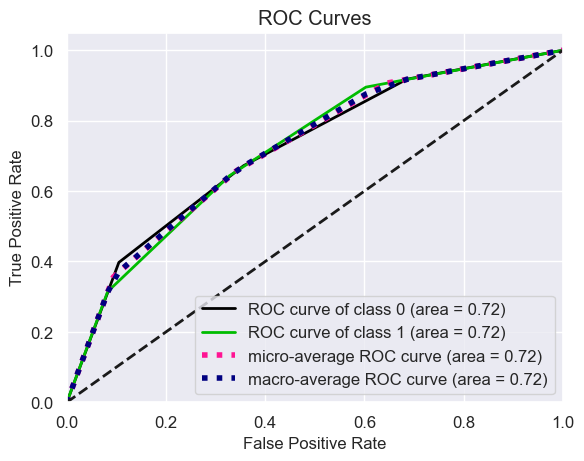

In [407]:
skplt.metrics.plot_roc(y8_test, y_prob8)

### Logistic Regression

In [408]:
from sklearn.linear_model import LogisticRegression

m82 = LogisticRegression()
m82.fit(X8_train, y8_train)
y_p82 = m82.predict(X8_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression:",accuracy_score(y8_test, y_p82) * 100)

Accuracy Score of Logistic Regression: 56.57828914457229


In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers822 = ['newton-cg', 'lbfgs', 'liblinear']
penalty822 = ['l2']
c_values822 = [100, 10, 1.0, 0.1, 0.01]

params822 = dict(solver=solvers822, penalty=penalty822, C=c_values822)
cv822 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g822 = GridSearchCV(estimator=LogisticRegression(), param_grid=params822, n_jobs=-1, cv=cv822, scoring='accuracy', error_score=0)
g822.fit(X8_train, y8_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [410]:
g822.best_score_ * 100

57.82589501020219

In [411]:
#y_p82 = g666.predict(X6_test)

In [412]:
print(classification_report(y8_test, y_p82))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       997
           1       0.57      0.54      0.55      1002

    accuracy                           0.57      1999
   macro avg       0.57      0.57      0.57      1999
weighted avg       0.57      0.57      0.57      1999



In [413]:
confusion_matrix(y8_test, y_p82)

array([[594, 403],
       [465, 537]], dtype=int64)

In [117]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [415]:
y_prob82 = g822.predict_proba(X8_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

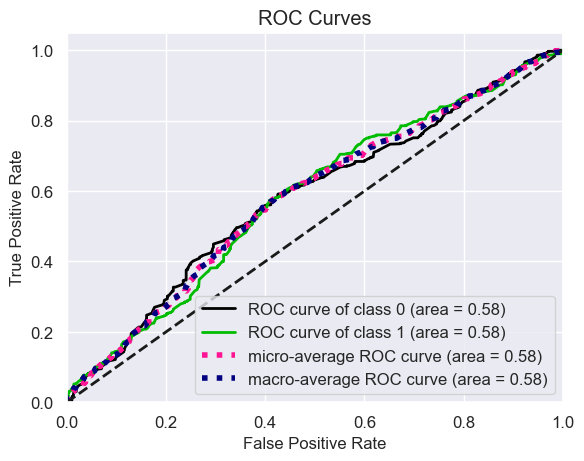

In [416]:
skplt.metrics.plot_roc(y8_test, y_prob82)

### Decision Tree

In [417]:
from sklearn.tree import DecisionTreeClassifier

m83 = DecisionTreeClassifier()
m83.fit(X8_train, y8_train)

m83.score(X8_test, y8_test) * 100

72.0360180090045

In [418]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

criterions833 = ['gini','entropy']
# n_estimators13 = [10, 100, 1000]
max_features833 = ['sqrt', 'log2']
min_splits833 = [2,4,6,8,10,14,18,20]

params833 = dict(max_features=max_features833, criterion=criterions833, min_samples_split=min_splits833)
cv833 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
g833 = GridSearchCV(DecisionTreeClassifier(), param_grid=params833, cv=cv833, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g833.fit(X8_train, y8_train)

Fitting 50 folds for each of 32 candidates, totalling 1600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20]},
             scoring='accuracy', verbose=3)

In [419]:
g833.best_score_ * 100

71.68659432387311

In [420]:
y_p83 = m83.predict(X8_test)

In [421]:
print(classification_report(y8_test, y_p83))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       997
           1       0.72      0.73      0.72      1002

    accuracy                           0.72      1999
   macro avg       0.72      0.72      0.72      1999
weighted avg       0.72      0.72      0.72      1999



In [422]:
confusion_matrix(y8_test, y_p83)

array([[709, 288],
       [271, 731]], dtype=int64)

In [116]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [424]:
y_prob83 = m83.predict_proba(X8_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

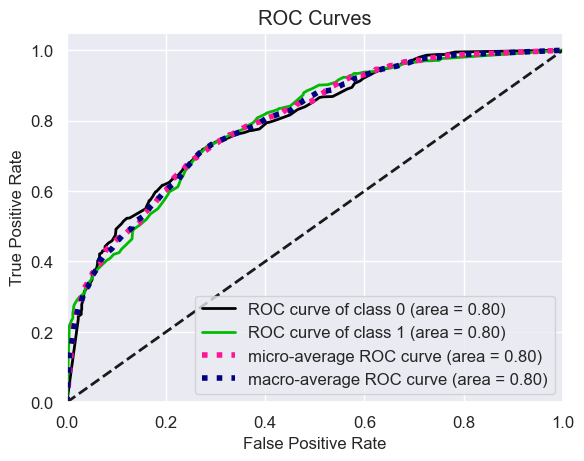

In [425]:
skplt.metrics.plot_roc(y8_test, y_prob83)

### Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier

m84 = RandomForestClassifier()
m84.fit(X8_train, y8_train)

m84.score(X8_test, y8_test) * 100

71.53576788394197

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

criterions844 = ['gini','entropy']
n_estimators844 = [10, 100, 1000]
max_features844 = ['sqrt', 'log2']
min_splits844 = [2,4,6,8,10,14,18,20]

params844 = dict(n_estimators=n_estimators844, max_features=max_features844, criterion=criterions844, min_samples_split=min_splits844)
cv844 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g844 = GridSearchCV(RandomForestClassifier(), param_grid=params844, cv=cv844, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g844.fit(X8_train, y8_train)

Fitting 30 folds for each of 96 candidates, totalling 2880 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=3)

In [178]:
g844.best_score_ * 100

71.55965498052308

In [179]:
y_prob844 = g844.predict_proba(X8_test)

In [180]:
y_p844 = g844.predict(X8_test)

In [181]:
print(classification_report(y8_test, y_p844))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       997
           1       0.71      0.73      0.72      1002

    accuracy                           0.71      1999
   macro avg       0.71      0.71      0.71      1999
weighted avg       0.71      0.71      0.71      1999



In [182]:
confusion_matrix(y8_test, y_p844)

array([[692, 305],
       [270, 732]], dtype=int64)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

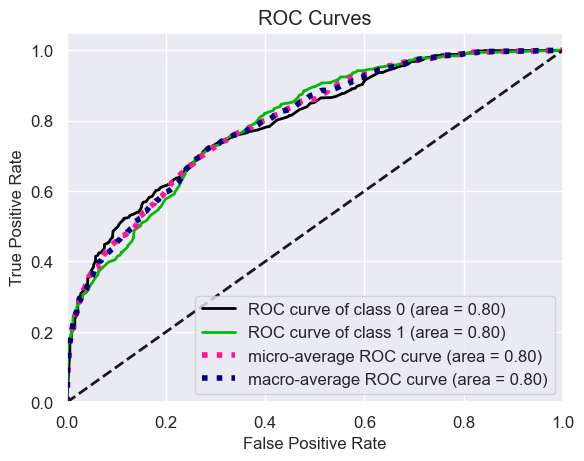

In [167]:
skplt.metrics.plot_roc(y8_test, y_prob844)

### SVM

In [481]:
from sklearn.svm import SVC

m85 = SVC(kernel='linear', probability=True)
m85.fit(X8_train, y8_train)

m85.score(X8_test, y8_test) * 100

55.77788894447223

In [482]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

kernel855 = ['poly', 'rbf', 'sigmoid']
C855 = [50, 10, 1.0, 0.1, 0.01]
gamma855 = ['scale']

p855 = dict(kernel=kernel855, C=C855, gamma=gamma855)
cv855 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g855 = GridSearchCV(estimator=SVC(), param_grid=p855, n_jobs=-1, cv=cv855, scoring='accuracy', error_score=0)
g855.fit(X8_train, y8_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [483]:
g855.best_score_ * 100

57.69240400667779

In [484]:
y_p855 = g855.predict(X8_test)

In [485]:
print(classification_report(y8_test, y_p855))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       997
           1       0.58      0.54      0.56      1002

    accuracy                           0.58      1999
   macro avg       0.58      0.58      0.58      1999
weighted avg       0.58      0.58      0.58      1999



In [486]:
confusion_matrix(y8_test, y_p855)

array([[611, 386],
       [460, 542]], dtype=int64)

In [487]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [489]:
y_prob855 = m85.predict_proba(X8_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

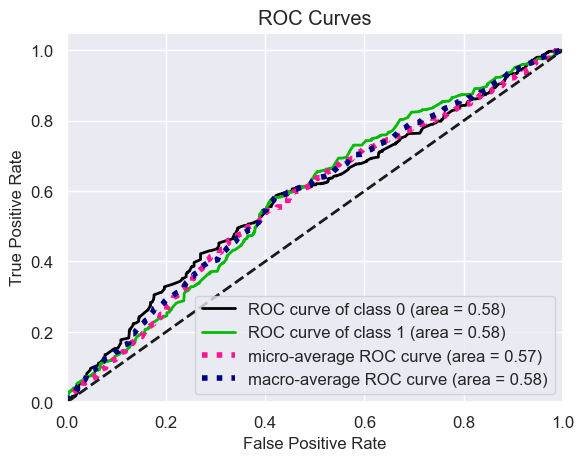

In [490]:
skplt.metrics.plot_roc(y8_test, y_prob855)

### Naive Bayes

In [491]:
from sklearn.naive_bayes import GaussianNB

m86 = GaussianNB()
m86.fit(X8_train, y8_train)

m86.score(X8_test, y8_test) * 100

56.67833916958479

In [492]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method866 = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=42)
params_NB866 = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

g866 = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB866, cv=cv_method866, verbose=3, scoring='accuracy', n_jobs=-1)
# Data_transformed = PowerTransformer().fit_transform(X12_train)
g866.fit(X8_train, y8_train)

Fitting 15 folds for each of 14 candidates, totalling 210 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='accuracy', verbose=3)

In [493]:
g866.best_score_ * 100

56.70836808451488

In [494]:
y_p866 = g866.predict(X8_test)

In [495]:
print(classification_report(y8_test, y_p866))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       997
           1       0.57      0.57      0.57      1002

    accuracy                           0.57      1999
   macro avg       0.57      0.57      0.57      1999
weighted avg       0.57      0.57      0.57      1999



In [496]:
confusion_matrix(y8_test, y_p866)

array([[566, 431],
       [435, 567]], dtype=int64)

In [497]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [498]:
y_prob866 = g866.predict_proba(X8_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

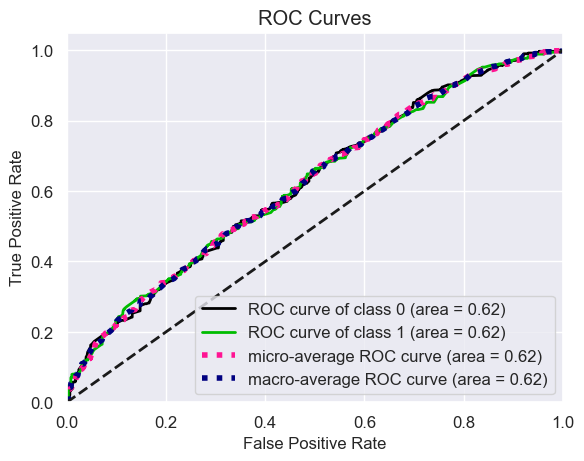

In [499]:
skplt.metrics.plot_roc(y8_test, y_prob866)

In [500]:
oversampling_SMOTETomek8 = {
    "KNN": m81.score(X8_test, y8_test) * 100, 
    "Logistic Regression": m82.score(X8_test, y8_test) * 100,
    "Decision Tree": m83.score(X8_test, y8_test) * 100,
    "Random Forest": m84.score(X8_test, y8_test) * 100,
    "SVM": m85.score(X8_test, y8_test) * 100,
    "Naive Bayes": m86.score(X8_test, y8_test) * 100
}

oversampling_SMOTETomek8

{'KNN': 65.78289144572285,
 'Logistic Regression': 56.57828914457229,
 'Decision Tree': 72.0360180090045,
 'Random Forest': 71.38569284642321,
 'SVM': 55.77788894447223,
 'Naive Bayes': 56.67833916958479}

In [501]:
oversampling_SMOTETomek_with_HyperParameterTuning8 = {
    "KNN": g811.best_score_ * 100, 
    "Logistic Regression": g822.best_score_ * 100,
    "Decision Tree": g833.best_score_ * 100,
    "Random Forest": g844.best_score_ * 100,
    "SVM": g855.best_score_ * 100,
    "Naive Bayes": g866.best_score_ * 100
}

oversampling_SMOTETomek_with_HyperParameterTuning8

{'KNN': 69.64129104062326,
 'Logistic Regression': 57.82589501020219,
 'Decision Tree': 71.68659432387311,
 'Random Forest': 71.51515488777592,
 'SVM': 57.69240400667779,
 'Naive Bayes': 56.70836808451488}

In [502]:
res8 = pd.DataFrame([oversampling_SMOTETomek8, oversampling_SMOTETomek_with_HyperParameterTuning8], index=["oversampling_SMOTETomek8", "oversampling_SMOTETomek_with_HyperParameterTuning8"])

In [503]:
res8

KNN  \
oversampling_SMOTETomek8                            65.782891   
oversampling_SMOTETomek_with_HyperParameterTuning8  69.641291   

                                                    Logistic Regression  \
oversampling_SMOTETomek8                                      56.578289   
oversampling_SMOTETomek_with_HyperParameterTuning8            57.825895   

                                                    Decision Tree  \
oversampling_SMOTETomek8                                72.036018   
oversampling_SMOTETomek_with_HyperParameterTuning8      71.686594   

                                                    Random Forest        SVM  \
oversampling_SMOTETomek8                                71.385693  55.777889   
oversampling_SMOTETomek_with_HyperParameterTuning8      71.515155  57.692404   

                                                    Naive Bayes  
oversampling_SMOTETomek8                              56.678339  
oversampling_SMOTETomek_with_HyperParameterTuning8    56.708368

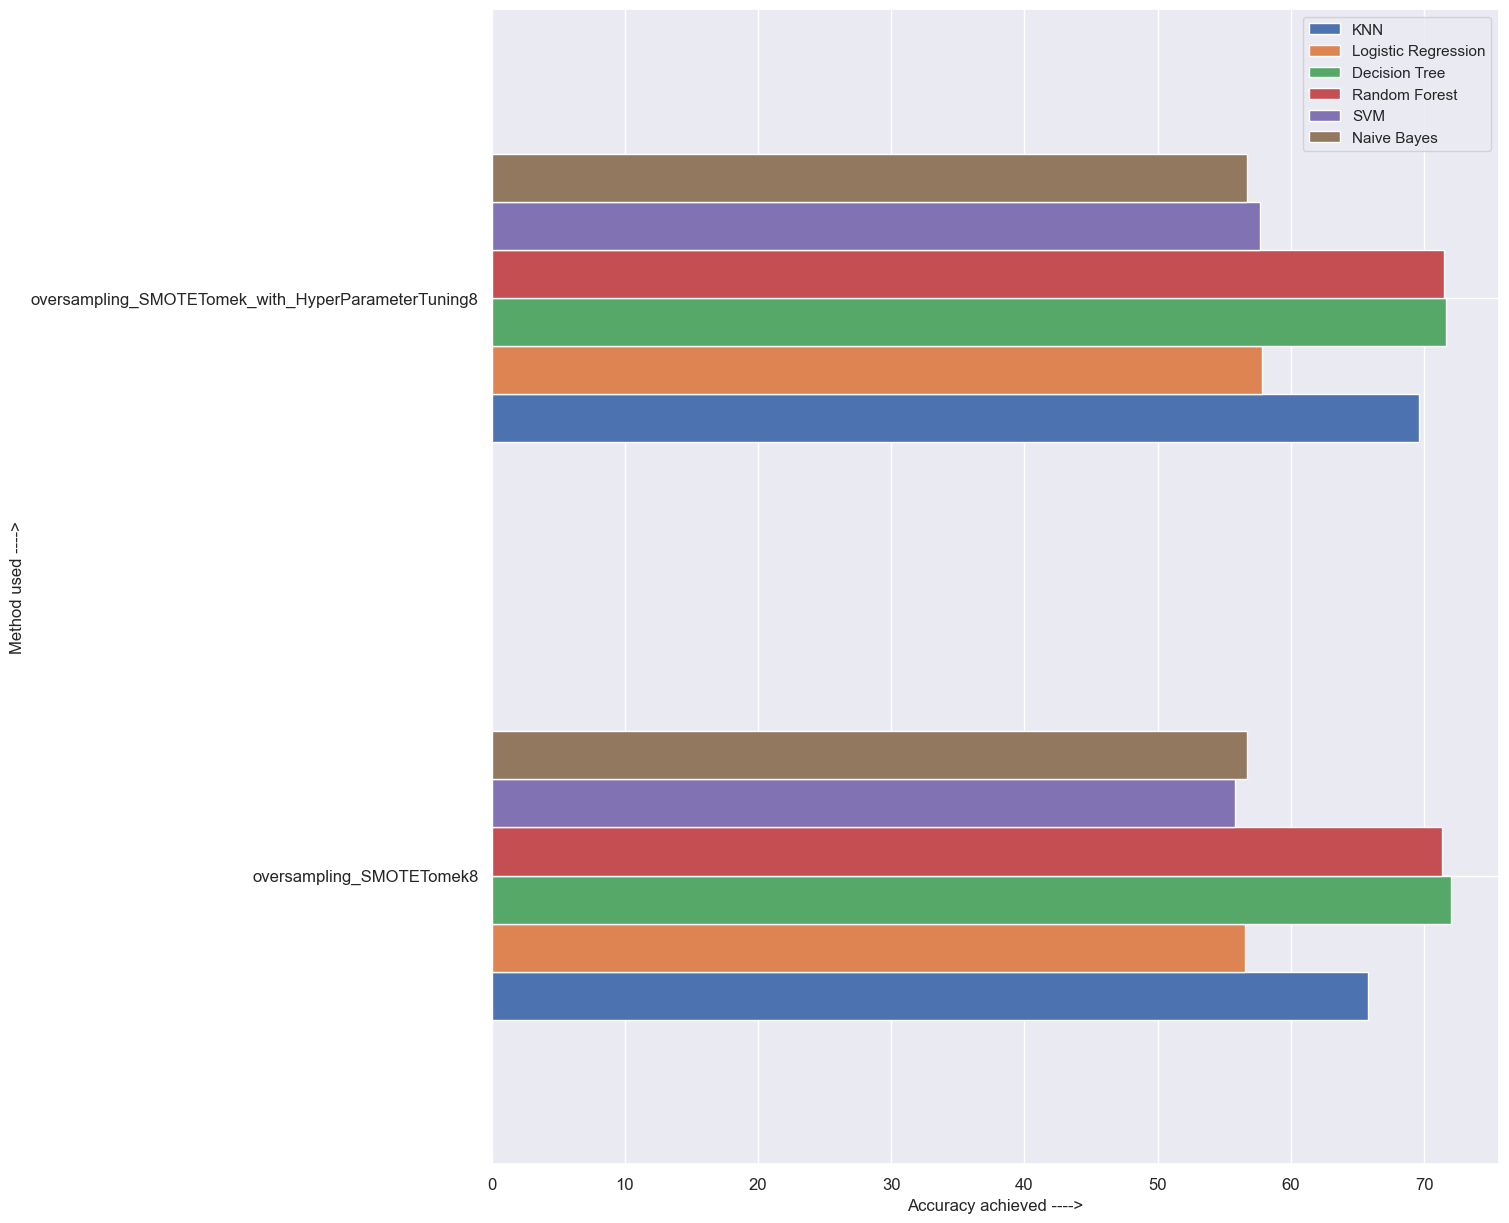

In [504]:
res8.plot(kind='barh', figsize=(13,15), legend=True, fontsize=12)
plt.xlabel("Accuracy achieved ---->")
plt.ylabel("Method used ---->")
plt.yticks(rotation=0)
plt.show()

In [505]:
import statsmodels.api as sm

X8_glm = sm.add_constant(X8_train)
model8 = sm.GLM(y8_train, X8_glm, family = sm.families.Binomial())
results8 = model8.fit()
summary8 = results8.summary()
summary8

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5995
Model:                            GLM   Df Residuals:                     5990
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4072.3
Date:                Mon, 06 Nov 2023   Deviance:                       8144.6
Time:                        14:37:42   Pearson chi2:                 5.99e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02734
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4682      0.169     -2.766      0.006      -0.800      -0.136
age                 0.0173      0.003      6.488      0.000       0.012       0.023
education           0.1109      0.035      3.135      0.002       0.042       0.180
marital_married    -0.7468      0.077     -9.653      0.000      -0.898      -0.595
marital_single     -0.2093      0.092     -2.275      0.023      -0.390      -0.029
===================================================================================
"""

In [506]:
df_glm8 = pd.DataFrame(X8_train, columns=df8.drop('y', axis=1).columns)
df_glm8

age  education  marital_married  marital_single
6403  38.000000          3                0               1
5220  50.000000          1                1               0
527   49.000000          2                0               0
6245  34.000000          3                0               0
7437  61.824110          3                0               0
...         ...        ...              ...             ...
5226  46.000000          2                0               0
5390  24.000000          2                0               0
860   58.000000          1                1               0
7603  28.000000          2                0               1
7270  24.927746          2                1               0

[5995 rows x 4 columns]

In [507]:
p_values8 = results8.pvalues
p_values8

const              5.674244e-03
age                8.709338e-11
education          1.717005e-03
marital_married    4.752013e-22
marital_single     2.289135e-02
dtype: float64

In [508]:
p_values_df8 = pd.DataFrame({
    'Feature': df_glm8.columns, 
    'P-Value': p_values8[1:]})

print("Logistic Regression Summary:")
print(summary8)
print("\nP-Values for Coefficients:")
print(p_values_df8)
print("\nSignificant independent variables(P-Value < 0.05):")
print(p_values_df8[p_values_df8['P-Value'] < 0.05])

Logistic Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5995
Model:                            GLM   Df Residuals:                     5990
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4072.3
Date:                Mon, 06 Nov 2023   Deviance:                       8144.6
Time:                        14:37:42   Pearson chi2:                 5.99e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02734
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const        

### Q3) c) Impact of age, marital status or education on previous marketing campaign outcome

In [121]:
df2

age            job  marital  education  default  balance  housing  \
0     30.0     unemployed  married          1        0   1787.0        0   
1     33.0       services  married          2        0   3596.5        1   
2     35.0     management   single          3        0   1350.0        1   
3     30.0     management  married          3        0   1476.0        1   
4     59.0    blue-collar  married          2        0      0.0        1   
...    ...            ...      ...        ...      ...      ...      ...   
4516  33.0       services  married          2        0   -333.0        1   
4517  57.0  self-employed  married          3        1  -2047.5        1   
4518  57.0     technician  married          2        0    295.0        0   
4519  28.0    blue-collar  married          2        0   1137.0        0   
4520  44.0   entrepreneur   single          3        0   1136.0        1   

      loan  contact   day month  duration  campaign  pdays  previous  \
0        0        1  19.0   oct      79.0       1.0     -1         0   
1        1        1  11.0   may     220.0       1.0    339         4   
2        0        1  16.0   apr     185.0       1.0    330         1   
3        1        0   3.0   jun     199.0       4.0     -1         0   
4        0        0   5.0   may     226.0       1.0     -1         0   
...    ...      ...   ...   ...       ...       ...    ...       ...   
4516     0        1  30.0   jul     329.0       5.0     -1         0   
4517     1        0   9.0   may     153.0       1.0     -1         0   
4518     0        1  19.0   aug     151.0       6.0     -1         0   
4519     0        1   6.0   feb     129.0       4.0    211         3   
4520     1        1   3.0   apr     345.0       2.0    249         7   

      poutcome  y  
0            0  0  
1            0  0  
2            0  0  
3            0  0  
4            0  0  
...        ... ..  
4516         0  0  
4517         0  0  
4518         0  0  
4519         0  0  
4520         0  0  

[4521 rows x 17 columns]

In [510]:
df9 = df2[['age', 'marital', 'education','poutcome']]
df9

age  marital  education  poutcome
0     30.0  married          1         0
1     33.0  married          2         0
2     35.0   single          3         0
3     30.0  married          3         0
4     59.0  married          2         0
...    ...      ...        ...       ...
4516  33.0  married          2         0
4517  57.0  married          3         0
4518  57.0  married          2         0
4519  28.0  married          2         0
4520  44.0   single          3         0

[4521 rows x 4 columns]

In [511]:
df9['poutcome'].value_counts()

poutcome
0    4392
1     129
Name: count, dtype: int64

In [512]:
pd.set_option('display.max_columns', None)

df10 = pd.get_dummies(df9, drop_first=True)

In [513]:
df10

age  education  poutcome  marital_married  marital_single
0     30.0          1         0             True           False
1     33.0          2         0             True           False
2     35.0          3         0            False            True
3     30.0          3         0             True           False
4     59.0          2         0             True           False
...    ...        ...       ...              ...             ...
4516  33.0          2         0             True           False
4517  57.0          3         0             True           False
4518  57.0          2         0             True           False
4519  28.0          2         0             True           False
4520  44.0          3         0            False            True

[4521 rows x 5 columns]

In [514]:
df10.replace({False: 0, True: 1}, inplace=True)

In [515]:
df10

age  education  poutcome  marital_married  marital_single
0     30.0          1         0                1               0
1     33.0          2         0                1               0
2     35.0          3         0                0               1
3     30.0          3         0                1               0
4     59.0          2         0                1               0
...    ...        ...       ...              ...             ...
4516  33.0          2         0                1               0
4517  57.0          3         0                1               0
4518  57.0          2         0                1               0
4519  28.0          2         0                1               0
4520  44.0          3         0                0               1

[4521 rows x 5 columns]

In [516]:
X10 = df10.drop('poutcome', axis=1)
y10 = df10['poutcome']

In [517]:
from sklearn.preprocessing import StandardScaler

scaler10 = StandardScaler()
X10_res = scaler10.fit_transform(X10)

In [518]:
X10_res

array([[-1.06791403, -1.36512338,  0.78509534, -0.59974932],
       [-0.77989068, -0.08441726,  0.78509534, -0.59974932],
       [-0.58787512,  1.19628886, -1.27373066,  1.66736329],
       ...,
       [ 1.52429608, -0.08441726,  0.78509534, -0.59974932],
       [-1.25992959, -0.08441726,  0.78509534, -0.59974932],
       [ 0.27619491,  1.19628886, -1.27373066,  1.66736329]])

In [519]:
from imblearn.combine import SMOTETomek

smk10 = SMOTETomek(random_state=42)
X10_res, y10_res = smk8.fit_resample(X10, y10)

In [520]:
from collections import Counter

print("Old : ", Counter(y10))
print("New : ", Counter(y10_res))

Old :  Counter({0: 4392, 1: 129})
New :  Counter({0: 4391, 1: 4391})


In [521]:
from sklearn.model_selection import train_test_split

X10_train, X10_test, y10_train, y10_test = train_test_split(X10_res, y10_res, test_size=0.25, random_state=42)

In [522]:
X10_train.shape

(6586, 4)

In [523]:
y10_train.shape

(6586,)

In [524]:
X10_test.shape

(2196, 4)

In [525]:
y10_test.shape

(2196,)

### KNN 

In [526]:
from sklearn.neighbors import KNeighborsClassifier

m101 = KNeighborsClassifier(n_neighbors=3)
m101.fit(X10_train, y10_train)
y_p101 = m101.predict(X10_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score of KNN:",accuracy_score(y10_test, y_p101) * 100)

Accuracy Score of KNN: 82.96903460837886


In [527]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [528]:
n_neighbors1011 = range(1, 21)
weights1011 = ['uniform', 'distance']
metric1011 = ['euclidean', 'manhattan', 'minkowski']

para1011 = dict(n_neighbors=n_neighbors1011, weights=weights1011, metric=metric1011)
cv1011 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g1011 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=para1011, n_jobs=-1, cv=cv1011, scoring='accuracy', error_score=0)
g1011.fit(X10_train, y10_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [529]:
g1011.best_params_

{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}

In [530]:
g1011.best_score_ * 100

83.70294865112933

In [531]:
print(classification_report(y10_test, y_p101))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1097
           1       0.84      0.81      0.83      1099

    accuracy                           0.83      2196
   macro avg       0.83      0.83      0.83      2196
weighted avg       0.83      0.83      0.83      2196



In [532]:
confusion_matrix(y10_test, y_p101)

array([[934, 163],
       [211, 888]], dtype=int64)

In [533]:
y_prob10 = m101.predict_proba(X10_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

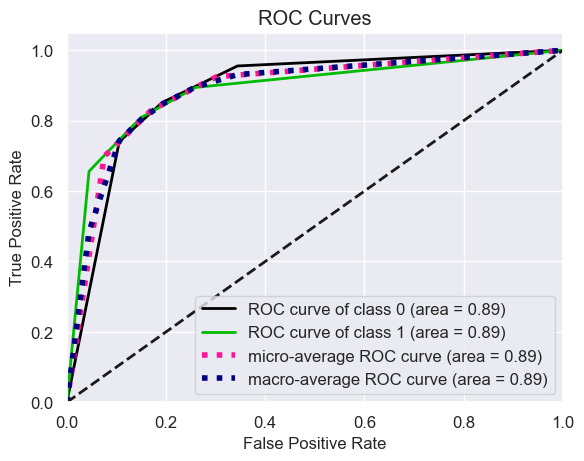

In [534]:
skplt.metrics.plot_roc(y10_test, y_prob10)

### Logistic Regression

In [557]:
from sklearn.linear_model import LogisticRegression

m102 = LogisticRegression()
m102.fit(X10_train, y10_train)
y_p102 = m102.predict(X10_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression:",accuracy_score(y10_test, y_p102) * 100)

Accuracy Score of Logistic Regression: 57.786885245901644


In [558]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers1022 = ['newton-cg', 'lbfgs', 'liblinear']
penalty1022 = ['l2']
c_values1022 = [100, 10, 1.0, 0.1, 0.01]

params1022 = dict(solver=solvers1022, penalty=penalty1022, C=c_values1022)
cv1022 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g1022 = GridSearchCV(estimator=LogisticRegression(), param_grid=params1022, n_jobs=-1, cv=cv1022, scoring='accuracy', error_score=0)
g1022.fit(X10_train, y10_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [559]:
g1022.best_score_ * 100

59.45456334472573

In [560]:
y_pred1022 = g1022.predict(X10_test)

In [561]:
y_p1022 = g1022.predict_proba(X10_test)

In [562]:
print(classification_report(y10_test, y_pred1022))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61      1097
           1       0.60      0.53      0.56      1099

    accuracy                           0.59      2196
   macro avg       0.59      0.59      0.59      2196
weighted avg       0.59      0.59      0.59      2196



In [563]:
confusion_matrix(y10_test, y_pred1022)

array([[708, 389],
       [519, 580]], dtype=int64)

In [564]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

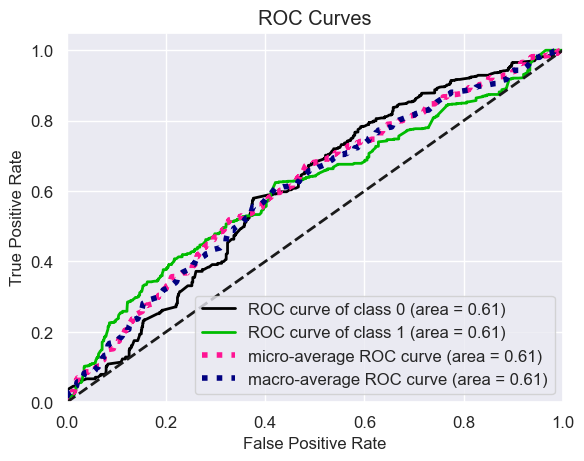

In [565]:
skplt.metrics.plot_roc(y10_test, y_p1022)

### Decision Tree

In [566]:
from sklearn.tree import DecisionTreeClassifier

m103 = DecisionTreeClassifier()
m103.fit(X10_train, y10_train)

m103.score(X10_test, y10_test) * 100

85.06375227686704

In [567]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

criterions1033 = ['gini','entropy']
# n_estimators13 = [10, 100, 1000]
max_features1033 = ['sqrt', 'log2']
min_splits1033 = [2,4,6,8,10,14,18,20]

params1033 = dict(max_features=max_features1033, criterion=criterions1033, min_samples_split=min_splits1033)
cv1033 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
g1033 = GridSearchCV(DecisionTreeClassifier(), param_grid=params1033, cv=cv1033, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g1033.fit(X10_train, y10_train)

Fitting 50 folds for each of 32 candidates, totalling 1600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20]},
             scoring='accuracy', verbose=3)

In [568]:
g1033.best_score_ * 100

85.16255171554948

In [569]:
y_p1033 = g1033.predict(X10_test)

In [570]:
print(classification_report(y10_test, y_p1033))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1097
           1       0.86      0.82      0.84      1099

    accuracy                           0.85      2196
   macro avg       0.85      0.85      0.85      2196
weighted avg       0.85      0.85      0.85      2196



In [571]:
confusion_matrix(y10_test, y_p1033)

array([[955, 142],
       [196, 903]], dtype=int64)

In [572]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [573]:
y_prob1033 = g1033.predict_proba(X10_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

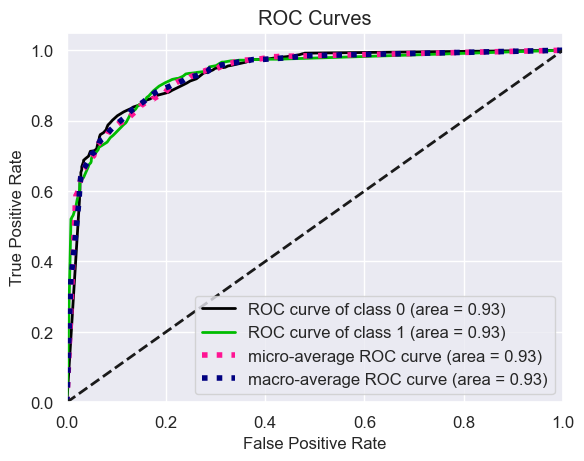

In [574]:
skplt.metrics.plot_roc(y10_test, y_prob1033)

### Random Forest

In [575]:
from sklearn.ensemble import RandomForestClassifier

m104 = RandomForestClassifier()
m104.fit(X10_train, y10_train)

m104.score(X10_test, y10_test) * 100

84.65391621129325

In [576]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

criterions1044 = ['gini','entropy']
n_estimators1044 = [10, 100, 1000]
max_features1044 = ['sqrt', 'log2']
min_splits1044 = [2,4,6,8,10,14,18,20]

params1044 = dict(n_estimators=n_estimators1044, max_features=max_features1044, criterion=criterions1044, min_samples_split=min_splits1044)
cv1044 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g1044 = GridSearchCV(RandomForestClassifier(), param_grid=params1044, cv=cv1044, verbose=3, refit=True, n_jobs=-1, scoring="accuracy")
g1044.fit(X10_train, y10_train)

Fitting 30 folds for each of 96 candidates, totalling 2880 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10, 14, 18, 20],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=3)

In [577]:
g1044.best_score_ * 100

85.14005285709672

In [610]:
y_pred1044 = g1044.predict(X10_test)

In [611]:
print(classification_report(y10_test, y_pred1044))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1097
           1       0.86      0.83      0.84      1099

    accuracy                           0.85      2196
   macro avg       0.85      0.85      0.85      2196
weighted avg       0.85      0.85      0.85      2196



In [612]:
confusion_matrix(y10_test, y_pred1044)

array([[947, 150],
       [189, 910]], dtype=int64)

In [578]:
y_prob1044 = g1044.predict_proba(X10_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

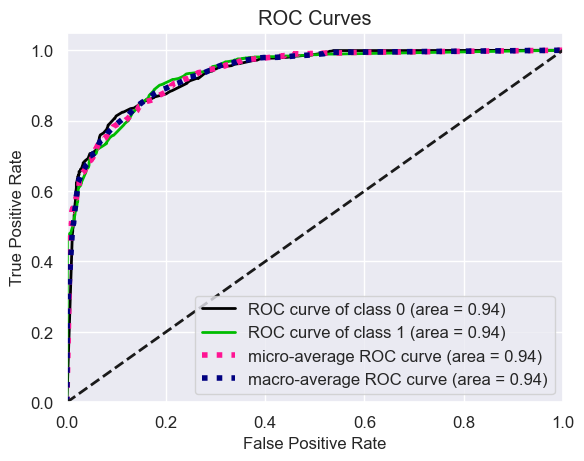

In [579]:
skplt.metrics.plot_roc(y10_test, y_prob1044)

### SVM

In [580]:
from sklearn.svm import SVC

m105 = SVC(kernel='linear', probability=True)
m105.fit(X10_train, y10_train)

m105.score(X10_test, y10_test) * 100

59.60837887067395

In [581]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

kernel1055 = ['poly', 'rbf', 'sigmoid']
C1055 = [50, 10, 1.0, 0.1, 0.01]
gamma1055 = ['scale']

p1055 = dict(kernel=kernel1055, C=C1055, gamma=gamma1055)
cv1055 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
g1055 = GridSearchCV(estimator=SVC(), param_grid=p1055, n_jobs=-1, cv=cv1055, scoring='accuracy', error_score=0)
g1055.fit(X10_train, y10_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [582]:
g1055.best_score_ * 100

61.21598227642201

In [584]:
y_p1055 = g1055.predict(X10_test)

In [585]:
print(classification_report(y10_test, y_p1055))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68      1097
           1       0.69      0.39      0.50      1099

    accuracy                           0.61      2196
   macro avg       0.63      0.61      0.59      2196
weighted avg       0.63      0.61      0.59      2196



In [586]:
confusion_matrix(y10_test, y_p1055)

array([[906, 191],
       [671, 428]], dtype=int64)

In [587]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [590]:
y_prob1055 = m105.predict_proba(X10_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

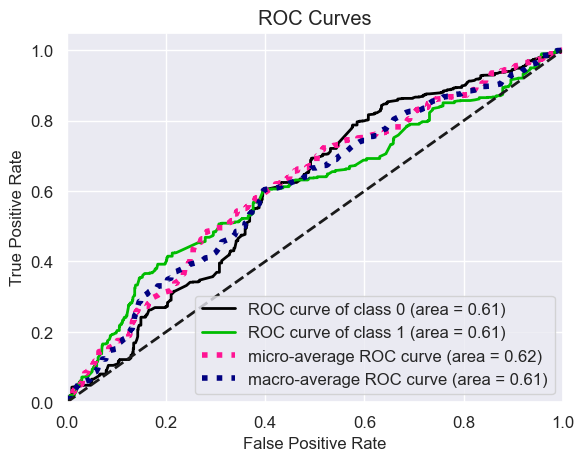

In [591]:
skplt.metrics.plot_roc(y10_test, y_prob1055)

### Naive Bayes

In [592]:
from sklearn.naive_bayes import GaussianNB

m106 = GaussianNB()
m106.fit(X10_train, y10_train)

m106.score(X10_test, y10_test) * 100

56.87613843351548

In [593]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method1066 = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=42)
params_NB1066 = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

g1066 = GridSearchCV(estimator=GaussianNB(), param_grid=params_NB1066, cv=cv_method1066, verbose=3, scoring='accuracy', n_jobs=-1)
# Data_transformed = PowerTransformer().fit_transform(X12_train)
g1066.fit(X10_train, y10_train)

Fitting 15 folds for each of 14 candidates, totalling 210 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='accuracy', verbose=3)

In [594]:
g1066.best_score_ * 100

58.0270414243681

In [595]:
y_p1066 = g1066.predict(X10_test)

In [596]:
print(classification_report(y10_test, y_p1066))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60      1097
           1       0.58      0.50      0.54      1099

    accuracy                           0.57      2196
   macro avg       0.57      0.57      0.57      2196
weighted avg       0.57      0.57      0.57      2196



In [597]:
confusion_matrix(y10_test, y_p1066)

array([[704, 393],
       [554, 545]], dtype=int64)

In [598]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt

In [599]:
y_prob1066 = g1066.predict_proba(X10_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

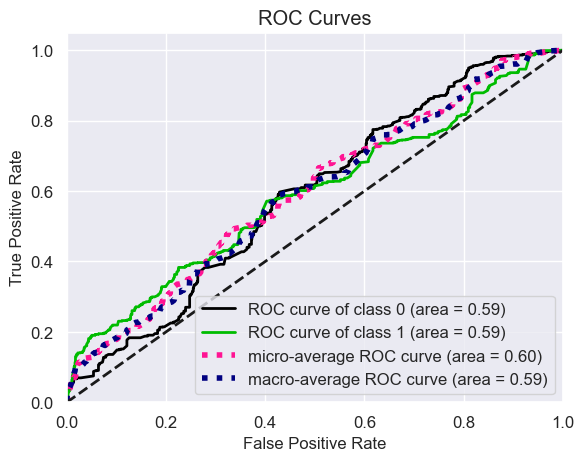

In [600]:
skplt.metrics.plot_roc(y10_test, y_prob1066)

In [601]:
oversampling_SMOTETomek10 = {
    "KNN": m101.score(X10_test, y10_test) * 100, 
    "Logistic Regression": m102.score(X10_test, y10_test) * 100,
    "Decision Tree": m103.score(X10_test, y10_test) * 100,
    "Random Forest": m104.score(X10_test, y10_test) * 100,
    "SVM": m105.score(X10_test, y10_test) * 100,
    "Naive Bayes": m106.score(X10_test, y10_test) * 100
}

oversampling_SMOTETomek10

{'KNN': 82.96903460837886,
 'Logistic Regression': 57.786885245901644,
 'Decision Tree': 85.06375227686704,
 'Random Forest': 84.65391621129325,
 'SVM': 59.60837887067395,
 'Naive Bayes': 56.87613843351548}

In [602]:
oversampling_SMOTETomek_with_HyperParameterTuning10 = {
    "KNN": g1011.best_score_ * 100, 
    "Logistic Regression": g1022.best_score_ * 100,
    "Decision Tree": g1033.best_score_ * 100,
    "Random Forest": g1044.best_score_ * 100,
    "SVM": g1055.best_score_ * 100,
    "Naive Bayes": g1066.best_score_ * 100
}

oversampling_SMOTETomek_with_HyperParameterTuning10

{'KNN': 83.70294865112933,
 'Logistic Regression': 59.45456334472573,
 'Decision Tree': 85.16255171554948,
 'Random Forest': 85.14005285709672,
 'SVM': 61.21598227642201,
 'Naive Bayes': 58.0270414243681}

In [603]:
res10 = pd.DataFrame([oversampling_SMOTETomek10, oversampling_SMOTETomek_with_HyperParameterTuning10], index=["oversampling_SMOTETomek10", "oversampling_SMOTETomek_with_HyperParameterTuning10"])

In [604]:
res10

KNN  \
oversampling_SMOTETomek10                           82.969035   
oversampling_SMOTETomek_with_HyperParameterTuni...  83.702949   

                                                    Logistic Regression  \
oversampling_SMOTETomek10                                     57.786885   
oversampling_SMOTETomek_with_HyperParameterTuni...            59.454563   

                                                    Decision Tree  \
oversampling_SMOTETomek10                               85.063752   
oversampling_SMOTETomek_with_HyperParameterTuni...      85.162552   

                                                    Random Forest        SVM  \
oversampling_SMOTETomek10                               84.653916  59.608379   
oversampling_SMOTETomek_with_HyperParameterTuni...      85.140053  61.215982   

                                                    Naive Bayes  
oversampling_SMOTETomek10                             56.876138  
oversampling_SMOTETomek_with_HyperParameterTuni...    58.027041

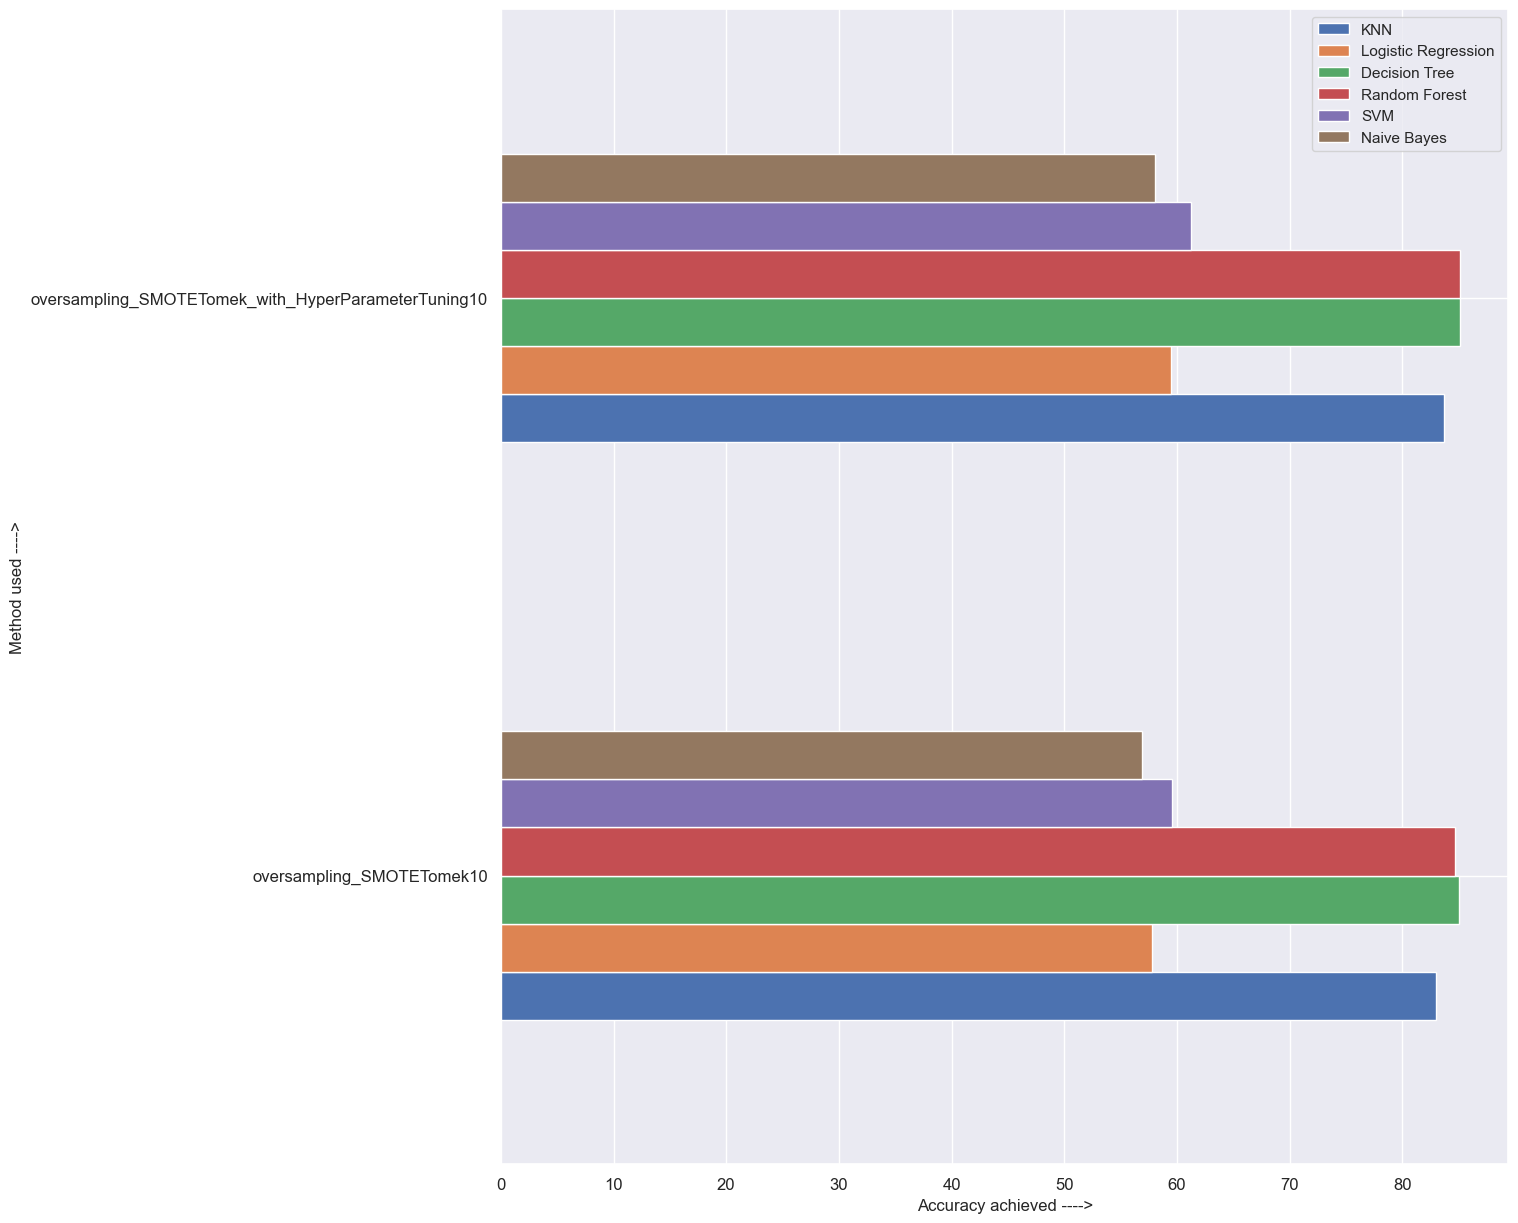

In [605]:
res10.plot(kind='barh', figsize=(13,15), legend=True, fontsize=12)
plt.xlabel("Accuracy achieved ---->")
plt.ylabel("Method used ---->")
plt.yticks(rotation=0)
plt.show()

In [606]:
import statsmodels.api as sm

X10_glm = sm.add_constant(X10_train)
model10 = sm.GLM(y10_train, X10_glm, family = sm.families.Binomial())
results10 = model10.fit()
summary10 = results10.summary()
summary10

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               poutcome   No. Observations:                 6586
Model:                            GLM   Df Residuals:                     6581
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4392.6
Date:                Mon, 06 Nov 2023   Deviance:                       8785.3
Time:                        15:10:44   Pearson chi2:                 6.60e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05102
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5779      0.153      3.774      0.000       0.278       0.878
age                 0.0159      0.002      6.487      0.000       0.011       0.021
education          -0.2517      0.034     -7.362      0.000      -0.319      -0.185
marital_married    -0.9599      0.070    -13.642      0.000      -1.098      -0.822
marital_single     -0.8138      0.085     -9.551      0.000      -0.981      -0.647
===================================================================================
"""

In [607]:
df_glm10 = pd.DataFrame(X10_train, columns=df10.drop('poutcome', axis=1).columns)
df_glm10

age  education  marital_married  marital_single
3352  47.000000          3                0               0
4122  47.000000          1                0               0
893   49.000000          2                0               1
6701  47.000000          2                1               0
1850  54.000000          3                0               0
...         ...        ...              ...             ...
5734  73.000000          2                1               0
5191  40.975316          2                0               1
5390  47.693028          2                1               0
860   58.000000          1                1               0
7270  38.000000          2                0               1

[6586 rows x 4 columns]

In [608]:
p_values10 = results10.pvalues
p_values10

const              1.605169e-04
age                8.739705e-11
education          1.812242e-13
marital_married    2.247961e-42
marital_single     1.287499e-21
dtype: float64

In [609]:
p_values_df10 = pd.DataFrame({
    'Feature': df_glm10.columns, 
    'P-Value': p_values10[1:]})

print("Logistic Regression Summary:")
print(summary10)
print("\nP-Values for Coefficients:")
print(p_values_df10)
print("\nSignificant independent variables(P-Value < 0.05):")
print(p_values_df10[p_values_df10['P-Value'] < 0.05])

Logistic Regression Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:               poutcome   No. Observations:                 6586
Model:                            GLM   Df Residuals:                     6581
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4392.6
Date:                Mon, 06 Nov 2023   Deviance:                       8785.3
Time:                        15:10:44   Pearson chi2:                 6.60e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05102
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const        